# 신경망 기초 

In [1]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

0번째 영화 리뷰 디코딩 

In [2]:
word_index = imdb.get_word_index() # 사전 
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = [reversed_word_index.get(i-3, '?') for i in train_data[0]]

In [51]:
for i in decoded_review : 
    print(i, end=' ')
print()

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# 데이터 전처리 - 원핫인코딩 벡터 꼴로 모두 변환 

In [3]:
# 원핫인코딩 행렬 구한다. 
import numpy as np

def vectorize_sequence(sequence, dimension=10000) : 
    zero_matrix = np.zeros((len(sequence), dimension)) # (25000, 10000) 영행렬 
    for i, sq in enumerate(sequence) : 
        zero_matrix[i, sq] = 1. # 영벡터에서 sq 위치 전부 1로 바꾼다. -> 원핫 인코딩 벡터 25000개로 구성된 행렬이 된다. 
    return zero_matrix 
x_train = vectorize_sequence(train_data); x_test = vectorize_sequence(test_data) # 변환된 원핫 인코딩 '행렬' 2개. 

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32') # 정답값도 전부 ndarray 꼴로 변환한다. 

# 신경망 기본모델 만들기 

In [5]:
# GPU 확인
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
# 모델 정의 
from keras import models 
from keras import layers

model = models.Sequential()
# 1층 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# 2층 
model.add(layers.Dense(16, activation='relu'))
# 3층 (출력 층)
model.add(layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-01-23 09:41:23.726759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-23 09:41:23.730488: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [83]:
# 모델 컴파일 
model.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [84]:
# 모델 성능 교차검증 위한 테스트셋 만들기 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [85]:
# 모델 훈련 
hs = model.fit(
    partial_x_train, 
    partial_y_train,
    epochs = 20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20


2022-01-22 22:24:36.008784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 44ms/step - loss: 0.5127 - accuracy: 0.7905 - val_loss: 0.3867 - val_accuracy: 0.8671
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3582 - accuracy: 0.8965

2022-01-22 22:24:38.150568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 19ms/step - loss: 0.3098 - accuracy: 0.9008 - val_loss: 0.3212 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2278 - accuracy: 0.9257 - val_loss: 0.2824 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1805 - accuracy: 0.9410 - val_loss: 0.2768 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1437 - accuracy: 0.9539 - val_loss: 0.3269 - val_accuracy: 0.8722
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1200 - accuracy: 0.9625 - val_loss: 0.2953 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1012 - accuracy: 0.9687 - val_loss: 0.3497 - val_accuracy: 0.8698
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0830 - accuracy: 0.9771 - val_loss: 0.3713 - val_accuracy: 0.8716
Epoch 9/20
30/30 [======

In [91]:
history_dict = hs.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [100]:
import pandas as pd
pd.DataFrame(history_dict)

,loss,accuracy,val_loss,val_accuracy
0,0.512651,0.790533,0.386735,0.8671
1,0.309752,0.900800,0.321232,0.8711
2,0.227765,0.925667,0.282430,0.8878
3,0.180516,0.941000,0.276759,0.8887
4,0.143659,0.953933,0.326908,0.8722
5,0.119967,0.962533,0.295318,0.8842
6,0.101209,0.968667,0.349745,0.8698
7,0.082999,0.977133,0.371304,0.8716
8,0.070317,0.980933,0.349396,0.8807
9,0.057473,0.986067,0.378676,0.8781


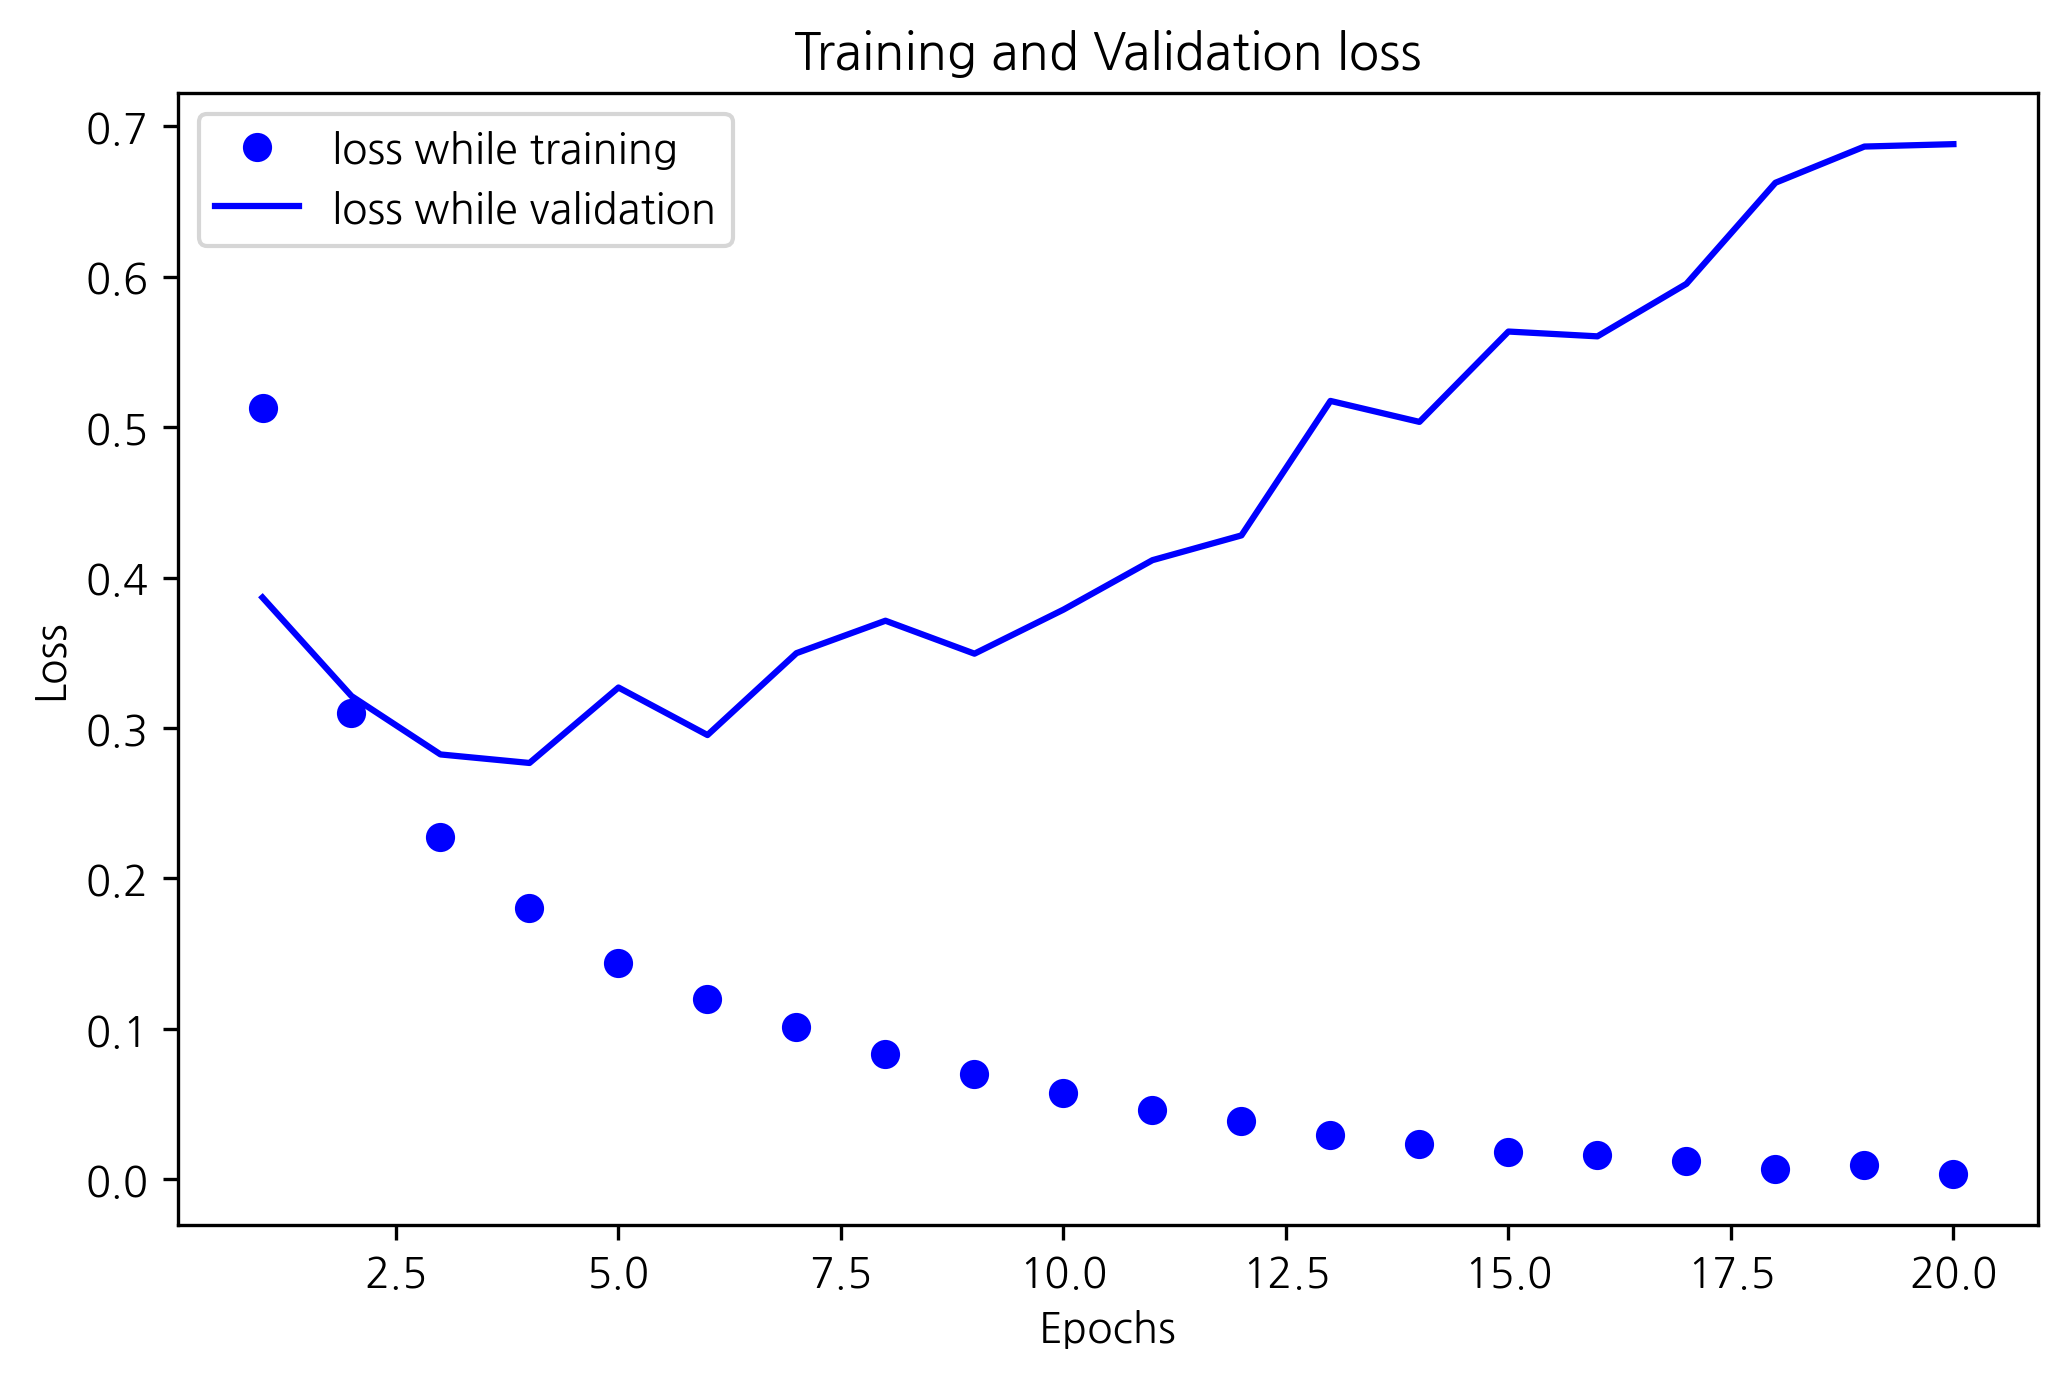

In [105]:
# 훈련, 검증 손실 그래프로 그리기 
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1) # 1~20

plt.plot(epochs, loss, 'bo', label='loss while training')
plt.plot(epochs, val_loss, 'b', label='loss while validation')
plt.title('Training and Validation loss')
plt.xlabel(f'Epochs')
plt.ylabel(f'Loss')
plt.legend()
plt.show()

# 결과 해석 및 추측 
## 과적합이 있는 것 같다. 훈련용 셋에서 예측손실은 지속 감소. 20번쯤 되면 극단적으로 줄어든다. 
## 하지만 테스트 셋에서는 손실이 점차 증가한다. 
## 훈련용 셋에 오버피팅 되어서 새 데이터를 제대로 예측하지 못하는 것 같다. 

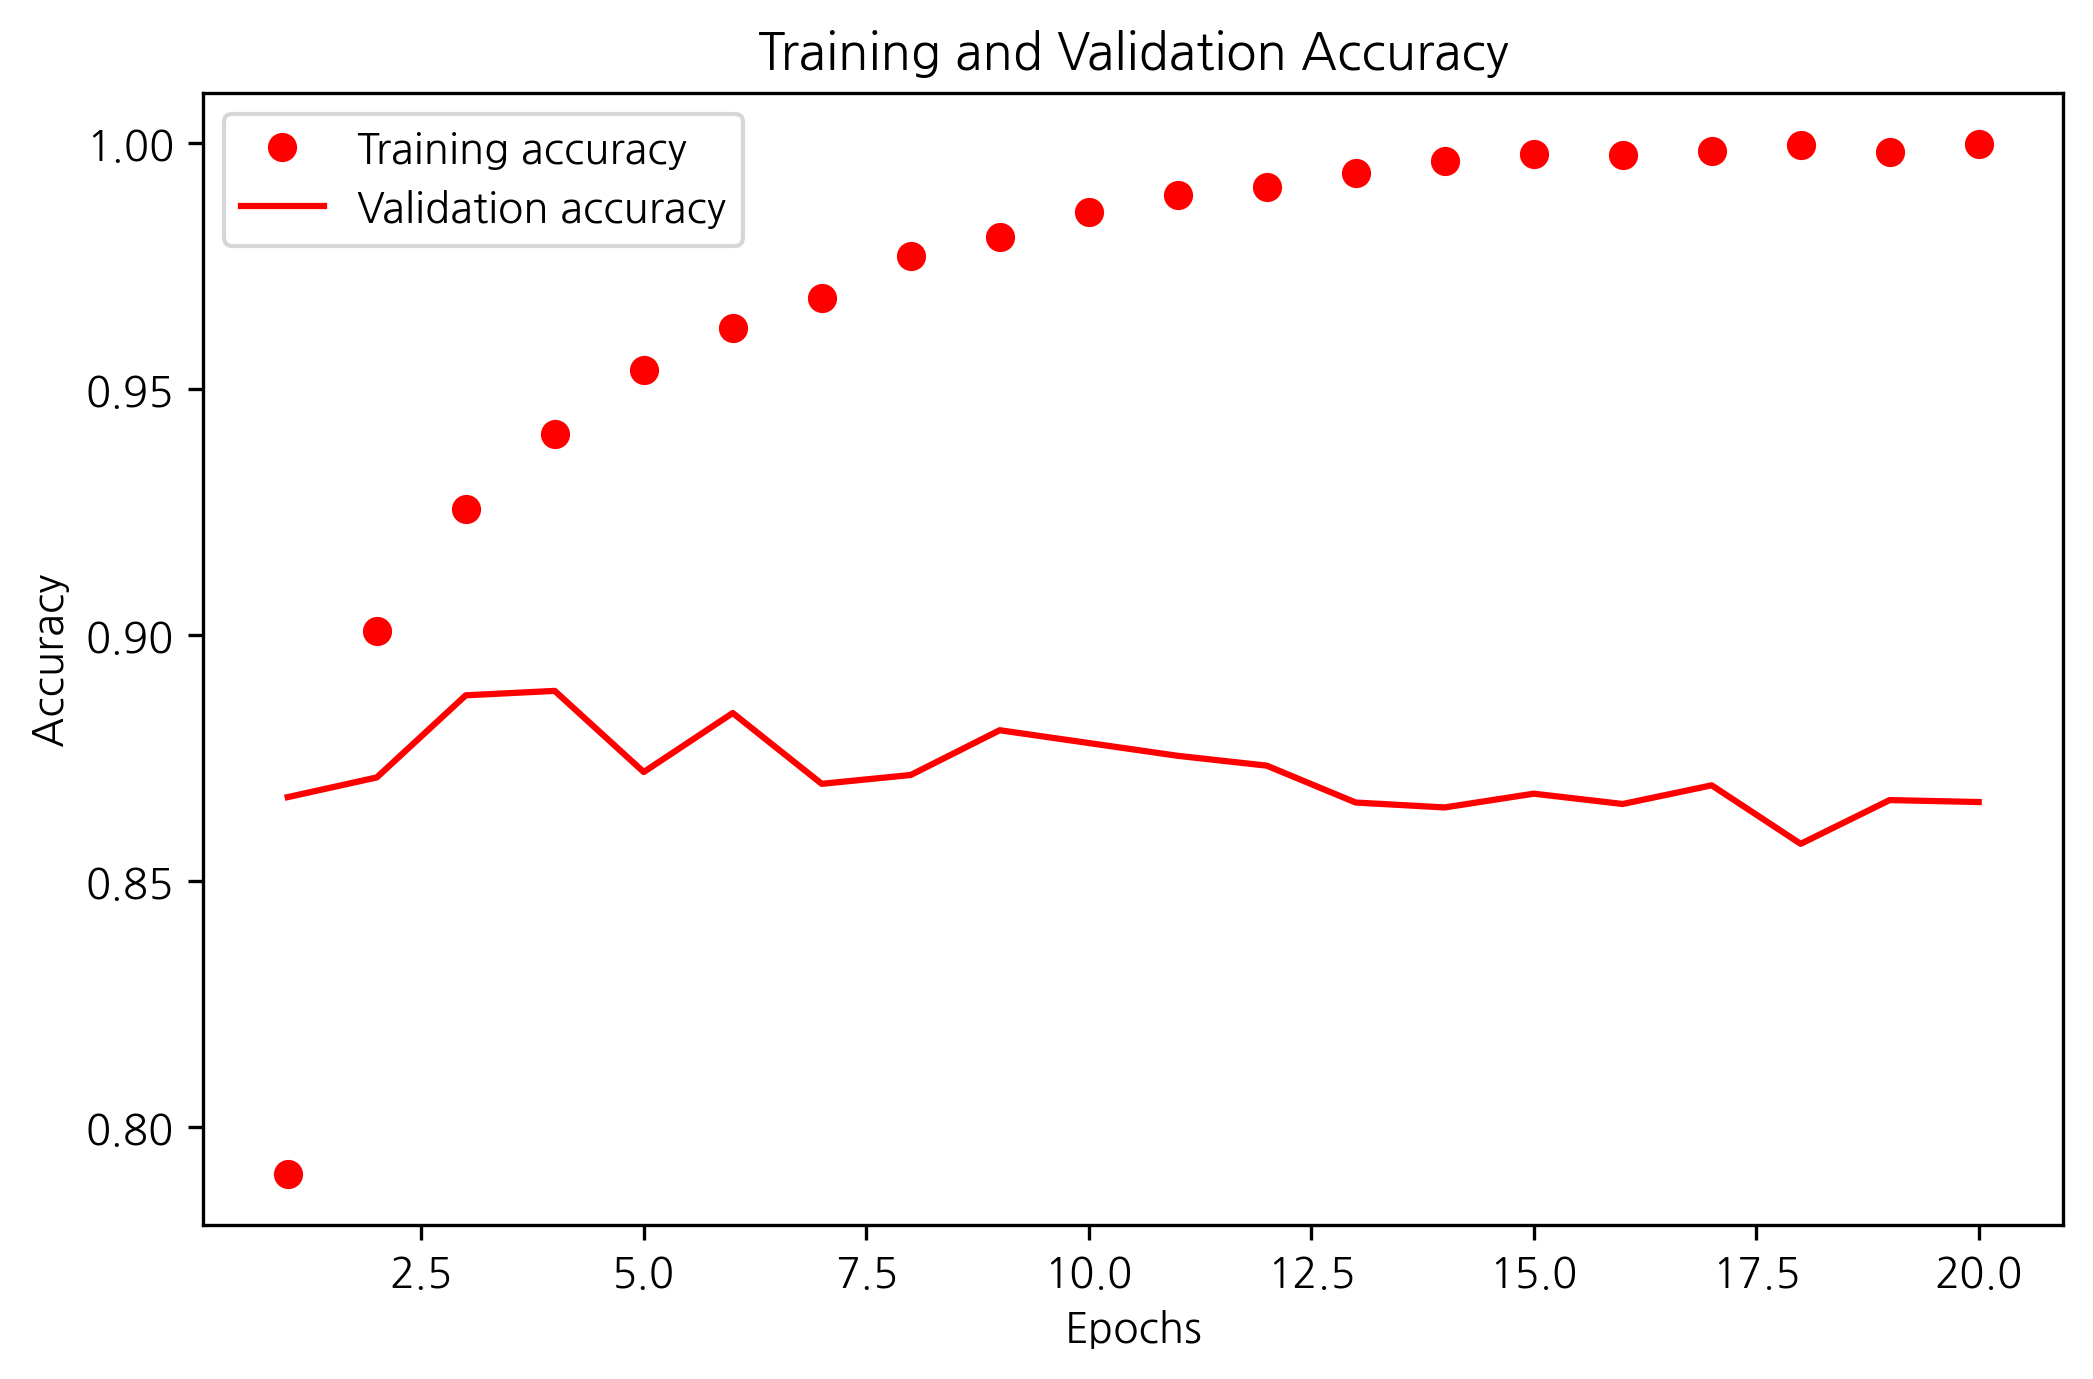

In [111]:
# 훈련, 검증 정확도 그래프로 그리기 
plt.clf() # 그래프 초기화 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title(f'Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [113]:
# 20번 반복하면서 과적합 발생했다. 
# 4번만 반복해서 과적합을 완화해보자. 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일 
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 모델 훈련 시키기 - epoch:4번만
hd = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/4
 1/49 [..............................] - ETA: 15s - loss: 0.6984 - accuracy: 0.5020

2022-01-22 23:17:51.502860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


46/49 [===========================>..] - ETA: 0s - loss: 0.4579 - accuracy: 0.8226

2022-01-22 23:17:53.415123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 2s 43ms/step - loss: 0.4501 - accuracy: 0.8264 - val_loss: 0.3344 - val_accuracy: 0.8814
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2572 - accuracy: 0.9099 - val_loss: 0.3170 - val_accuracy: 0.8700
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1996 - accuracy: 0.9299 - val_loss: 0.2792 - val_accuracy: 0.8891
Epoch 4/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1670 - accuracy: 0.9404 - val_loss: 0.3064 - val_accuracy: 0.8777


In [115]:
pd.DataFrame(hd.history)

,loss,accuracy,val_loss,val_accuracy
0,0.450143,0.82644,0.334393,0.88136
1,0.257205,0.90992,0.317039,0.87000
2,0.199559,0.92988,0.279207,0.88908
3,0.167009,0.94044,0.306374,0.87772


In [116]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일 
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
 1/49 [..............................] - ETA: 15s - loss: 0.7006 - accuracy: 0.4824

2022-01-22 23:20:17.195949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 12ms/step - loss: 0.4453 - accuracy: 0.8300
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2561 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1966 - accuracy: 0.9293
Epoch 4/4
 17/782 [..............................] - ETA: 5s - loss: 0.2665 - accuracy: 0.8897

2022-01-22 23:20:20.625984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 5s 7ms/step - loss: 0.2950 - accuracy: 0.8840


In [117]:
result

[0.2950170338153839, 0.8840000629425049]

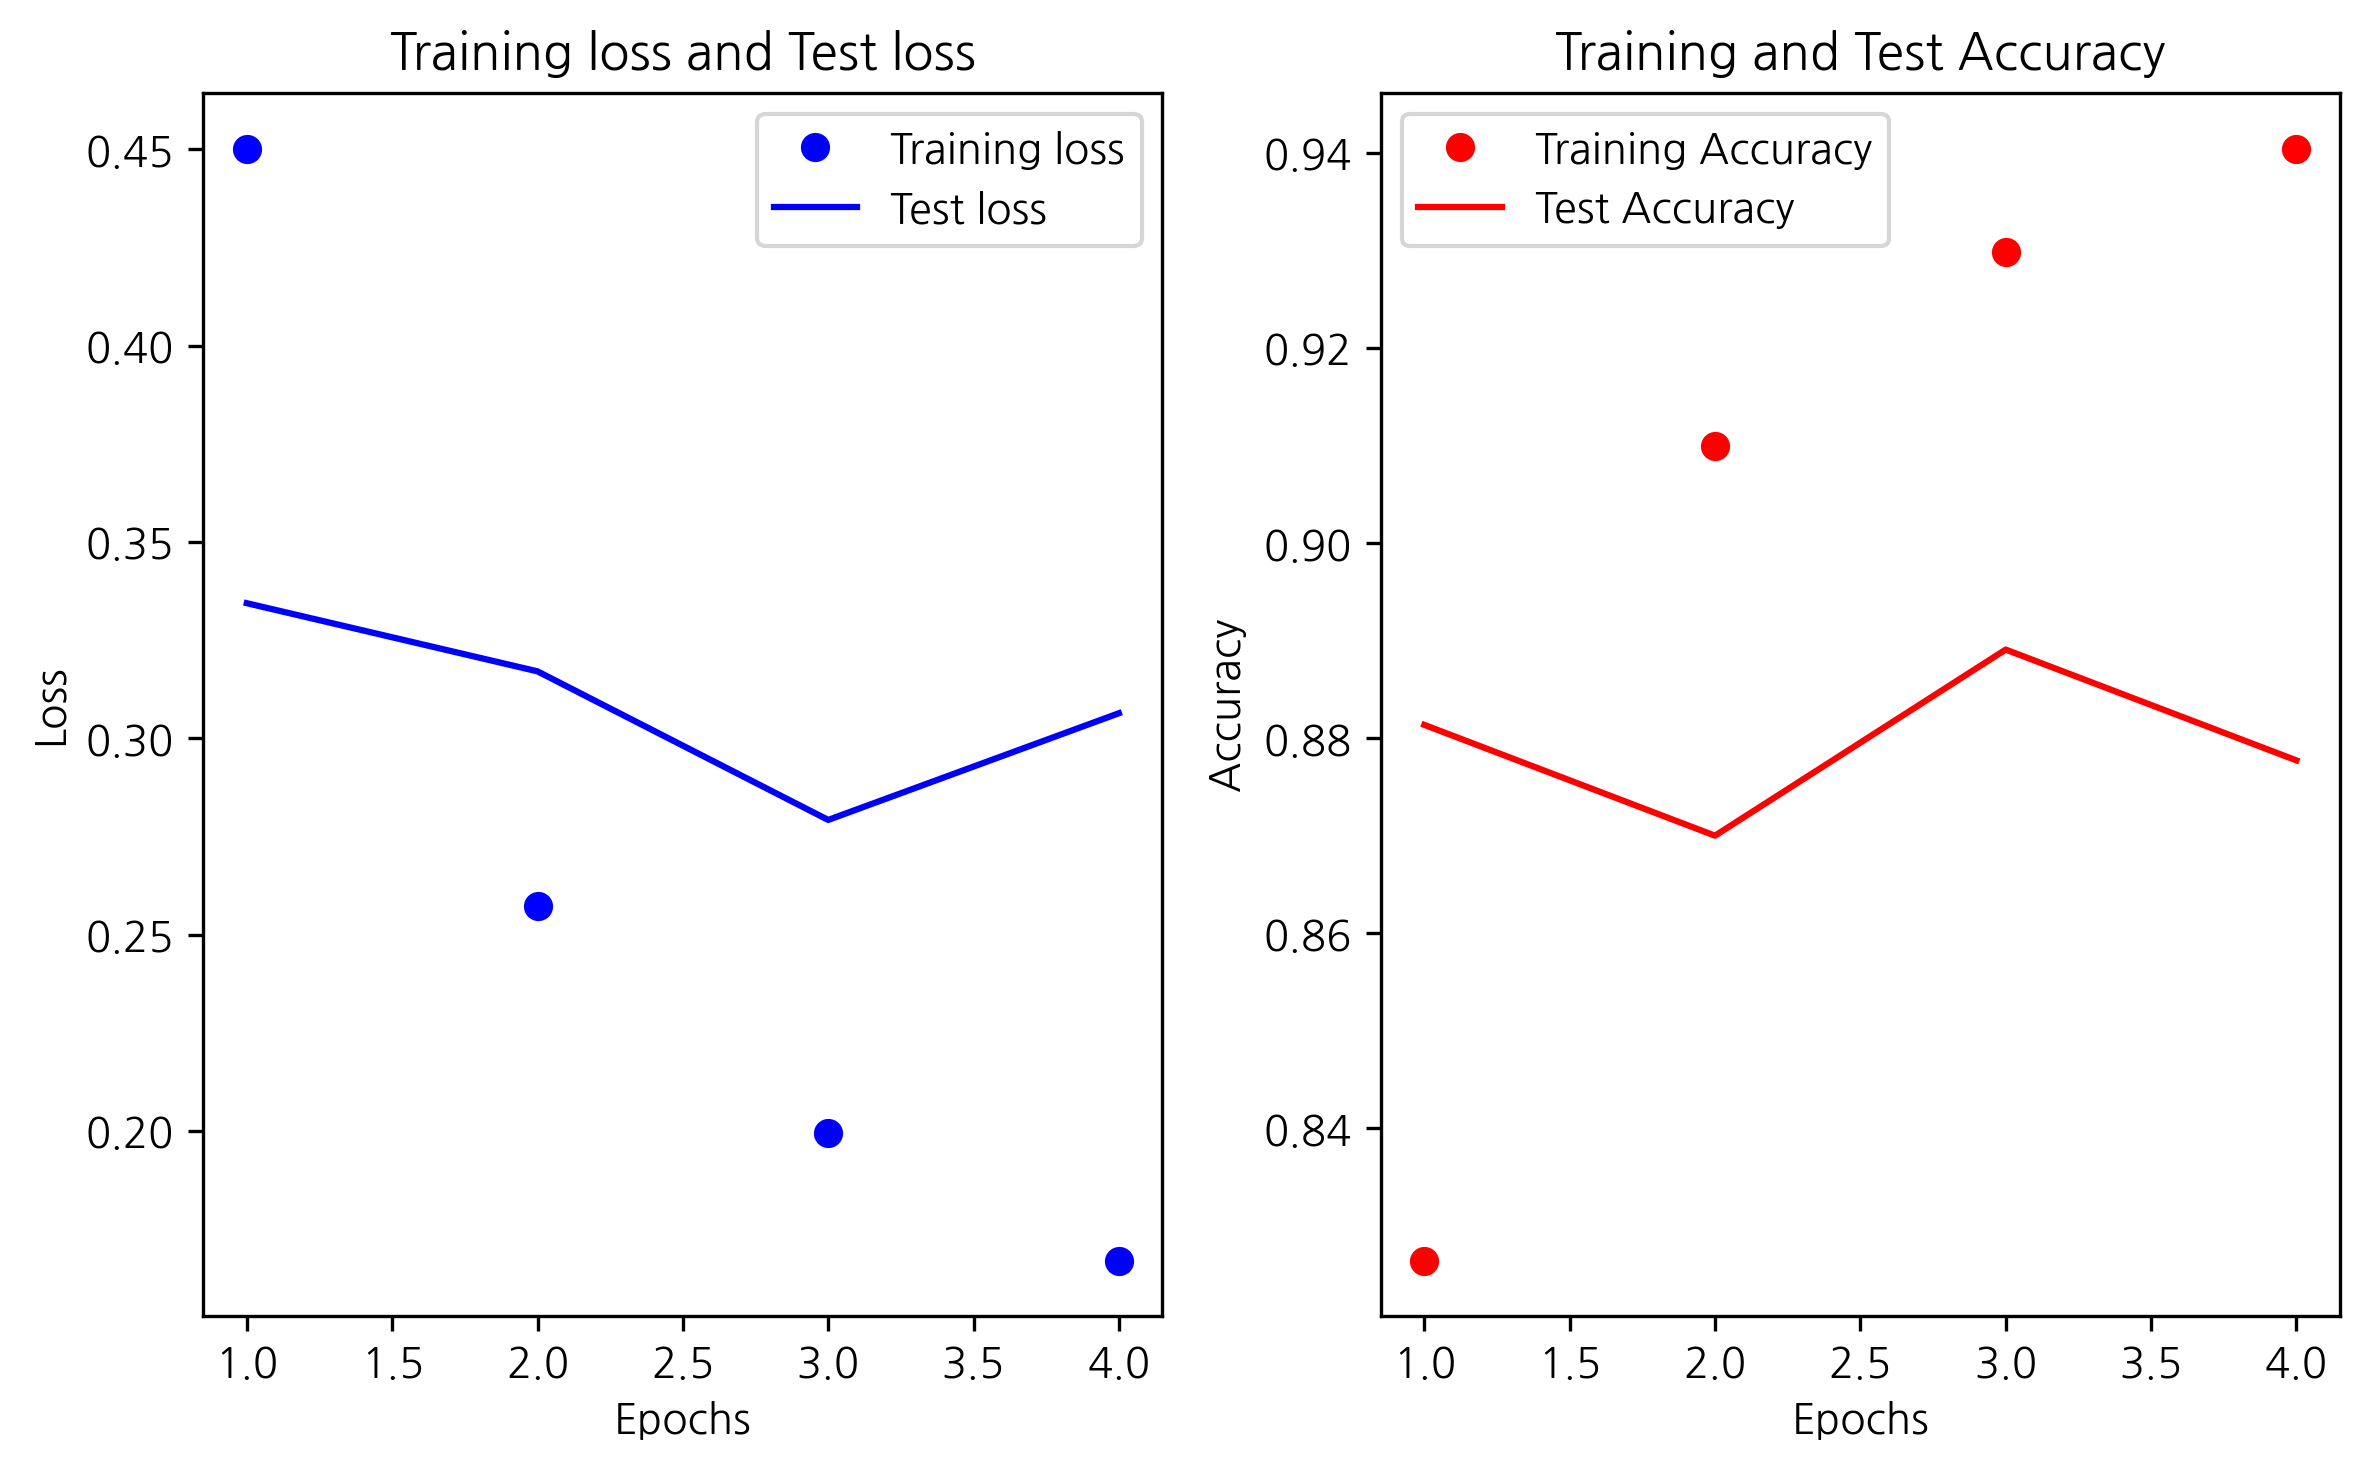

In [129]:
train_loss = hd.history['loss']
test_loss = hd.history['val_loss']

train_acc = hd.history['accuracy']
test_acc = hd.history['val_accuracy']

epochs = range(1, len(hd.history['accuracy'])+1)

plt.subplot(1,2,1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Training loss and Test loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_acc, 'ro', label='Training Accuracy')
plt.plot(epochs, test_acc, 'r', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Training and Test Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [133]:
# 훈련된 모델이(가중치가) 새 데이터를 어떻게 분류하는 지 관찰하자. 
r = model.predict(x_test)

In [136]:
# 예측 결과 
r

array([[0.16957025],
       [0.9999465 ],
       [0.96045804],
       ...,
       [0.14915319],
       [0.1086537 ],
       [0.69666654]], dtype=float32)

# 추가실험 - 2022/01/23

In [7]:
# 렐루 층에 1개 은닉 유닛만 사용했을 때 정확도 
model = models.Sequential()
model.add(layers.Dense(1, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# 모델 컴파일 
model.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [11]:
model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=4, validation_data=(x_val, y_val))

2022-01-23 09:48:25.300850: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/4


2022-01-23 09:48:25.586215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.6077

2022-01-23 09:48:27.094645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 41ms/step - loss: 0.6723 - accuracy: 0.6077 - val_loss: 0.6504 - val_accuracy: 0.7360
Epoch 2/4
30/30 [==============================] - 1s 19ms/step - loss: 0.6308 - accuracy: 0.7049 - val_loss: 0.6175 - val_accuracy: 0.6877
Epoch 3/4
30/30 [==============================] - 0s 17ms/step - loss: 0.5971 - accuracy: 0.7483 - val_loss: 0.5897 - val_accuracy: 0.7160
Epoch 4/4
30/30 [==============================] - 0s 14ms/step - loss: 0.5668 - accuracy: 0.7810 - val_loss: 0.5639 - val_accuracy: 0.7825


## 같은 조건에서 렐루 층 은닉유닛 1개만 쓰면. 훈련 및 검증 정확도가 은닉유닛 2개 썼을 때 보다 낮아졌다. 

In [18]:
# 은닉유닛 3개인 경우 
model2 = models.Sequential() 
model2.add(layers.Dense(3, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(3, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model2.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
hs = model2.fit(partial_x_train, partial_y_train, batch_size=512, epochs=4, validation_data=(x_val, y_val))
hs.history

Epoch 1/4
 1/30 [>.............................] - ETA: 8s - loss: 0.6934 - accuracy: 0.5234

2022-01-23 09:54:49.687133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 36ms/step - loss: 0.6010 - accuracy: 0.7634 - val_loss: 0.5363 - val_accuracy: 0.8395
Epoch 2/4
 1/30 [>.............................] - ETA: 0s - loss: 0.5145 - accuracy: 0.8906

2022-01-23 09:54:50.748594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 16ms/step - loss: 0.4663 - accuracy: 0.8731 - val_loss: 0.4383 - val_accuracy: 0.8599
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.3764 - accuracy: 0.8955 - val_loss: 0.3755 - val_accuracy: 0.8738
Epoch 4/4
30/30 [==============================] - 0s 16ms/step - loss: 0.3118 - accuracy: 0.9121 - val_loss: 0.3340 - val_accuracy: 0.8819


{'loss': [0.6010458469390869,
  0.46629467606544495,
  0.3764100968837738,
  0.3117629885673523],
 'accuracy': [0.7634000182151794,
  0.8731333613395691,
  0.8955333232879639,
  0.9121333360671997],
 'val_loss': [0.5363383889198303,
  0.4383290708065033,
  0.37552890181541443,
  0.3340258002281189],
 'val_accuracy': [0.8395000696182251,
  0.8599000573158264,
  0.8738000392913818,
  0.8819000124931335]}

In [22]:
pd.DataFrame(hs.history)

,loss,accuracy,val_loss,val_accuracy
0,0.601046,0.763400,0.536338,0.8395
1,0.466295,0.873133,0.438329,0.8599
2,0.376410,0.895533,0.375529,0.8738
3,0.311763,0.912133,0.334026,0.8819


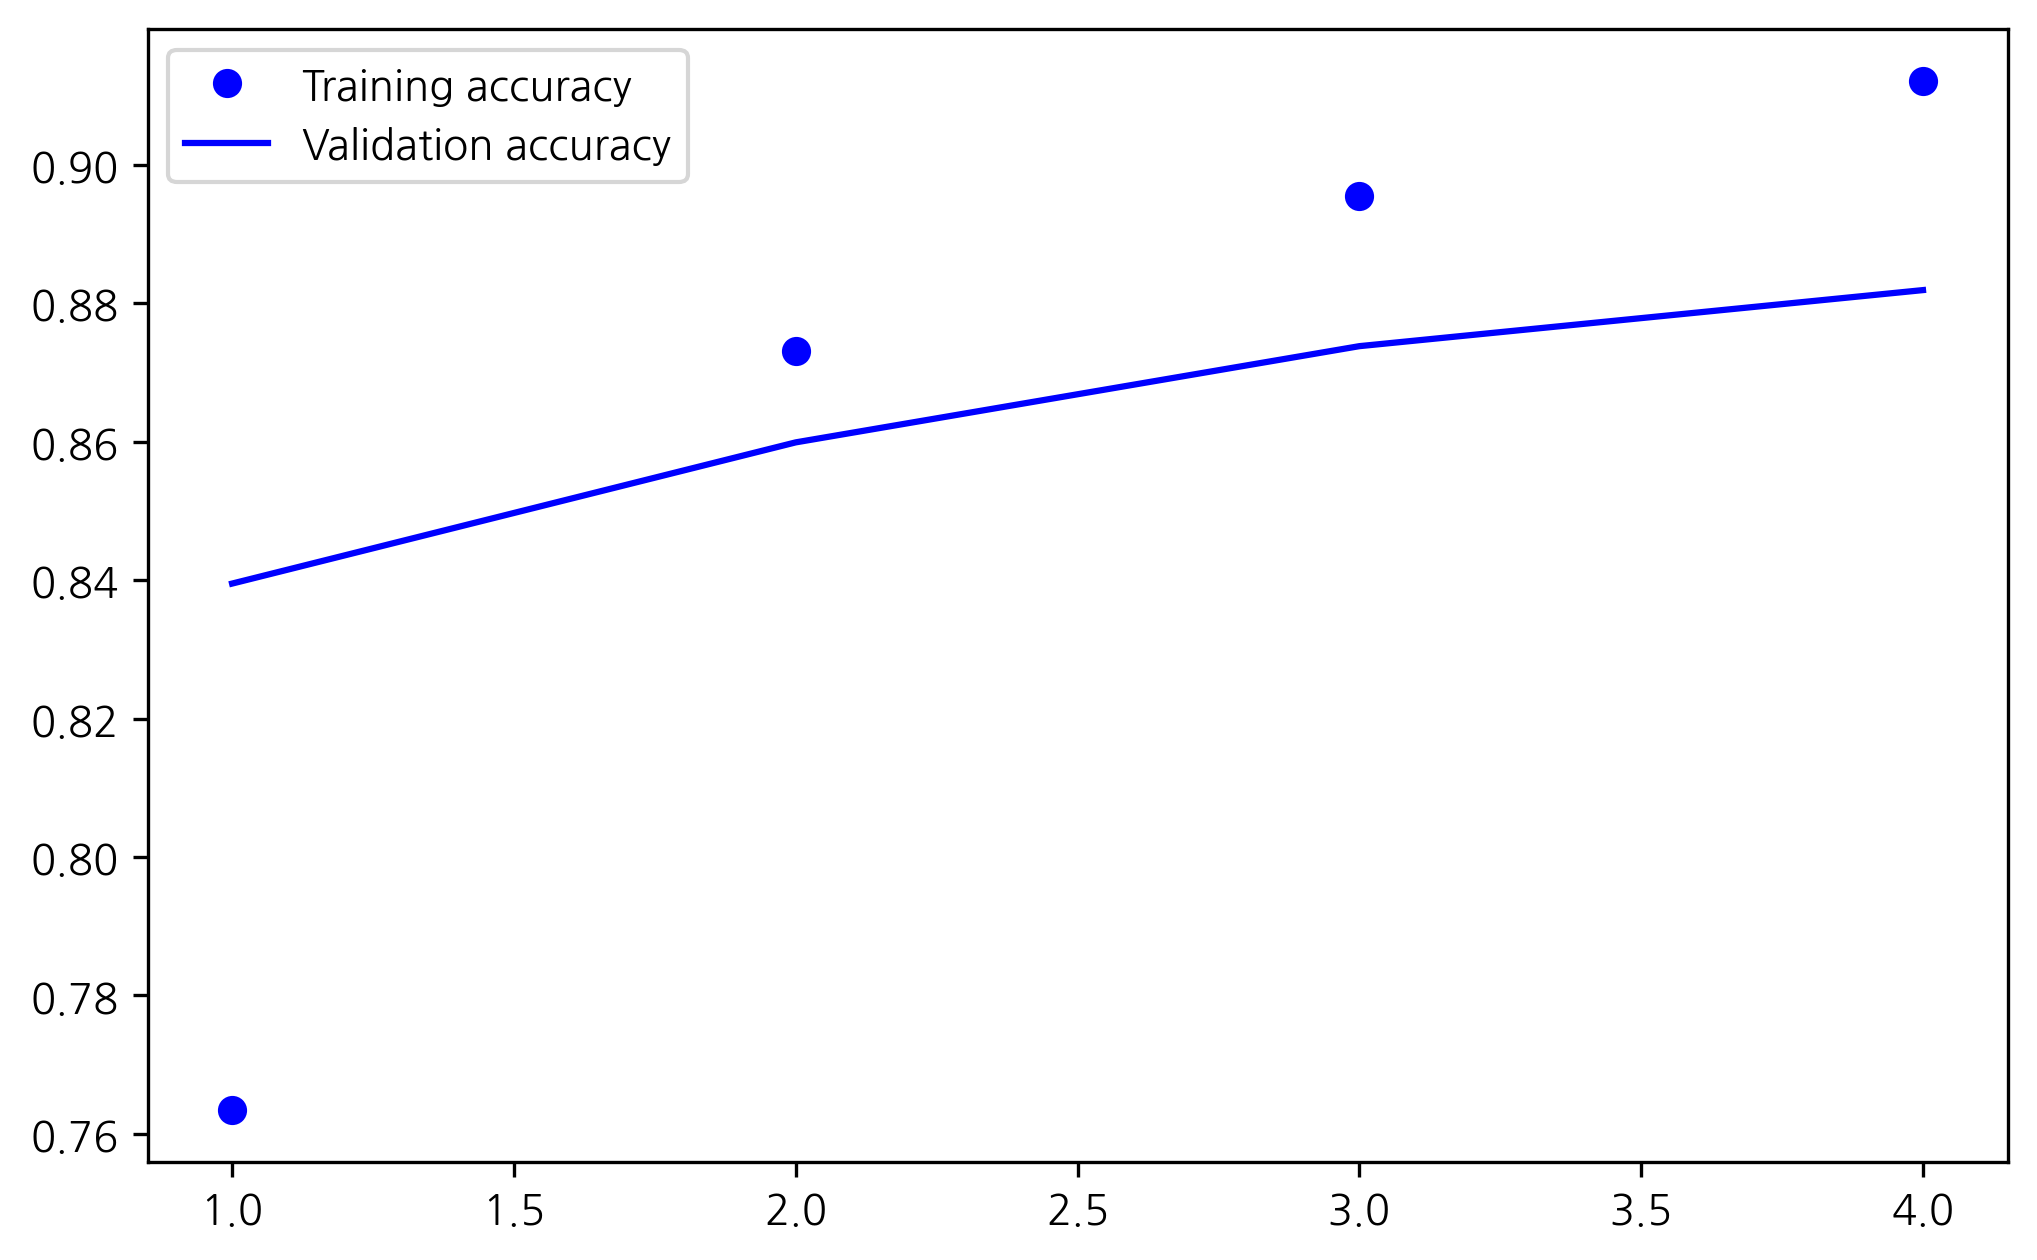

In [26]:
epochs = range(1,5)
plt.plot(epochs, hs.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, hs.history['val_accuracy'], 'b', label='Validation accuracy')
plt.legend()
plt.show()

## 은닉 층을 3개로 늘렸을 때 훈련정확도와 검증 정확도 모두 상승했다.

In [39]:
# 은닉 층을 더 늘렸을 때 
model3 = models.Sequential()
model3.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model3.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [41]:
result = model3.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data= (x_val, y_val))

Epoch 1/20


2022-01-23 10:05:39.876339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4918 - accuracy: 0.7831

2022-01-23 10:05:40.992811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 38ms/step - loss: 0.4918 - accuracy: 0.7831 - val_loss: 0.3508 - val_accuracy: 0.8758
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2710 - accuracy: 0.9065 - val_loss: 0.3166 - val_accuracy: 0.8709
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2033 - accuracy: 0.9265 - val_loss: 0.2743 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1536 - accuracy: 0.9473 - val_loss: 0.2855 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1223 - accuracy: 0.9593 - val_loss: 0.3126 - val_accuracy: 0.8808
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1039 - accuracy: 0.9645 - val_loss: 0.3182 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0795 - accuracy: 0.9758 - val_loss: 0.3477 - val_accuracy: 0.8796
Epoch 8/20
30/30 [======

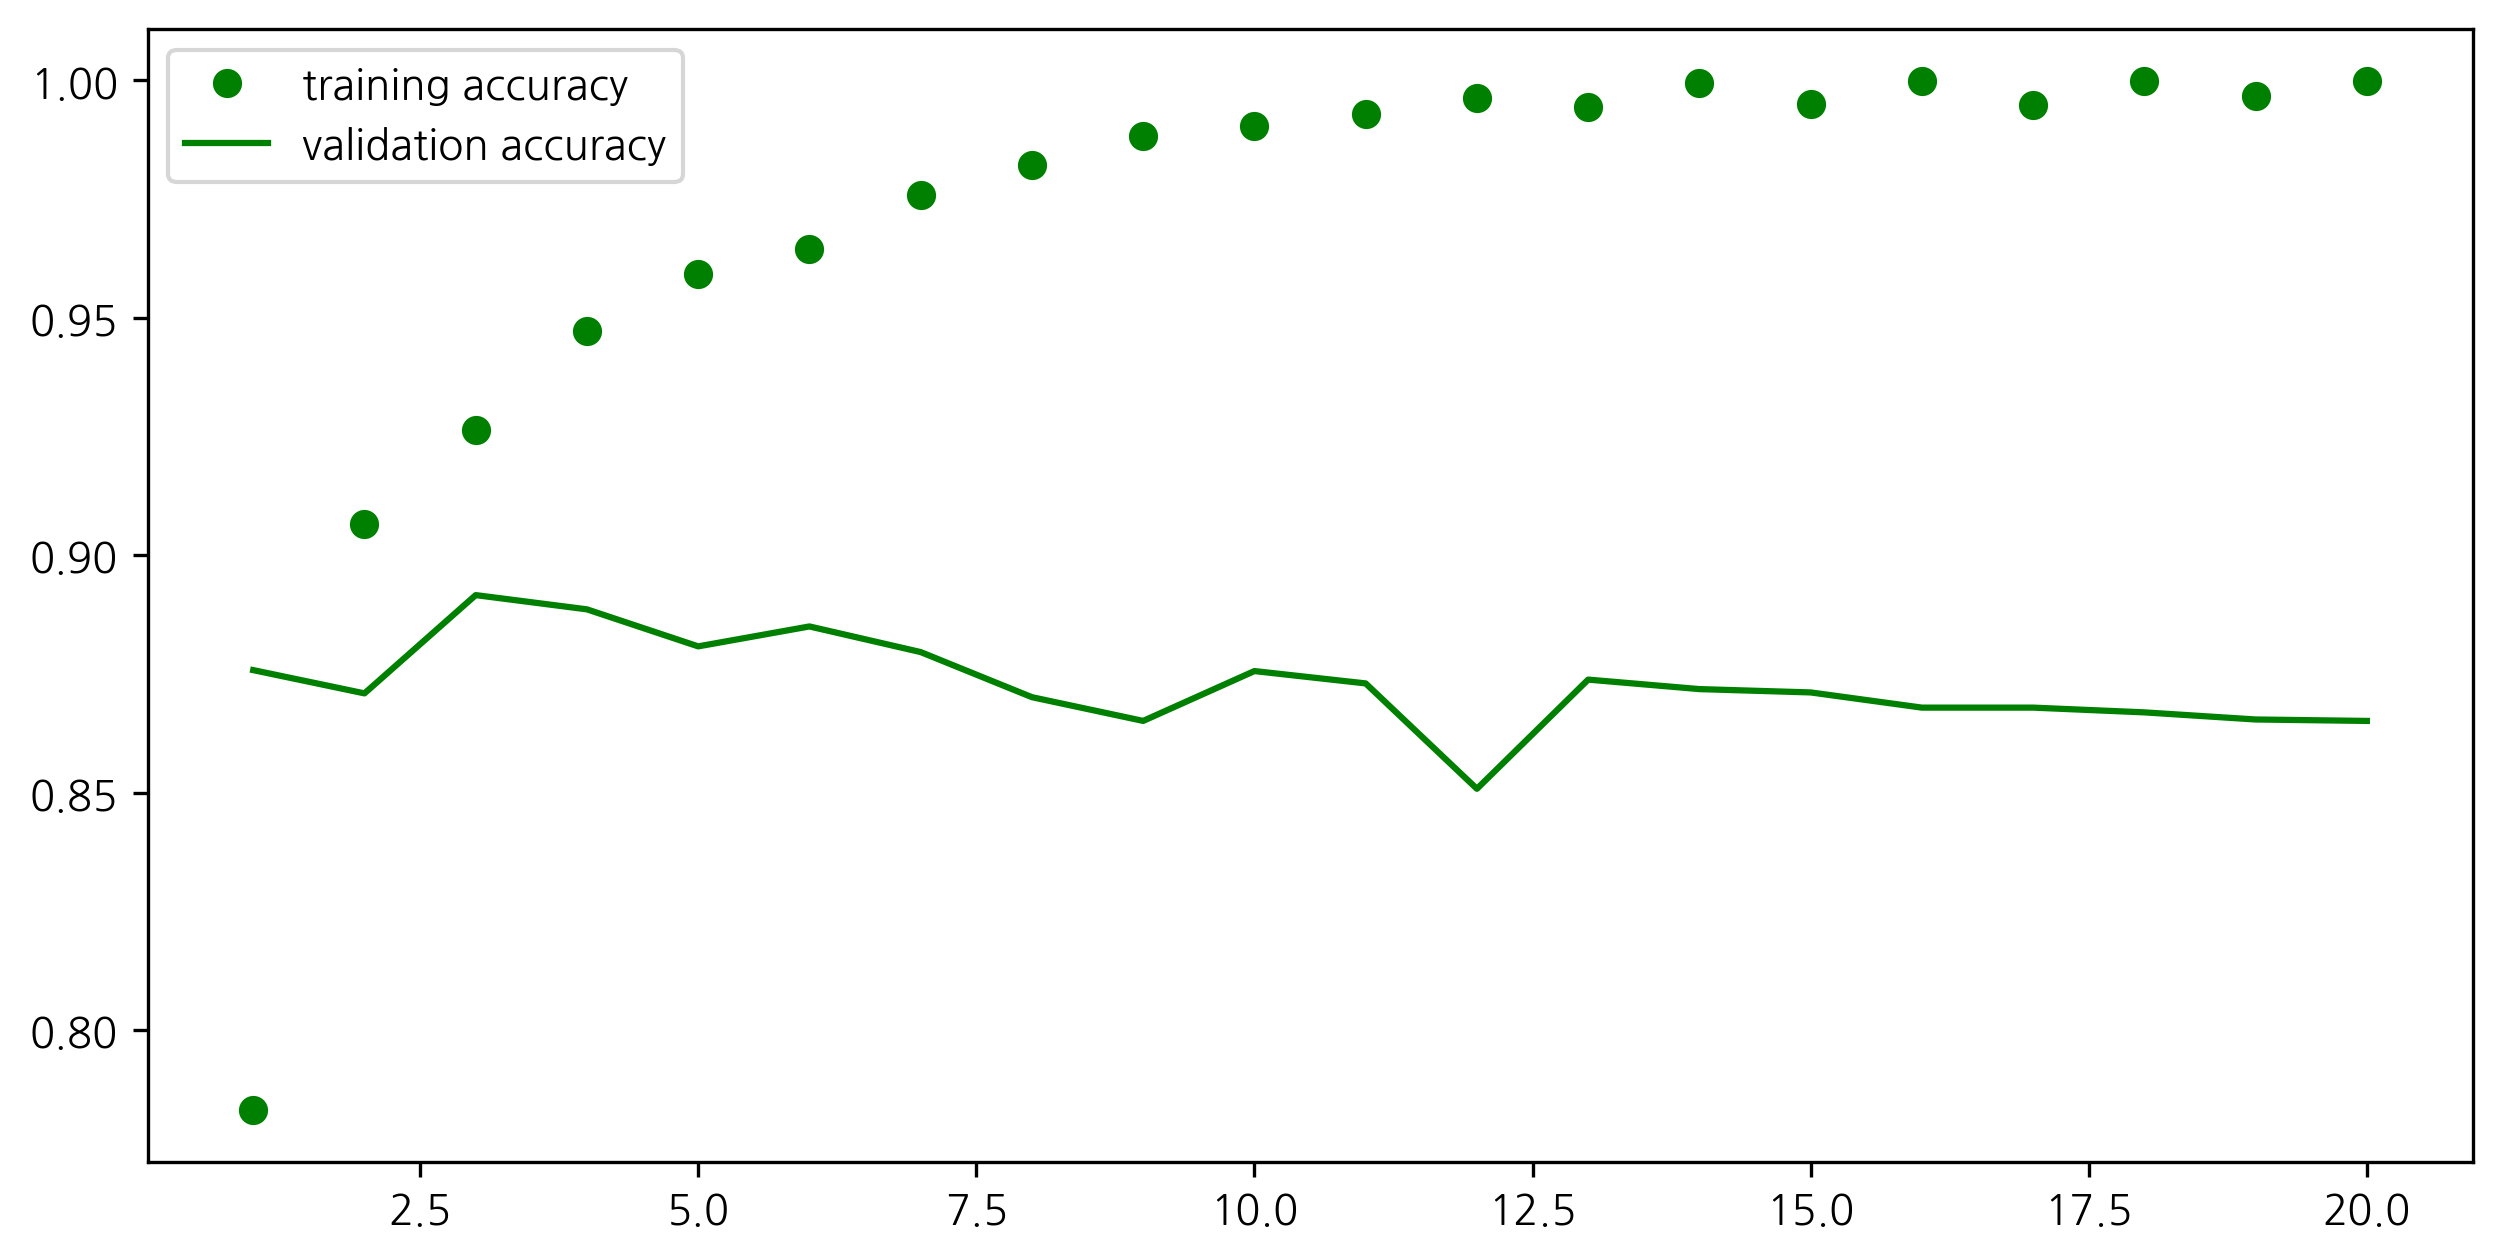

In [47]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 21), result.history['accuracy'], 'go', label='training accuracy')
plt.plot(range(1, 21), result.history['val_accuracy'], 'g', label='validation accuracy')
plt.legend()
plt.show()

## 은닉 유닛을 32개로 늘렸을 때는 과적합이 나타났다. 

In [52]:
# 은닉 유닛 64개이면? 
model4 = models.Sequential() 
model4.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [53]:
model4.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [54]:
result = model4.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20


2022-01-23 10:12:40.292617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


29/30 [============================>.] - ETA: 0s - loss: 0.4925 - accuracy: 0.7647

2022-01-23 10:12:41.697424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 43ms/step - loss: 0.4907 - accuracy: 0.7660 - val_loss: 0.3232 - val_accuracy: 0.8829
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2626 - accuracy: 0.9027 - val_loss: 0.2790 - val_accuracy: 0.8901
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1863 - accuracy: 0.9320 - val_loss: 0.2852 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1439 - accuracy: 0.9483 - val_loss: 0.3883 - val_accuracy: 0.8582
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1065 - accuracy: 0.9635 - val_loss: 0.3193 - val_accuracy: 0.8820
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0844 - accuracy: 0.9726 - val_loss: 0.3503 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0569 - accuracy: 0.9829 - val_loss: 0.4110 - val_accuracy: 0.8740
Epoch 8/20
30/30 [======

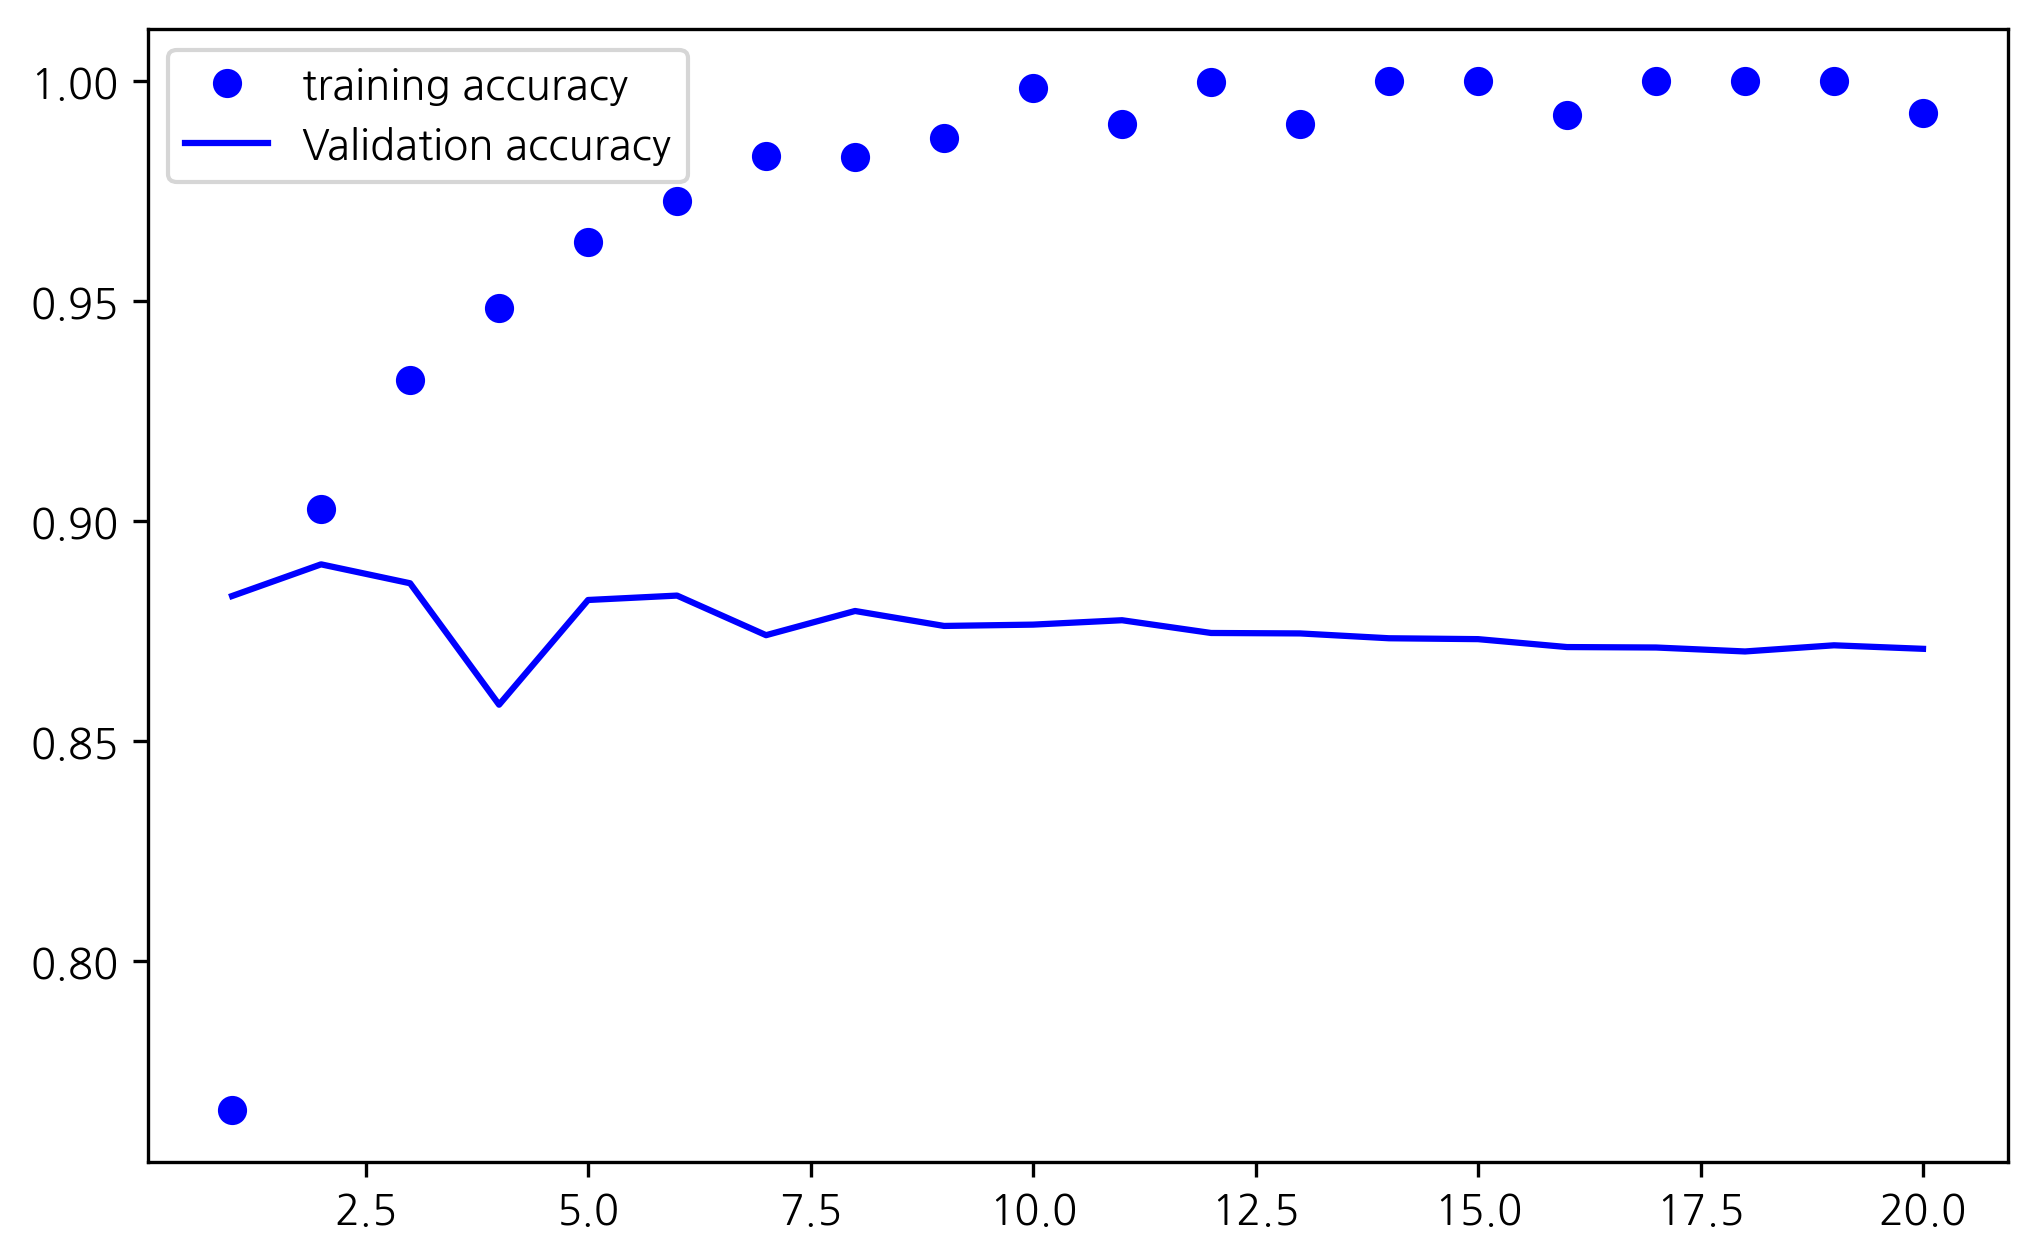

In [55]:
plt.plot(range(1, 21), result.history['accuracy'], 'bo', label='training accuracy')
plt.plot(range(1, 21), result.history['val_accuracy'], 'b', label='Validation accuracy')
plt.legend()
plt.show()

## 은닉 유닛 64개 일 때도 과적합 관찰할 수 있었다. 
## 은닉 유닛을 너무 많이 추가해도 과적합으로 갈 위험 나타났다. 
## 위 실험에 따르면 2~3개 정도가 적당했다. 

In [78]:
# 활성화 함수로 렐루 함수 대신 탄 함수 썼을 때 
model5 = models.Sequential()
model5.add(layers.Dense(2, activation='tanh', input_shape=(10000,)))
model5.add(layers.Dense(2, activation='tanh'))
model5.add(layers.Dense(1, activation='sigmoid'))

In [79]:
model5.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [80]:
r = model5.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20


2022-01-23 11:19:54.299458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.6074 - accuracy: 0.7699

2022-01-23 11:19:55.708638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 42ms/step - loss: 0.6074 - accuracy: 0.7699 - val_loss: 0.5605 - val_accuracy: 0.8430
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5251 - accuracy: 0.8764 - val_loss: 0.5151 - val_accuracy: 0.8695
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4803 - accuracy: 0.9052 - val_loss: 0.4843 - val_accuracy: 0.8816
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4461 - accuracy: 0.9197 - val_loss: 0.4602 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4172 - accuracy: 0.9317 - val_loss: 0.4406 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3916 - accuracy: 0.9389 - val_loss: 0.4243 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3680 - accuracy: 0.9475 - val_loss: 0.4072 - val_accuracy: 0.8912
Epoch 8/20
30/30 [======

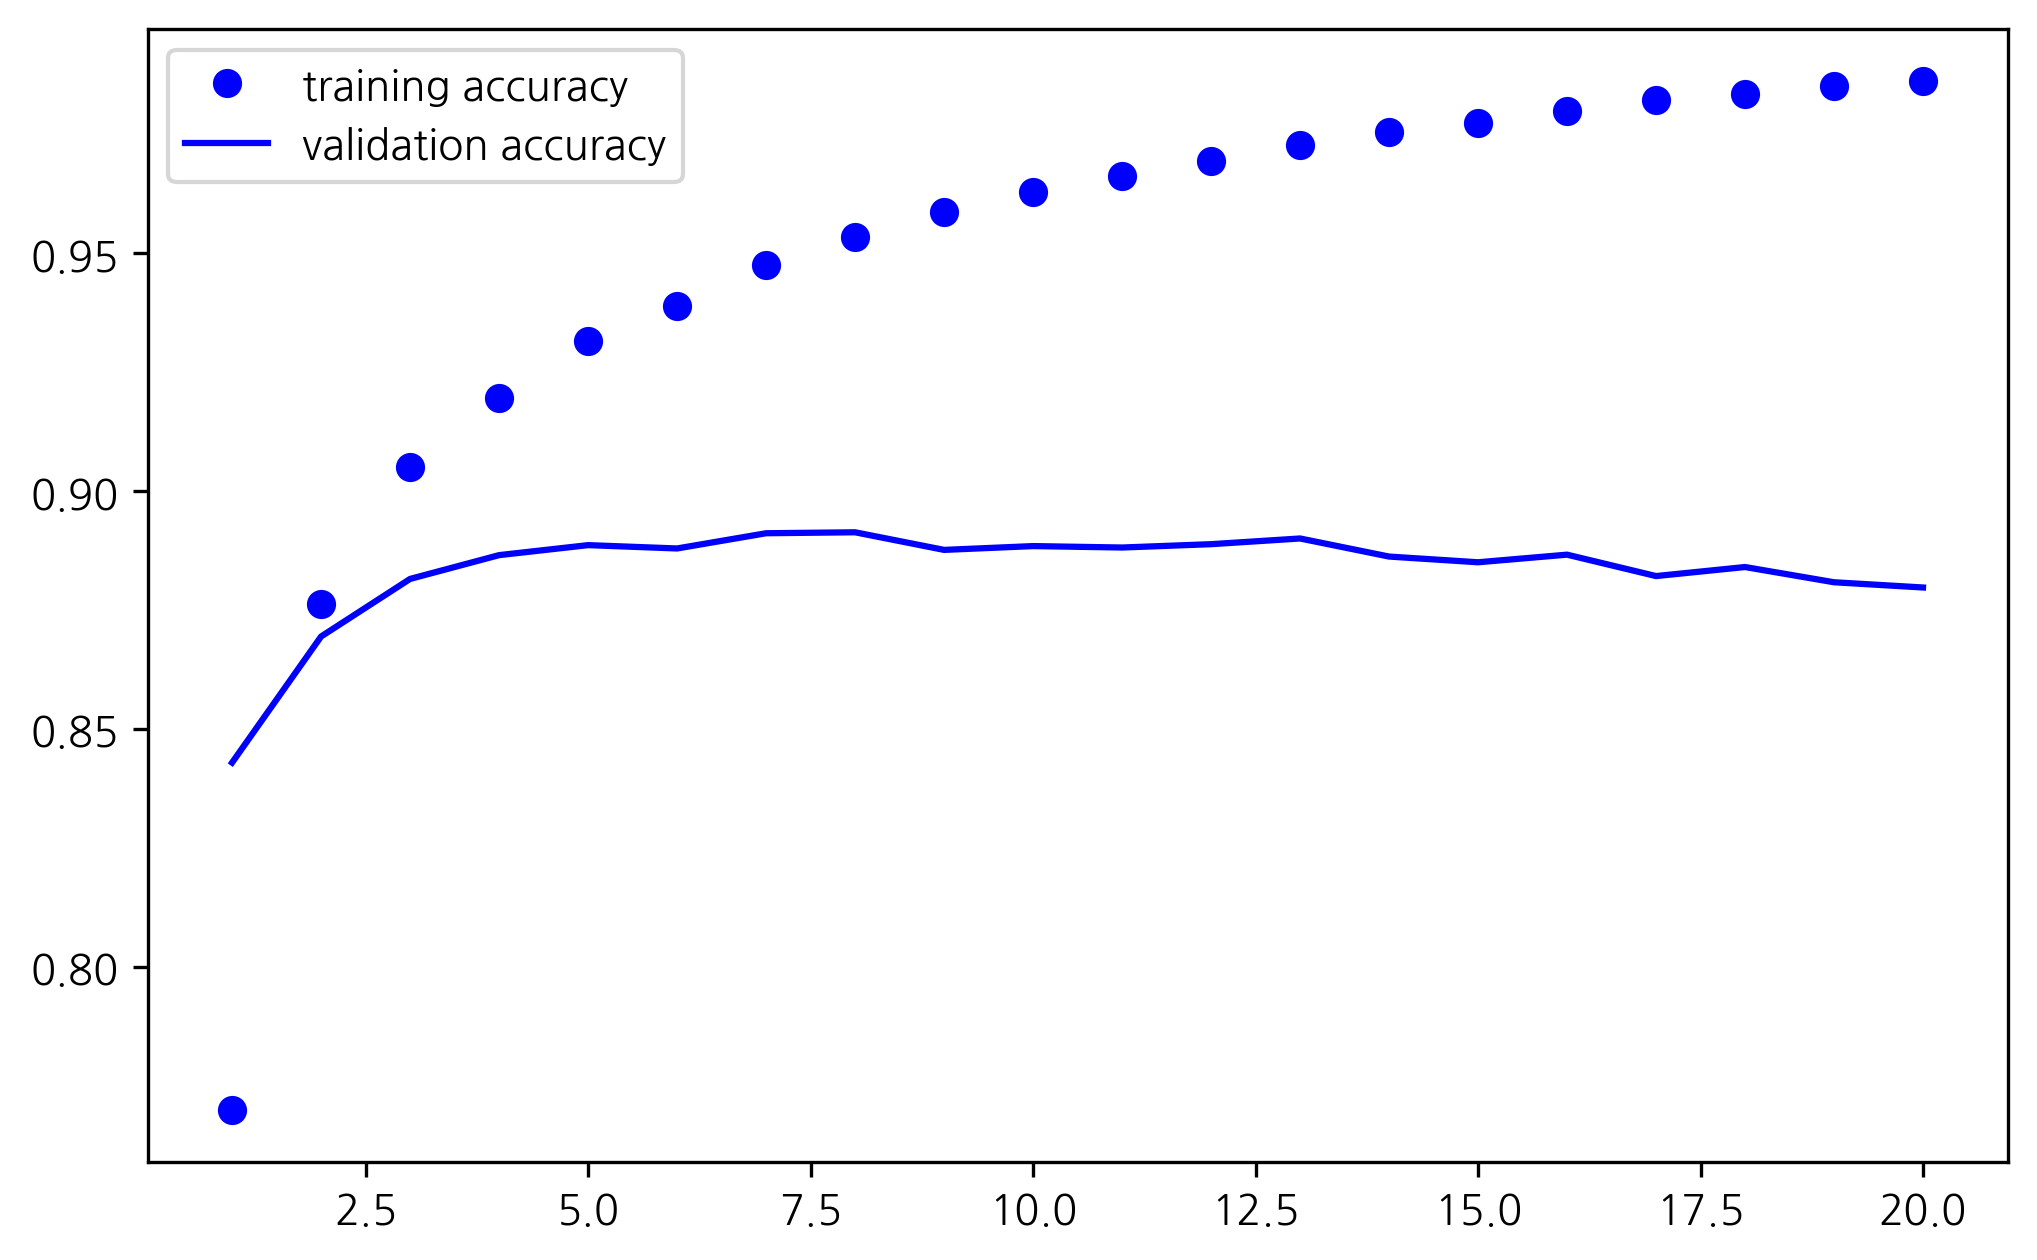

In [81]:
plt.plot(range(1,21),r.history['accuracy'], 'bo',label='training accuracy')
plt.plot(range(1,21),r.history['val_accuracy'], 'b', label='validation accuracy')
plt.legend()
plt.show()

# 다중분류 문제에 신경망 적용하기 

In [87]:
from keras.datasets import reuters

(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

In [100]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_news = ' '.join([reversed_word_index.get(i-3, '?') for i in train_data[0]])
decoded_news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [135]:
# 데이터 전처리 - 각 데이터(문장) 원핫 인코딩 벡터 꼴로 변환 
import numpy as np 
def vectorize_sequence(sequence, dimension=10000) : 
    matrix = np.zeros((len(sequence), dimension))
    for i, sq in enumerate(sequence) :
        matrix[i, sq] = 1.
    return matrix
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [145]:
# 레이블 원핫 인코딩 벡터로 변환 
def invert_one_hot(sequence, dimension=46) : 
    matrix = np.zeros((len(sequence), dimension))
    for i, sq in enumerate(sequence) : 
        matrix[i, sq] = 1.
    return matrix 
one_hot_train_label = invert_one_hot(train_label)
one_hot_test_label = invert_one_hot(test_label)

In [173]:
# 모델 구성 
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [174]:
# 모델 컴파일 
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [175]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_label[:1000]
partial_y_train = one_hot_train_label[1000:]

In [176]:
# 모델 훈련 
training_result = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20


2022-01-23 15:11:20.225373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 27ms/step - loss: 2.5077 - accuracy: 0.5395 - val_loss: 1.6714 - val_accuracy: 0.6550
Epoch 2/20
 6/16 [==========>...................] - ETA: 0s - loss: 1.5121 - accuracy: 0.6904

2022-01-23 15:11:20.803377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 15ms/step - loss: 1.3920 - accuracy: 0.7087 - val_loss: 1.2909 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0337 - accuracy: 0.7745 - val_loss: 1.1064 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8139 - accuracy: 0.8280 - val_loss: 1.0096 - val_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6505 - accuracy: 0.8644 - val_loss: 0.9764 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5188 - accuracy: 0.8928 - val_loss: 0.9069 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4247 - accuracy: 0.9104 - val_loss: 0.8971 - val_accuracy: 0.8150
Epoch 8/20
16/16 [==============================] - 0s 13ms/step - loss: 0.3435 - accuracy: 0.9257 - val_loss: 0.8913 - val_accuracy: 0.8070
Epoch 9/20
16/16 [======

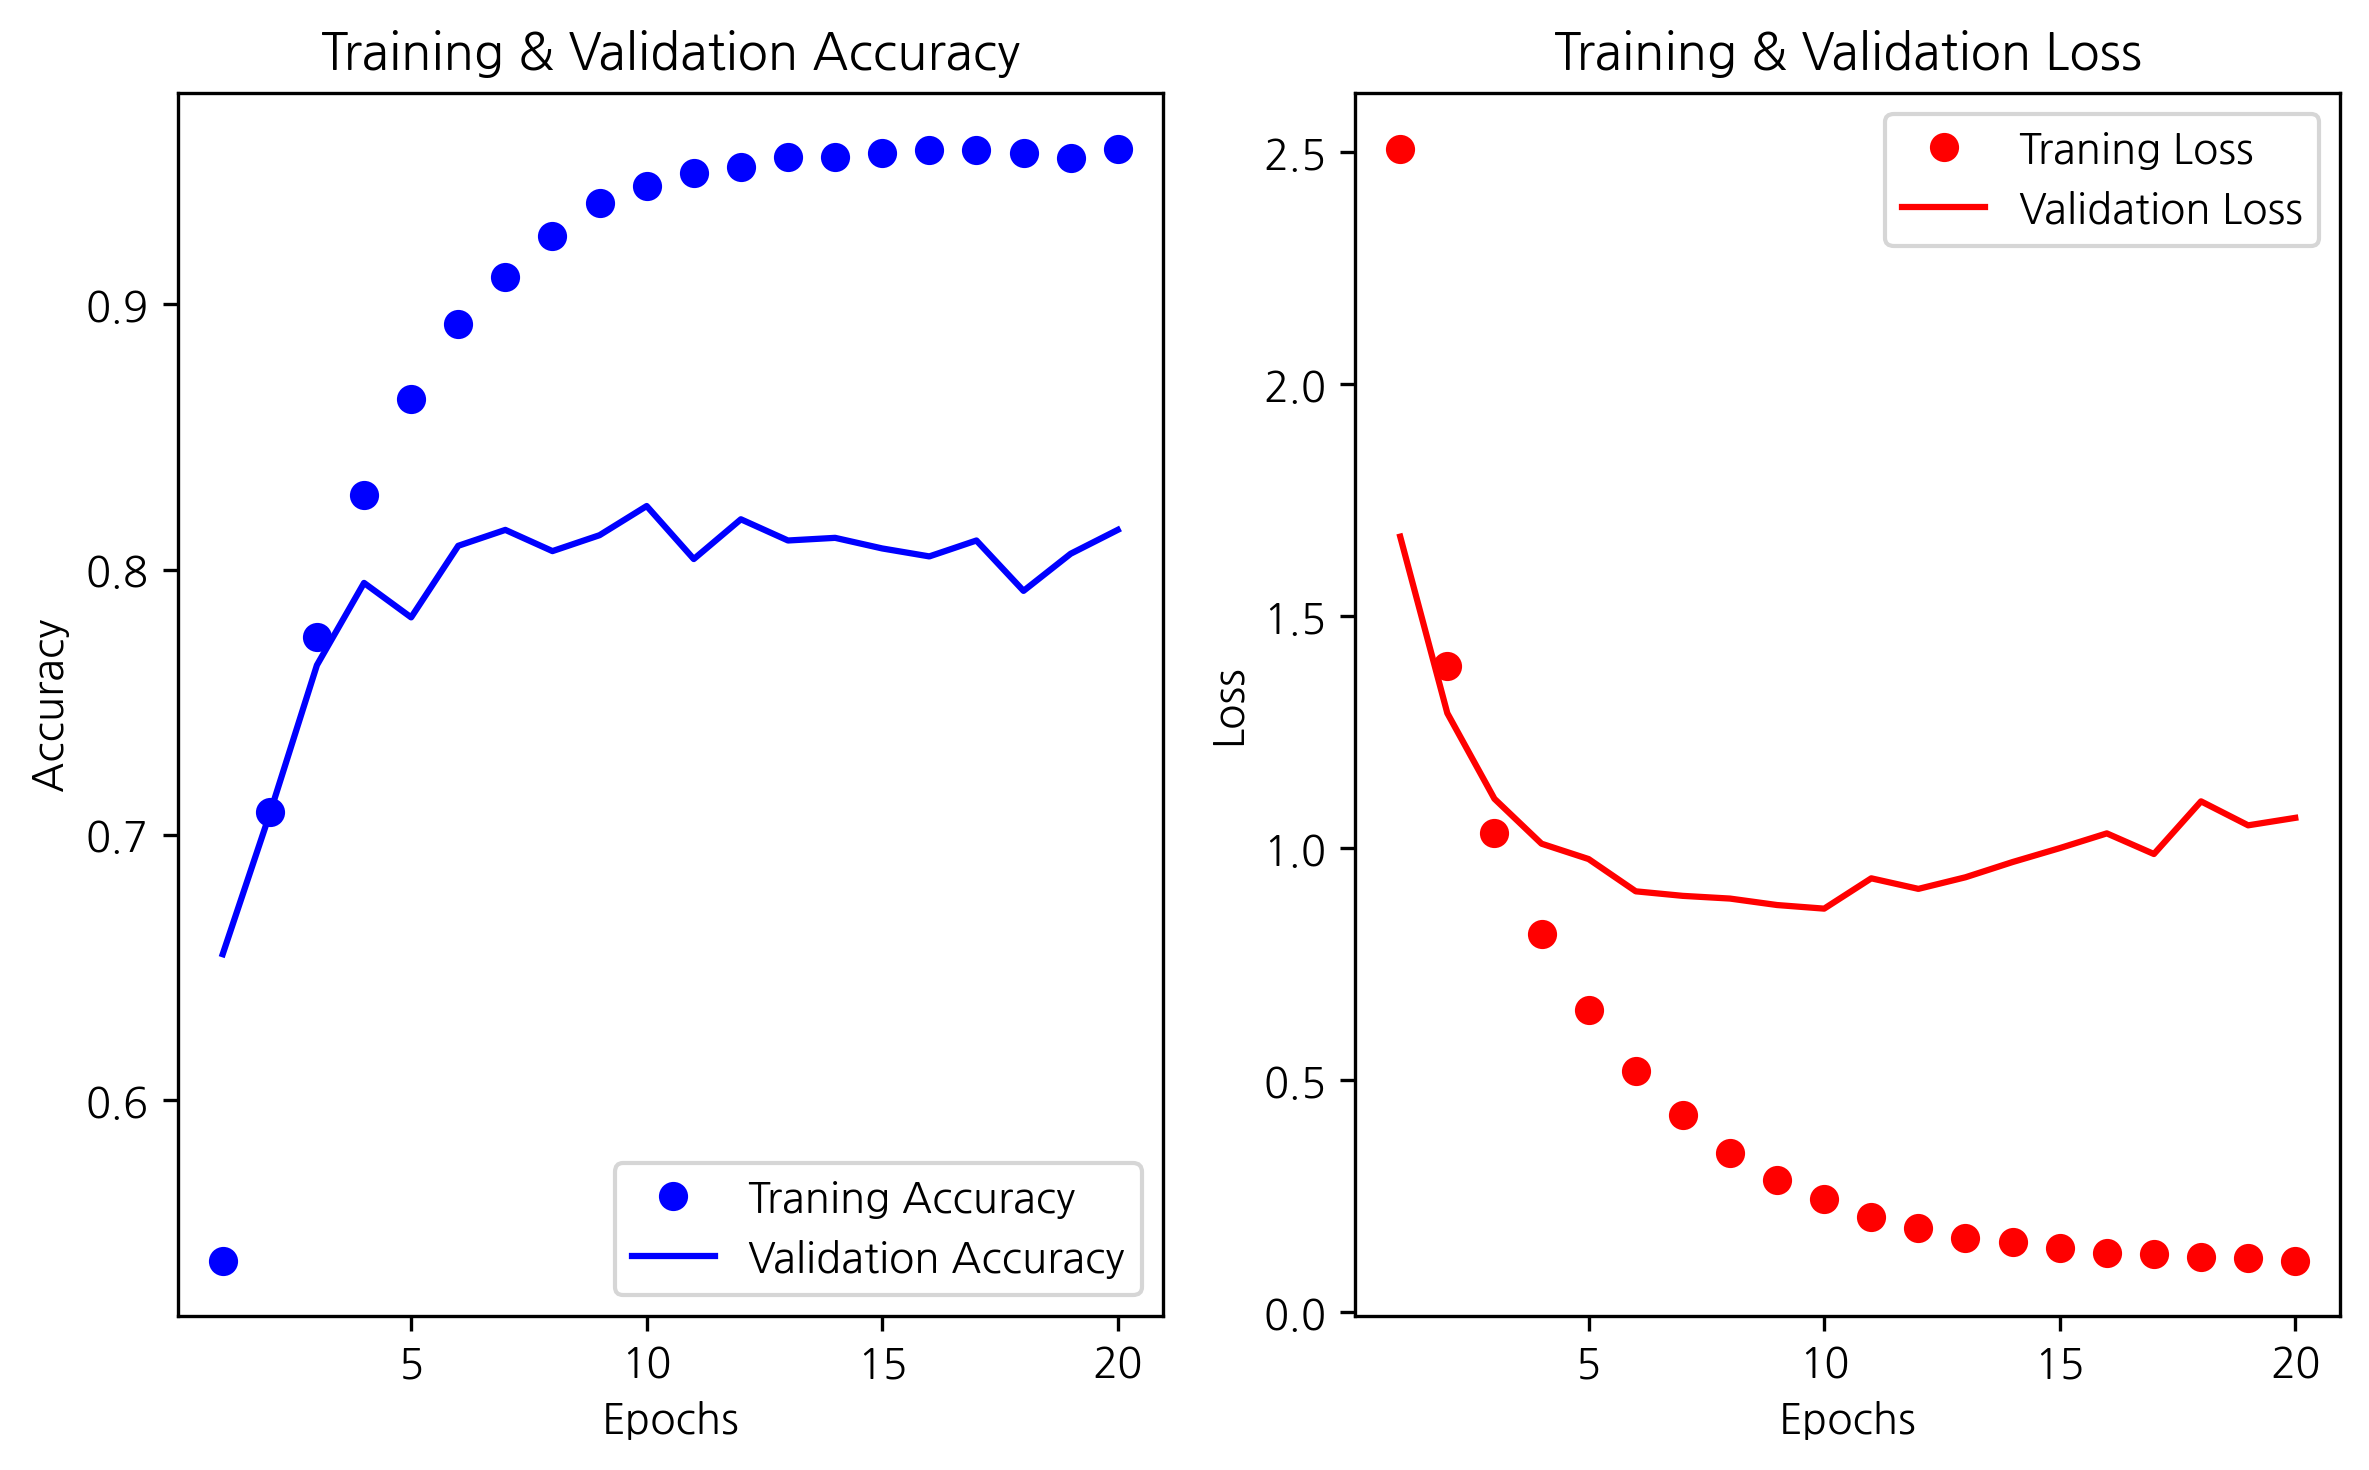

In [184]:
#plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
epochs = range(1,21)
plt.plot(epochs, training_result.history['accuracy'], 'bo', label='Traning Accuracy')
plt.plot(epochs, training_result.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, training_result.history['loss'], 'ro', label='Traning Loss')
plt.plot(epochs, training_result.history['val_loss'], 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 너무 에포크를 많이 돌아도 과적합이 나타난다. 
### 한 9번째 에포크 부터 과적합 나타나는 것 같다. 

In [190]:
# 에포크 9번으로 조정하고 모델 새로 훈련시키기 
# 모델 정의
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일 
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 훈련 
result = model.fit(x_train, one_hot_train_label, epochs=9, batch_size=512)

Epoch 1/9


2022-01-23 15:25:14.927946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 19ms/step - loss: 2.4221 - accuracy: 0.5497
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3218 - accuracy: 0.7160
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9758 - accuracy: 0.7928
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7586 - accuracy: 0.8378
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5997 - accuracy: 0.8758
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4754 - accuracy: 0.8990
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3816 - accuracy: 0.9179
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3167 - accuracy: 0.9324
Epoch 9/9
18/18 [==============================] - 0s 17ms/step - loss: 0.2642 - accuracy: 0.9404


In [192]:
result2 = model.evaluate(x_test, one_hot_test_label)
result2

71/71 [==============================] - 1s 9ms/step - loss: 0.9700 - accuracy: 0.7947


[0.9699822664260864, 0.7947462201118469]

# 예측 

In [194]:
predictions = model.predict(x_test)

In [198]:
predictions[0] # 소프트맥스함수 통과한 확률꼴 값들 

array([1.4110949e-04, 4.8126664e-04, 1.1033692e-04, 8.8576573e-01,
       7.7810965e-02, 3.6122601e-05, 8.3364401e-04, 3.4462396e-04,
       5.8464385e-03, 5.4321990e-06, 9.9361525e-04, 9.0298615e-03,
       2.9815559e-04, 1.0625498e-04, 9.0656577e-05, 2.3195847e-04,
       3.9984188e-03, 2.5559982e-04, 2.6795568e-04, 1.9715878e-03,
       4.1824253e-03, 1.6118793e-03, 1.2001084e-04, 2.6436741e-04,
       4.2247011e-05, 1.8133271e-05, 3.6709545e-05, 5.8105346e-05,
       3.6879731e-04, 4.4343507e-04, 3.1373653e-04, 3.5788215e-04,
       3.0473795e-05, 2.8870341e-05, 2.2142827e-04, 2.0817017e-04,
       1.2025734e-03, 2.9171757e-05, 1.6093094e-04, 9.0722094e-04,
       4.4212968e-05, 3.4247176e-04, 1.5164790e-04, 1.2650869e-04,
       1.0617297e-04, 2.7999363e-06], dtype=float32)

In [199]:
sum(predictions[0])

1.0000001185512701

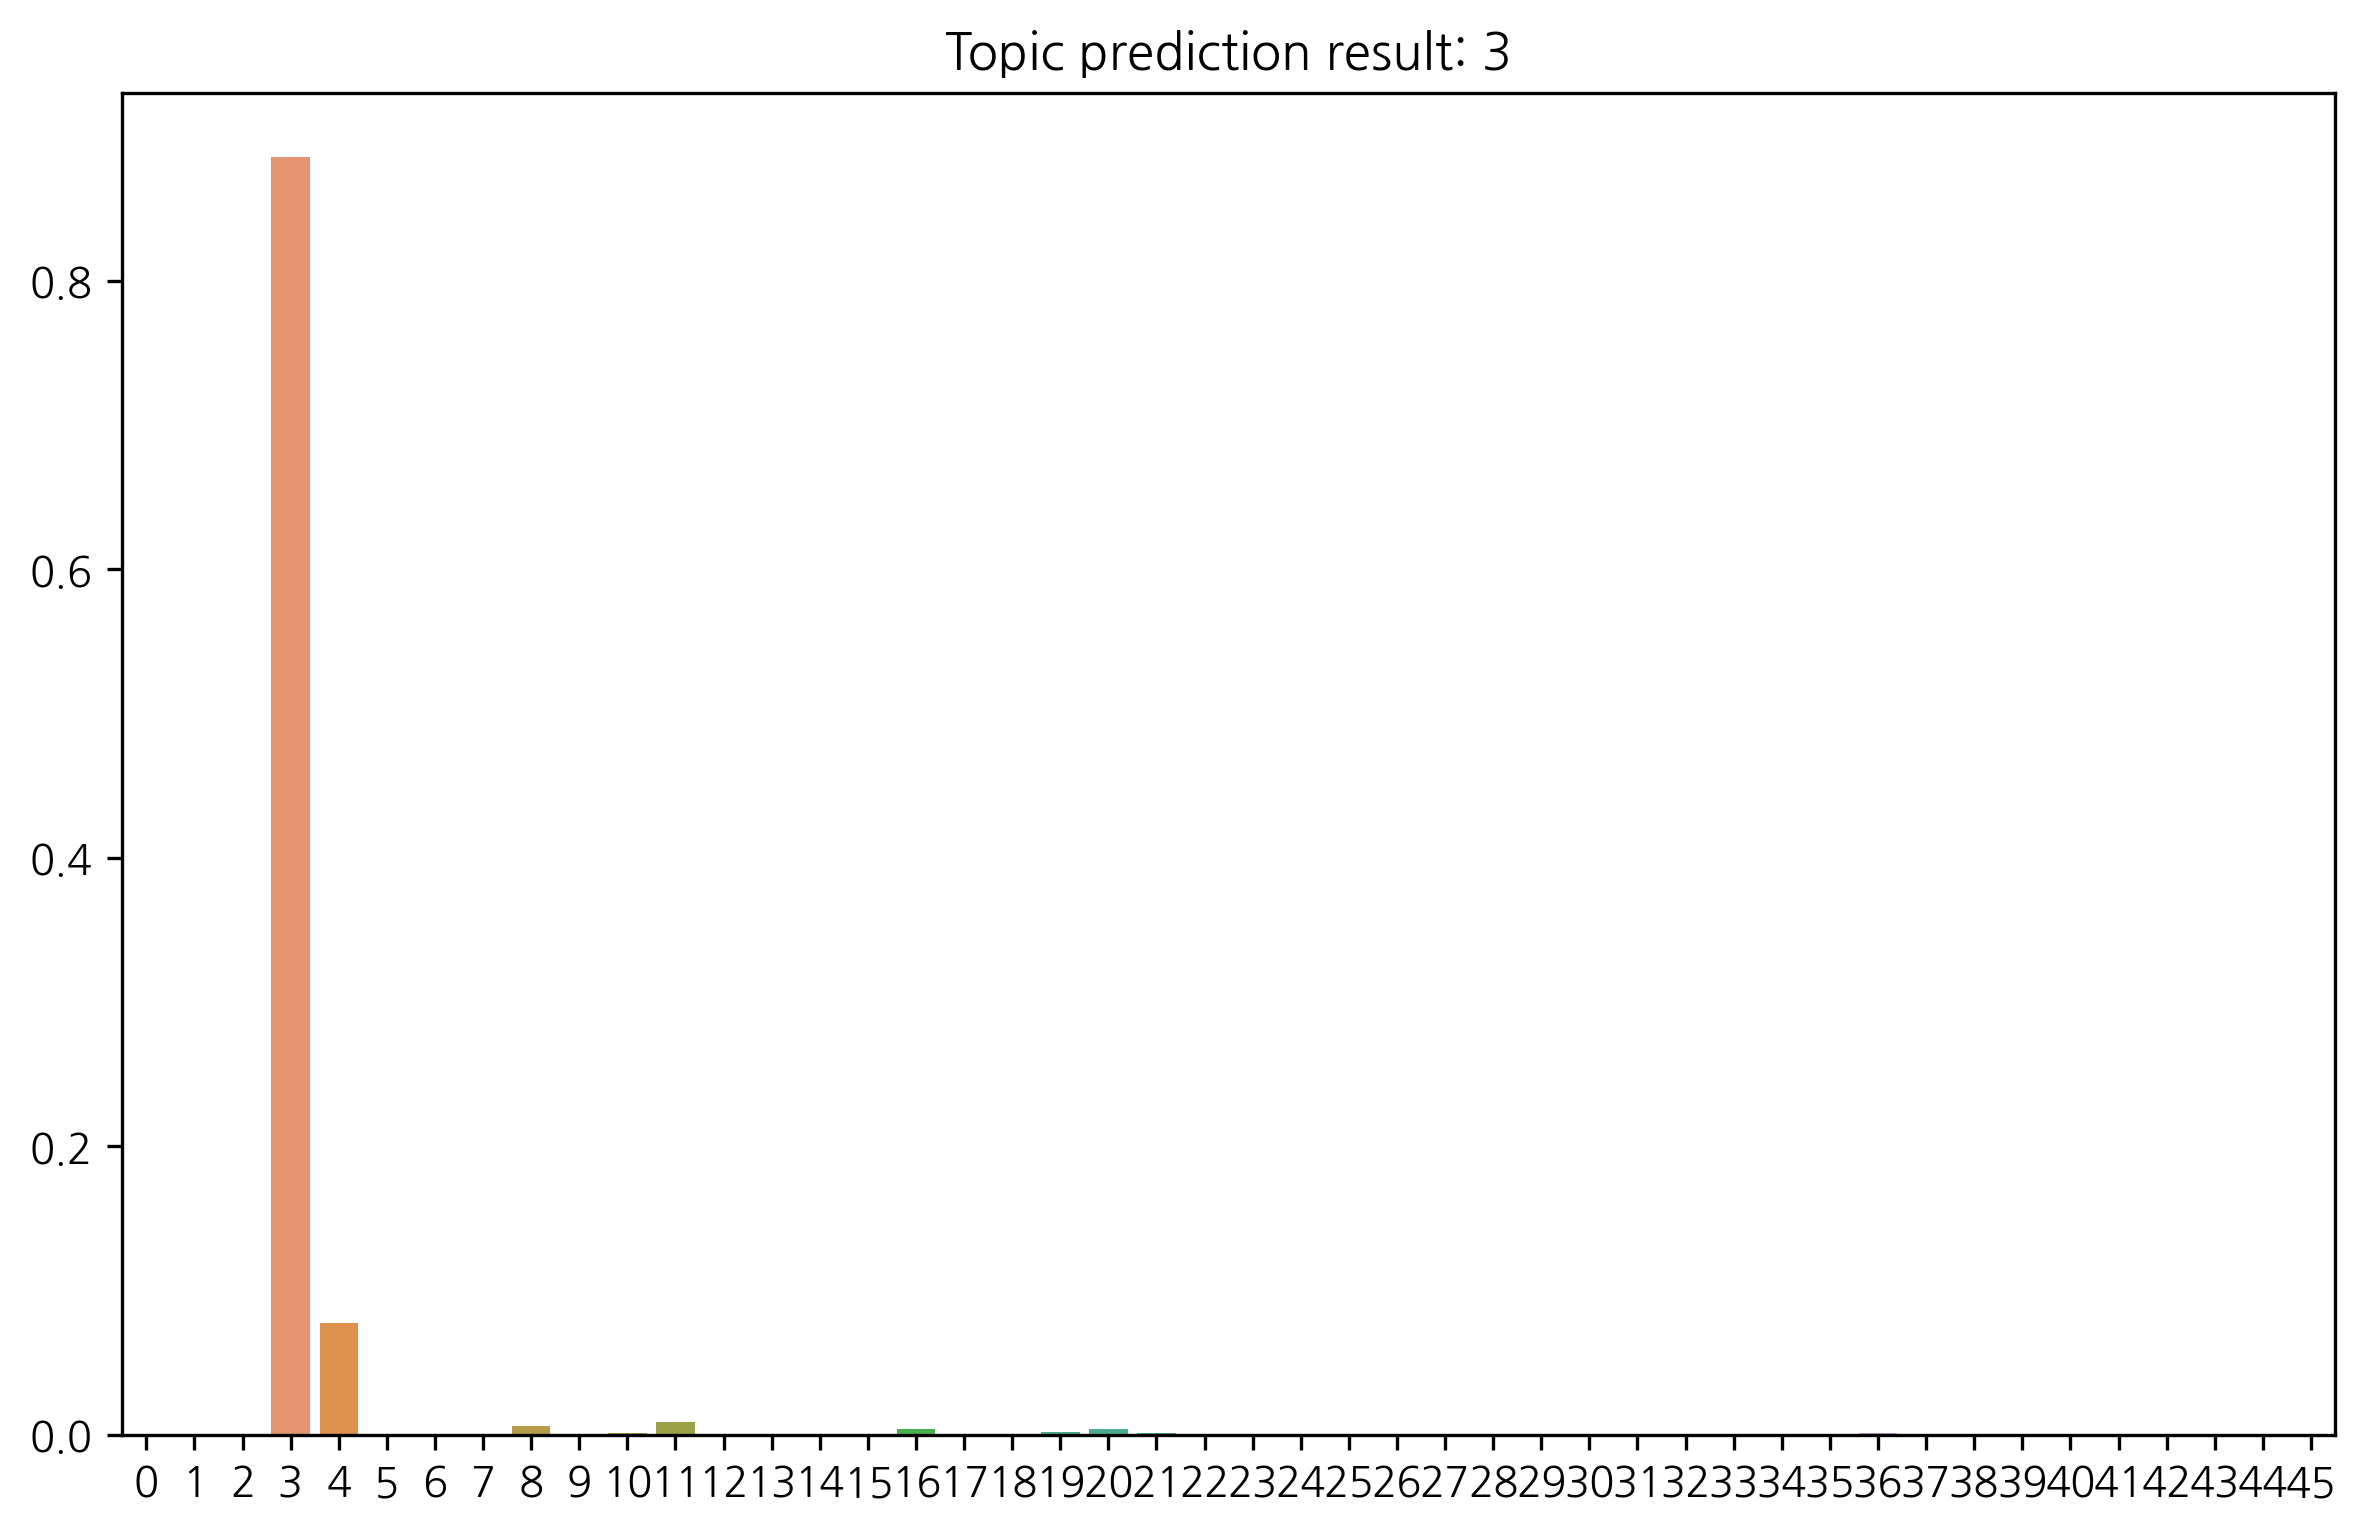

In [215]:
sns.barplot(np.arange(0, 46, 1), predictions[0])
plt.tight_layout()
plt.title('Topic prediction result: 3')
plt.show()

In [216]:
train_label[:10][0] # 실제 정답 

3

In [220]:
# 추가 실험 
# 중간 층 유닛크기를 32로 해보자. 
# 모델 정의
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 학습 
result = model.fit(x_train, one_hot_train_label, batch_size=512, epochs=9, validation_data=(x_test, one_hot_test_label))

Epoch 1/9


2022-01-23 17:36:24.078393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/18 [=========================>....] - ETA: 0s - loss: 2.6391 - accuracy: 0.5146

2022-01-23 17:36:24.974837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 38ms/step - loss: 2.5798 - accuracy: 0.5229 - val_loss: 1.8478 - val_accuracy: 0.6380
Epoch 2/9
18/18 [==============================] - 0s 20ms/step - loss: 1.5020 - accuracy: 0.6918 - val_loss: 1.3996 - val_accuracy: 0.6928
Epoch 3/9
18/18 [==============================] - 0s 16ms/step - loss: 1.1071 - accuracy: 0.7645 - val_loss: 1.2211 - val_accuracy: 0.7382
Epoch 4/9
18/18 [==============================] - 0s 17ms/step - loss: 0.8757 - accuracy: 0.8182 - val_loss: 1.1153 - val_accuracy: 0.7636
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7114 - accuracy: 0.8539 - val_loss: 1.0484 - val_accuracy: 0.7725
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5795 - accuracy: 0.8800 - val_loss: 1.0021 - val_accuracy: 0.7738
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4737 - accuracy: 0.9045 - val_loss: 0.9651 - val_accuracy: 0.7841
Epoch 8/9
18/18 [=============

In [221]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

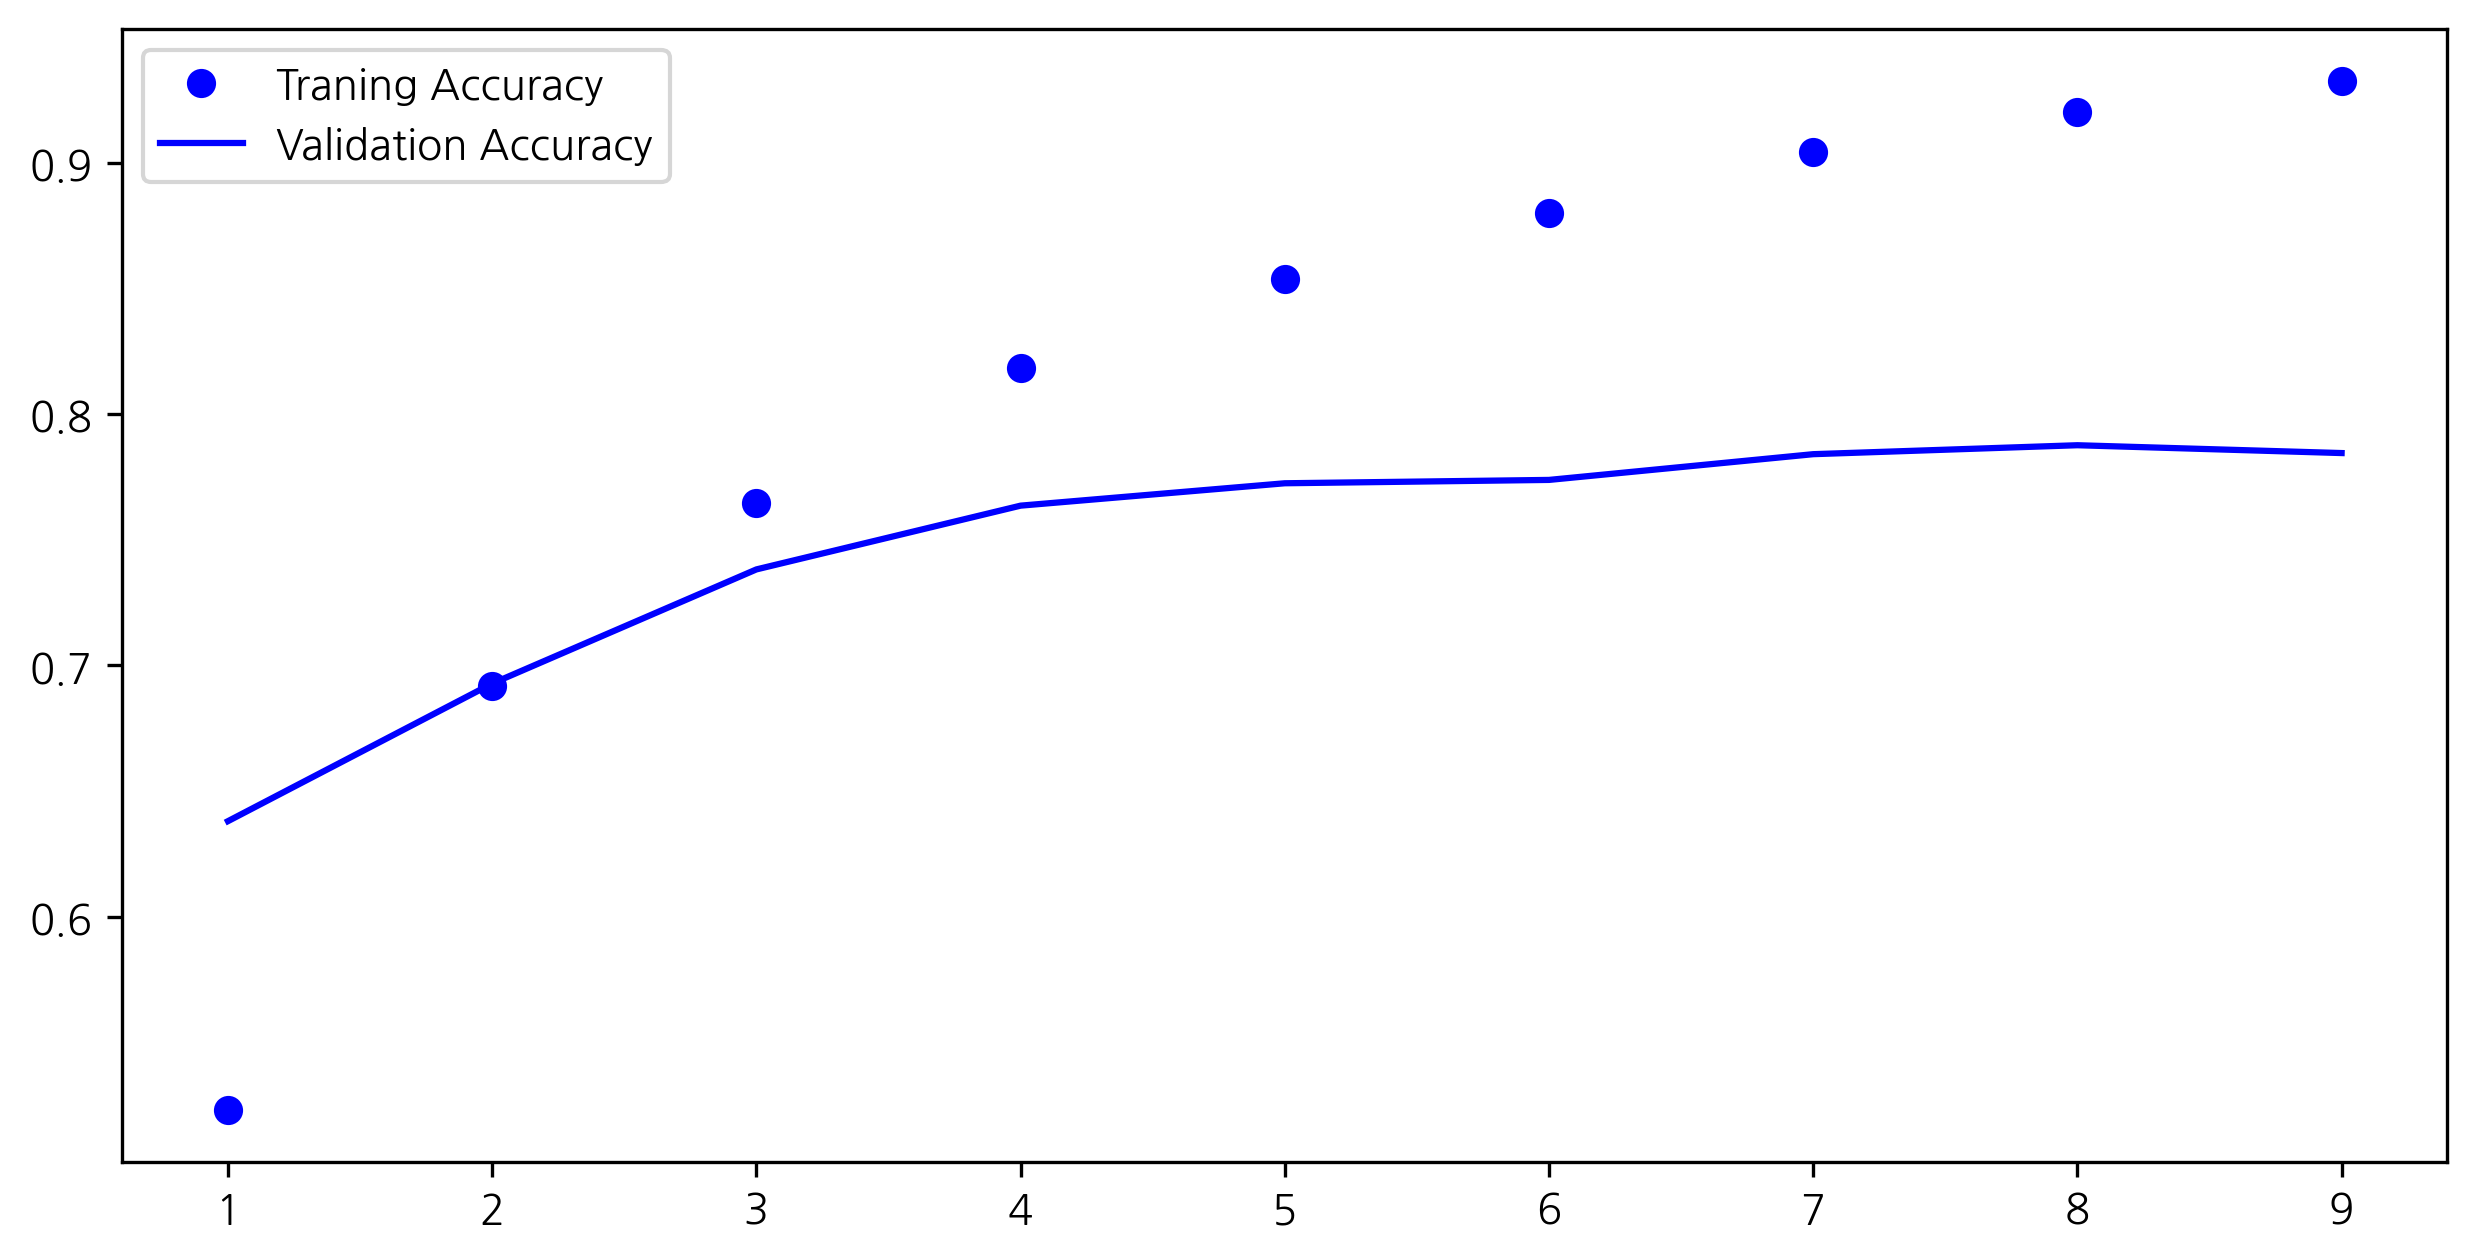

In [222]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10), result.history['accuracy'], 'bo', label='Traning Accuracy')
plt.plot(range(1,10), result.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

## 검증 데이터셋에서 정확도가 살짝 떨어졌다. 그런데 크게 주목할 만한 정도는 아니었다. 

In [225]:
# 유닛 크기를 더 줄여보자. --> 10 
def training_model(unit_num):
    global x_train 
    global one_hot_train_label
    global x_test
    global one_hot_test_label

    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(int(unit_num), activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))

    # 모델 컴파일
    model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # 모델 학습 
    result = model.fit(x_train, one_hot_train_label, batch_size=512, epochs=9, validation_data=(x_test, one_hot_test_label))

    plt.clf()
    plt.figure(figsize=(10,5))
    plt.plot(range(1,10), result.history['accuracy'], 'bo', label='Traning Accuracy')
    plt.plot(range(1,10), result.history['val_accuracy'], 'b', label='Validation Accuracy')
    plt.legend()
    plt.show()

Epoch 1/9


2022-01-23 17:43:12.899196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 2s 47ms/step - loss: 2.8640 - accuracy: 0.5062 - val_loss: 2.2346 - val_accuracy: 0.5935
Epoch 2/9
 1/18 [>.............................] - ETA: 0s - loss: 2.2279 - accuracy: 0.5840

2022-01-23 17:43:14.459818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 17ms/step - loss: 1.8811 - accuracy: 0.6285 - val_loss: 1.7626 - val_accuracy: 0.6100
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 1.4756 - accuracy: 0.6672 - val_loss: 1.5186 - val_accuracy: 0.6496
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 1.2463 - accuracy: 0.7042 - val_loss: 1.3969 - val_accuracy: 0.6723
Epoch 5/9
18/18 [==============================] - 0s 18ms/step - loss: 1.0831 - accuracy: 0.7486 - val_loss: 1.3489 - val_accuracy: 0.6852
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.9541 - accuracy: 0.7842 - val_loss: 1.2665 - val_accuracy: 0.7075
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.8471 - accuracy: 0.8143 - val_loss: 1.2445 - val_accuracy: 0.7191
Epoch 8/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7547 - accuracy: 0.8337 - val_loss: 1.1922 - val_accuracy: 0.7329
Epoch 9/9
18/18 [=============

<Figure size 2400x1500 with 0 Axes>

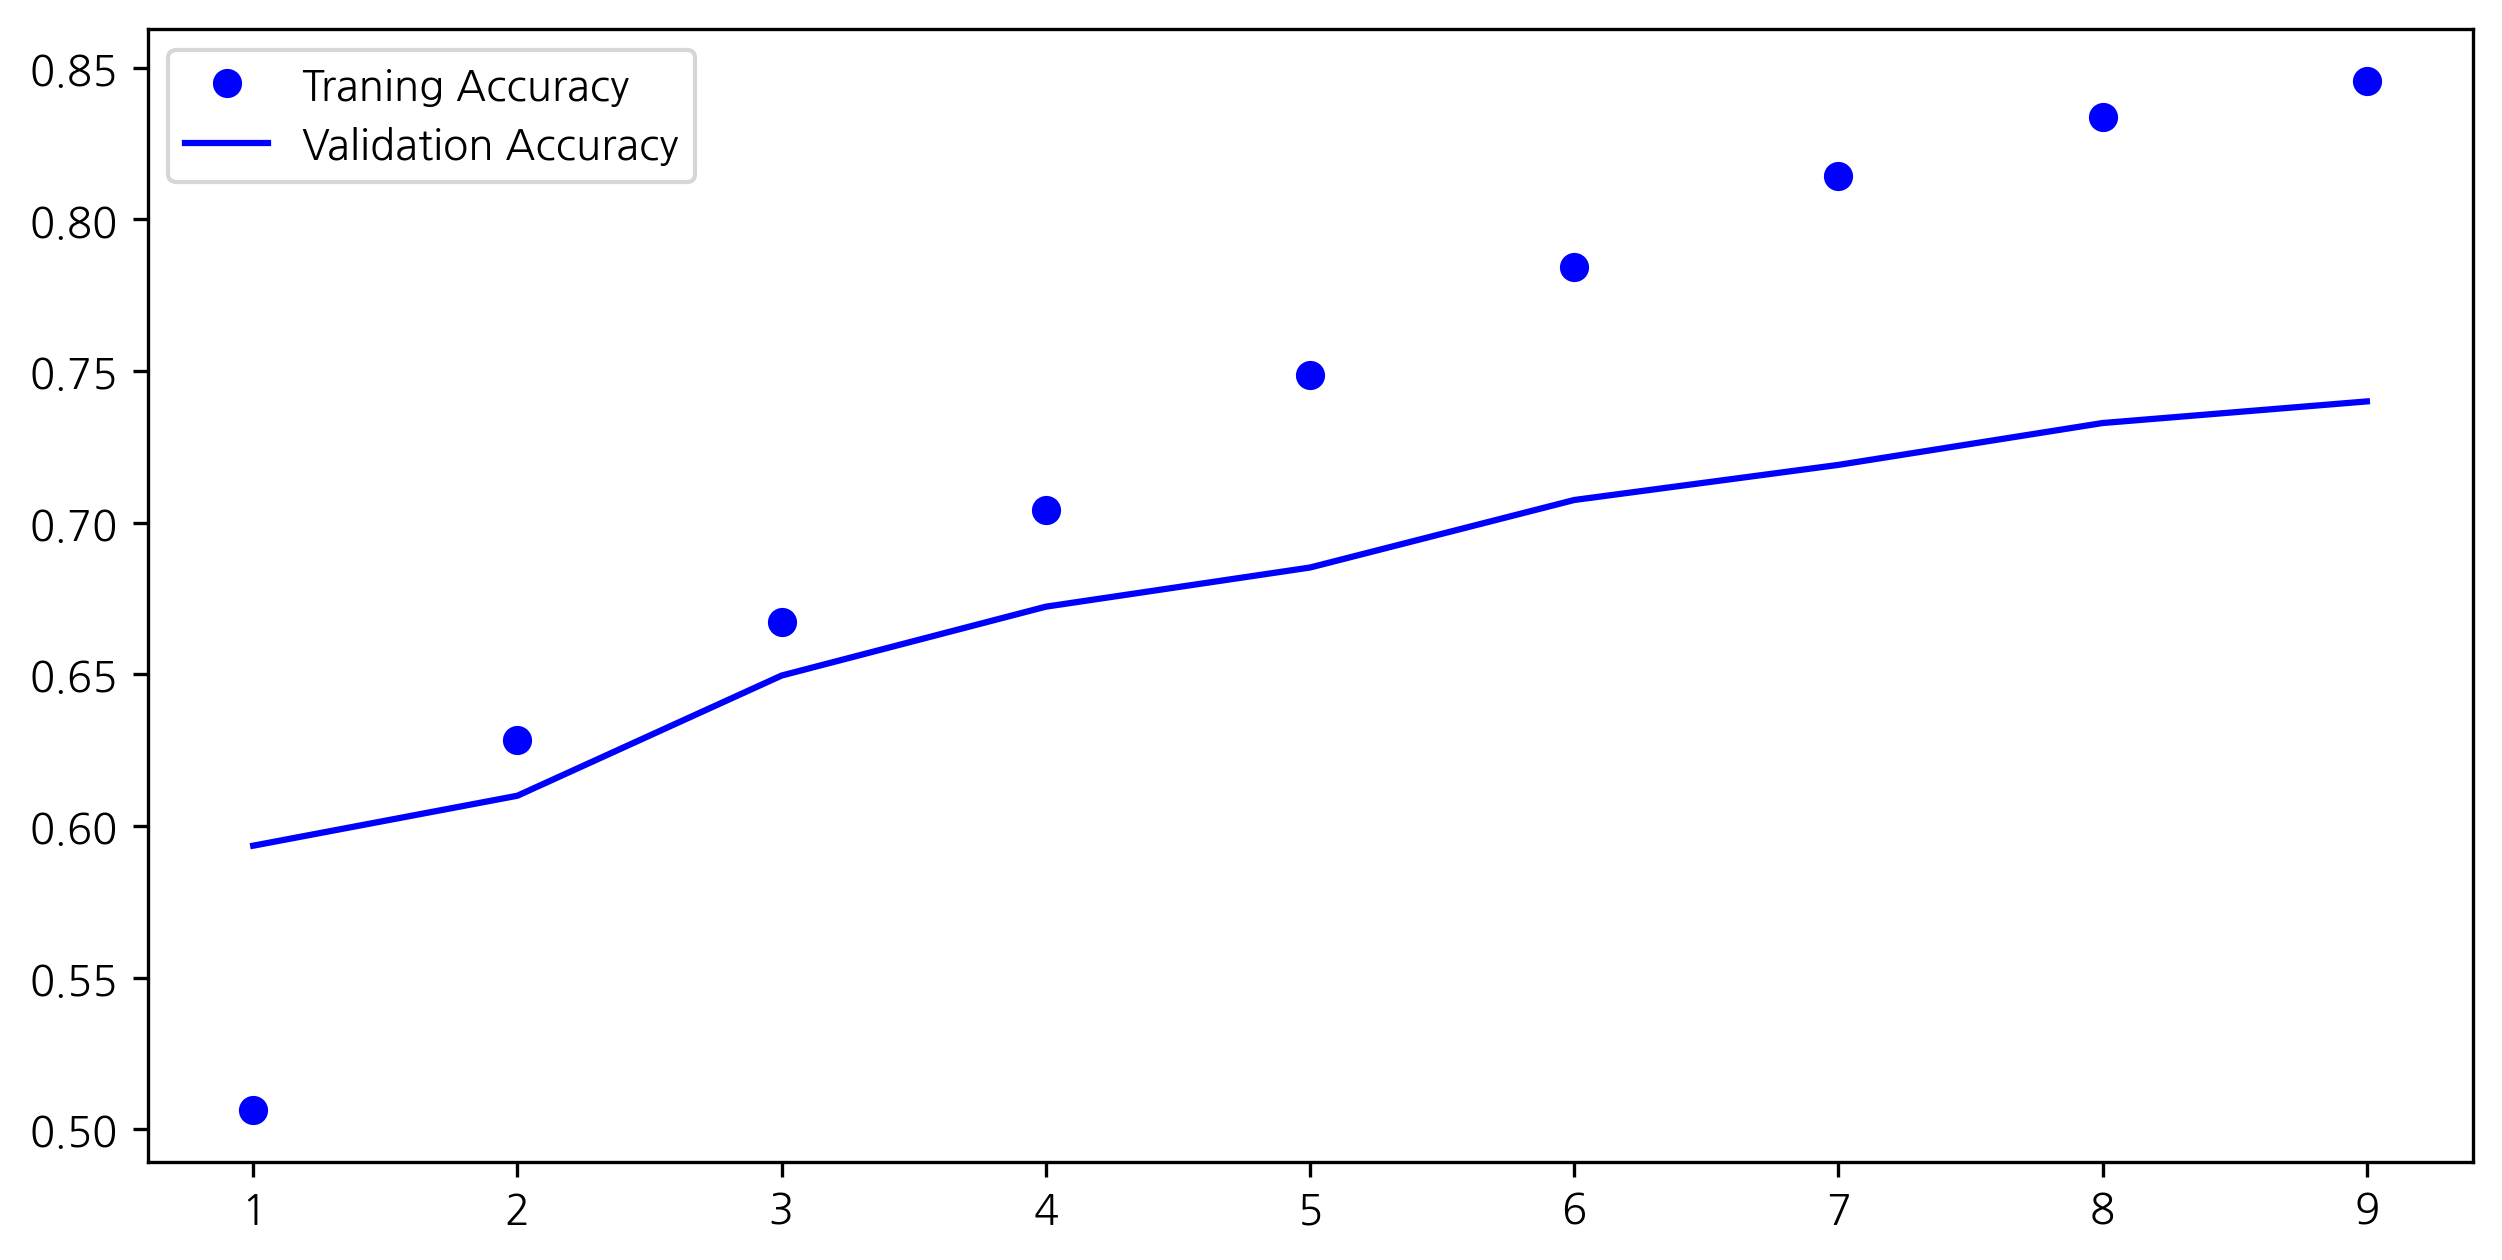

In [226]:
training_model(10)

## 중간층 히든유닛 갯수를 10개로 줄이니 검증셋 정확도가 78% 에서 74% 까지 4%정도 떨어졌다. 
## 데이터가 너무 저차원으로 차원축소 되면서 분류에 필요한 정보가 제대로 걸러지지 않았고, 결과로 제대로 분류가 안 됬다고 추측할 수 있다. 

Epoch 1/9


2022-01-23 17:49:11.168827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 34ms/step - loss: 2.1284 - accuracy: 0.5264 - val_loss: 1.4689 - val_accuracy: 0.6683
Epoch 2/9
 1/18 [>.............................] - ETA: 0s - loss: 1.3094 - accuracy: 0.7070

2022-01-23 17:49:12.008515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 18ms/step - loss: 1.1917 - accuracy: 0.7321 - val_loss: 1.2208 - val_accuracy: 0.7088
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 0.8912 - accuracy: 0.7986 - val_loss: 1.1446 - val_accuracy: 0.7342
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6636 - accuracy: 0.8507 - val_loss: 0.9866 - val_accuracy: 0.7698
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5051 - accuracy: 0.8872 - val_loss: 0.9697 - val_accuracy: 0.7845
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3847 - accuracy: 0.9144 - val_loss: 0.9919 - val_accuracy: 0.7836
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.2916 - accuracy: 0.9338 - val_loss: 0.9641 - val_accuracy: 0.7979
Epoch 8/9
18/18 [==============================] - 0s 15ms/step - loss: 0.2415 - accuracy: 0.9403 - val_loss: 1.0247 - val_accuracy: 0.7907
Epoch 9/9
18/18 [=============

<Figure size 2400x1500 with 0 Axes>

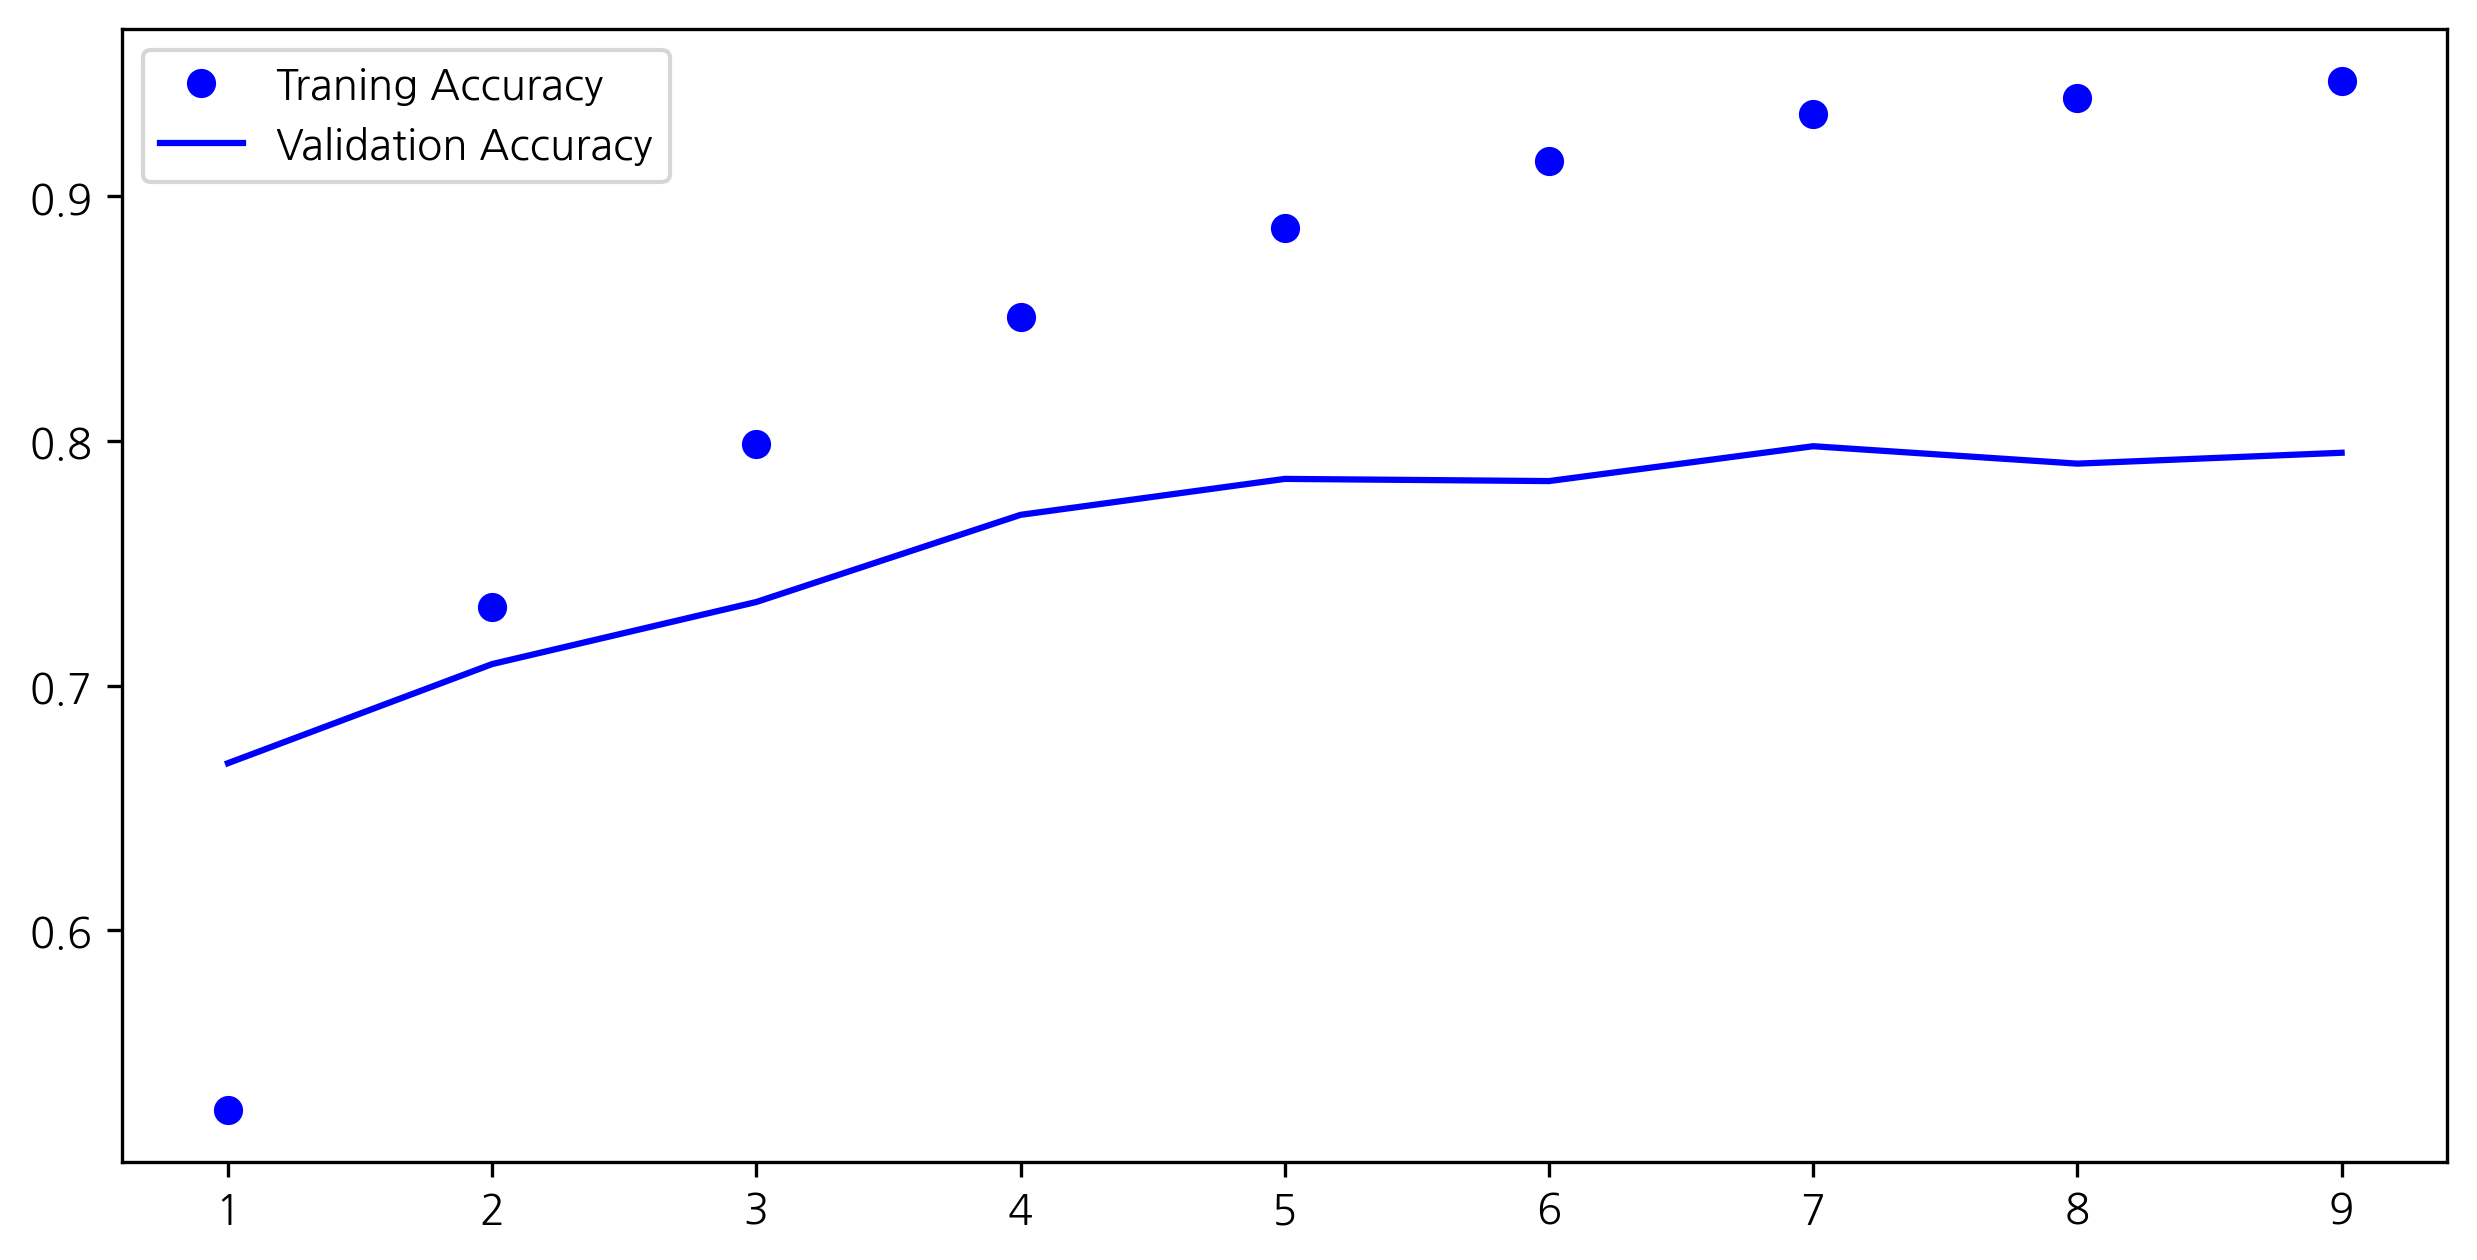

In [230]:
# 만약 히든유닛 갯수를 더 크게하면? -> 256
training_model(512)

In [237]:
# 모델에 은닉 층을 1개만 썼을 때 

def training_model(unit_num, layer_added_num):
    global x_train 
    global one_hot_train_label
    global x_test
    global one_hot_test_label

    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    for i in range(layer_added_num) : 
        model.add(layers.Dense(int(unit_num), activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))

    # 모델 컴파일
    model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # 모델 학습 
    result = model.fit(x_train, one_hot_train_label, batch_size=512, epochs=9, validation_data=(x_test, one_hot_test_label))

    plt.clf()
    plt.figure(figsize=(10,5))
    plt.plot(range(1,10), result.history['accuracy'], 'bo', label='Traning Accuracy')
    plt.plot(range(1,10), result.history['val_accuracy'], 'b', label='Validation Accuracy')
    plt.legend()
    plt.show()

Epoch 1/9


2022-01-23 17:57:57.322972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 32ms/step - loss: 2.4270 - accuracy: 0.5553 - val_loss: 1.6364 - val_accuracy: 0.6505
Epoch 2/9
 1/18 [>.............................] - ETA: 0s - loss: 1.4835 - accuracy: 0.6758

2022-01-23 17:57:58.152447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 17ms/step - loss: 1.3093 - accuracy: 0.7174 - val_loss: 1.2827 - val_accuracy: 0.7133
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 0.9753 - accuracy: 0.7918 - val_loss: 1.1369 - val_accuracy: 0.7600
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7662 - accuracy: 0.8373 - val_loss: 1.0598 - val_accuracy: 0.7707
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6069 - accuracy: 0.8743 - val_loss: 0.9893 - val_accuracy: 0.7827
Epoch 6/9
18/18 [==============================] - 0s 18ms/step - loss: 0.4862 - accuracy: 0.8977 - val_loss: 0.9704 - val_accuracy: 0.7827
Epoch 7/9
18/18 [==============================] - 0s 17ms/step - loss: 0.3945 - accuracy: 0.9143 - val_loss: 0.9804 - val_accuracy: 0.7881
Epoch 8/9
18/18 [==============================] - 0s 16ms/step - loss: 0.3213 - accuracy: 0.9318 - val_loss: 0.9605 - val_accuracy: 0.7894
Epoch 9/9
18/18 [=============

<Figure size 2400x1500 with 0 Axes>

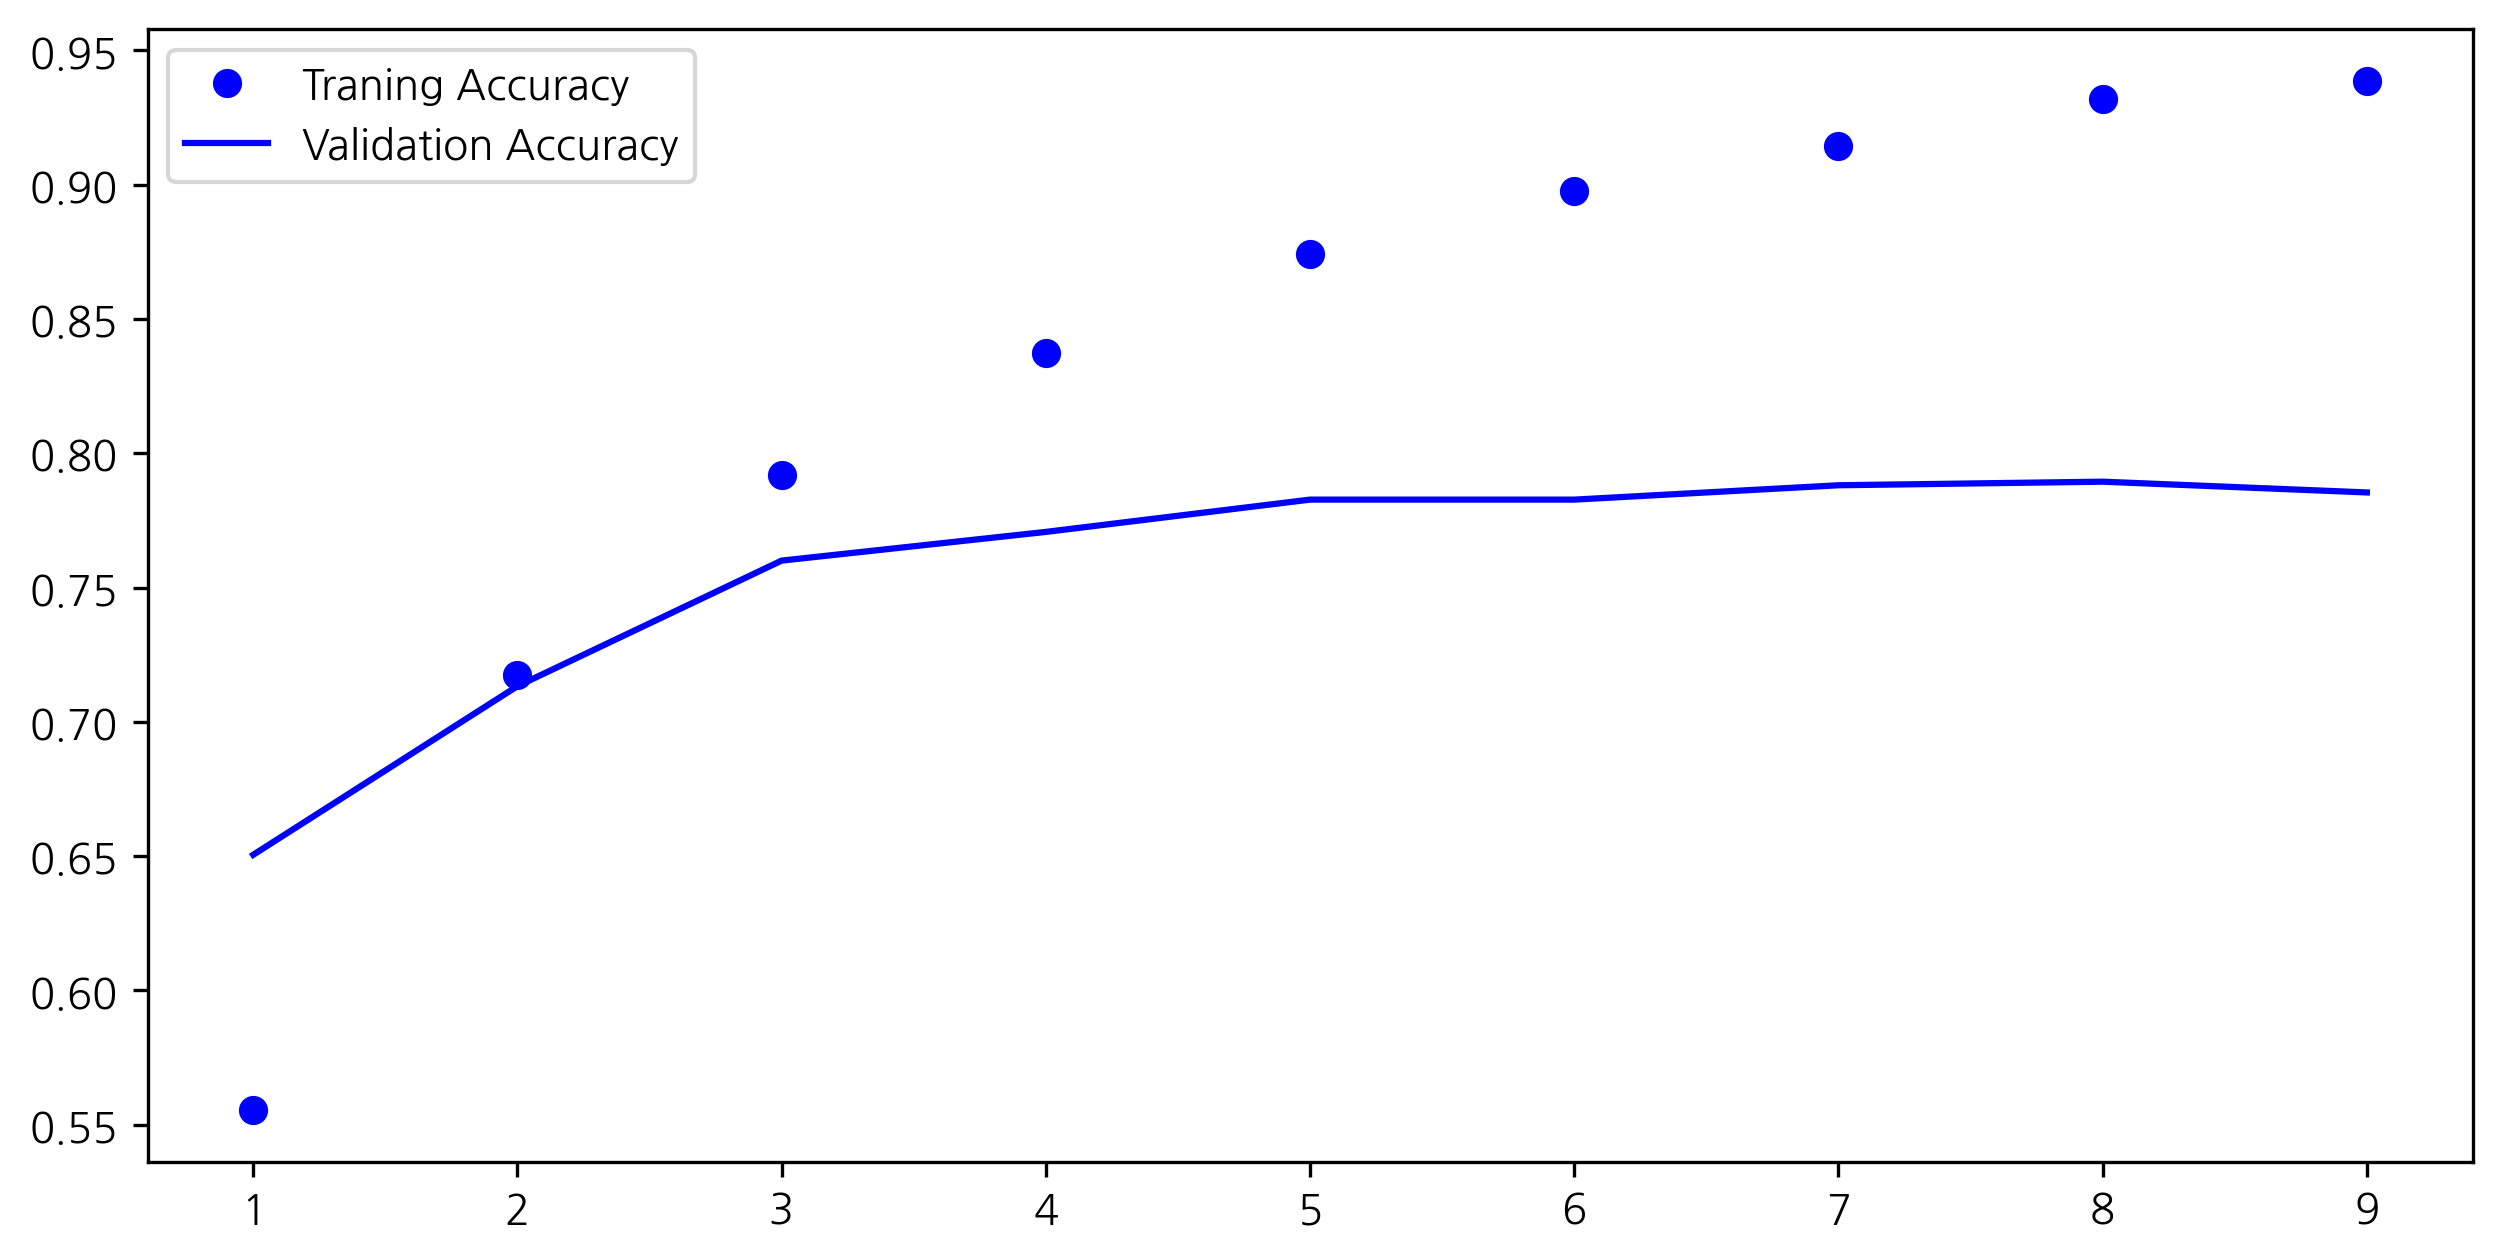

In [235]:
training_model(64, 1)

Epoch 1/9


2022-01-23 18:03:05.271753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 38ms/step - loss: 2.4355 - accuracy: 0.5305 - val_loss: 1.6338 - val_accuracy: 0.6500
Epoch 2/9
 1/18 [>.............................] - ETA: 0s - loss: 1.5405 - accuracy: 0.6602

2022-01-23 18:03:06.341018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 17ms/step - loss: 1.3447 - accuracy: 0.7056 - val_loss: 1.3151 - val_accuracy: 0.6990
Epoch 3/9
18/18 [==============================] - 0s 16ms/step - loss: 1.0277 - accuracy: 0.7622 - val_loss: 1.1915 - val_accuracy: 0.7240
Epoch 4/9
18/18 [==============================] - 0s 17ms/step - loss: 0.8149 - accuracy: 0.8144 - val_loss: 1.0943 - val_accuracy: 0.7480
Epoch 5/9
18/18 [==============================] - 0s 17ms/step - loss: 0.6456 - accuracy: 0.8536 - val_loss: 1.0278 - val_accuracy: 0.7729
Epoch 6/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4949 - accuracy: 0.8947 - val_loss: 1.1078 - val_accuracy: 0.7498
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4006 - accuracy: 0.9137 - val_loss: 1.0404 - val_accuracy: 0.7756
Epoch 8/9
18/18 [==============================] - 0s 16ms/step - loss: 0.3268 - accuracy: 0.9264 - val_loss: 1.0501 - val_accuracy: 0.7818
Epoch 9/9
18/18 [=============

<Figure size 2400x1500 with 0 Axes>

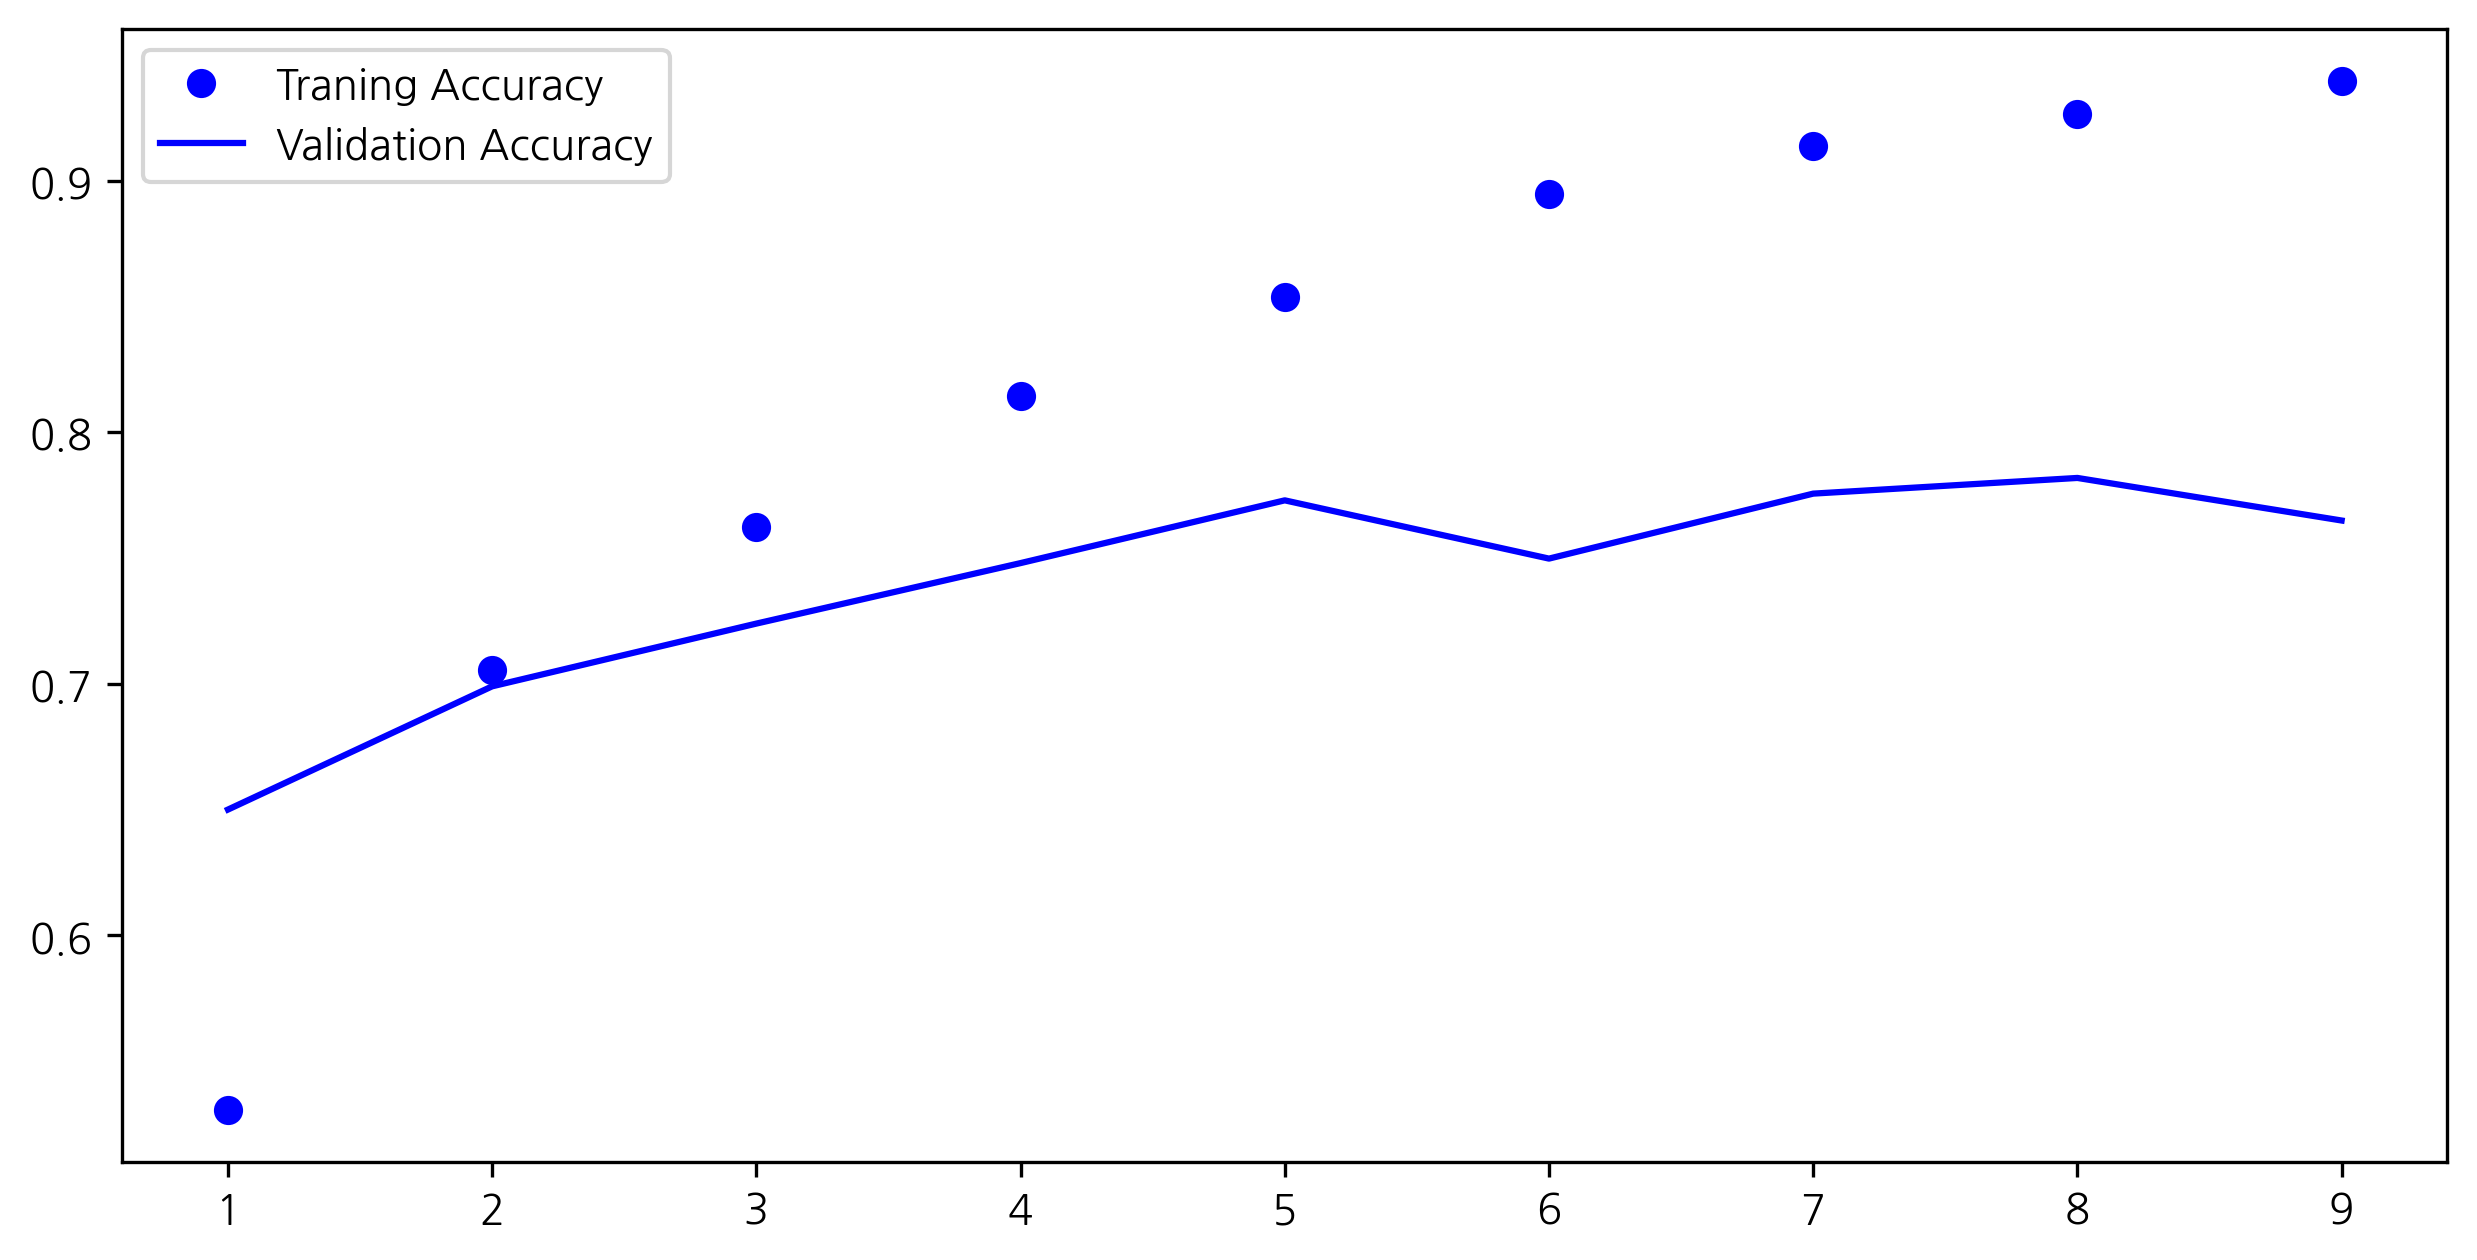

In [244]:
training_model(64,2)

Epoch 1/9


2022-01-23 18:03:14.773354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 40ms/step - loss: 2.4735 - accuracy: 0.5019 - val_loss: 1.6823 - val_accuracy: 0.6242
Epoch 2/9
 1/18 [>.............................] - ETA: 0s - loss: 1.5315 - accuracy: 0.6758

2022-01-23 18:03:15.896472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 19ms/step - loss: 1.4278 - accuracy: 0.6799 - val_loss: 1.3717 - val_accuracy: 0.6830
Epoch 3/9
18/18 [==============================] - 0s 18ms/step - loss: 1.1122 - accuracy: 0.7296 - val_loss: 1.2515 - val_accuracy: 0.6963
Epoch 4/9
18/18 [==============================] - 0s 17ms/step - loss: 0.9229 - accuracy: 0.7752 - val_loss: 1.1731 - val_accuracy: 0.7280
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.7228 - accuracy: 0.8263 - val_loss: 1.1309 - val_accuracy: 0.7516
Epoch 6/9
18/18 [==============================] - 0s 17ms/step - loss: 0.6031 - accuracy: 0.8575 - val_loss: 1.1121 - val_accuracy: 0.7600
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4862 - accuracy: 0.8873 - val_loss: 1.0960 - val_accuracy: 0.7618
Epoch 8/9
18/18 [==============================] - 0s 18ms/step - loss: 0.4013 - accuracy: 0.9084 - val_loss: 1.1249 - val_accuracy: 0.7694
Epoch 9/9
18/18 [=============

<Figure size 2400x1500 with 0 Axes>

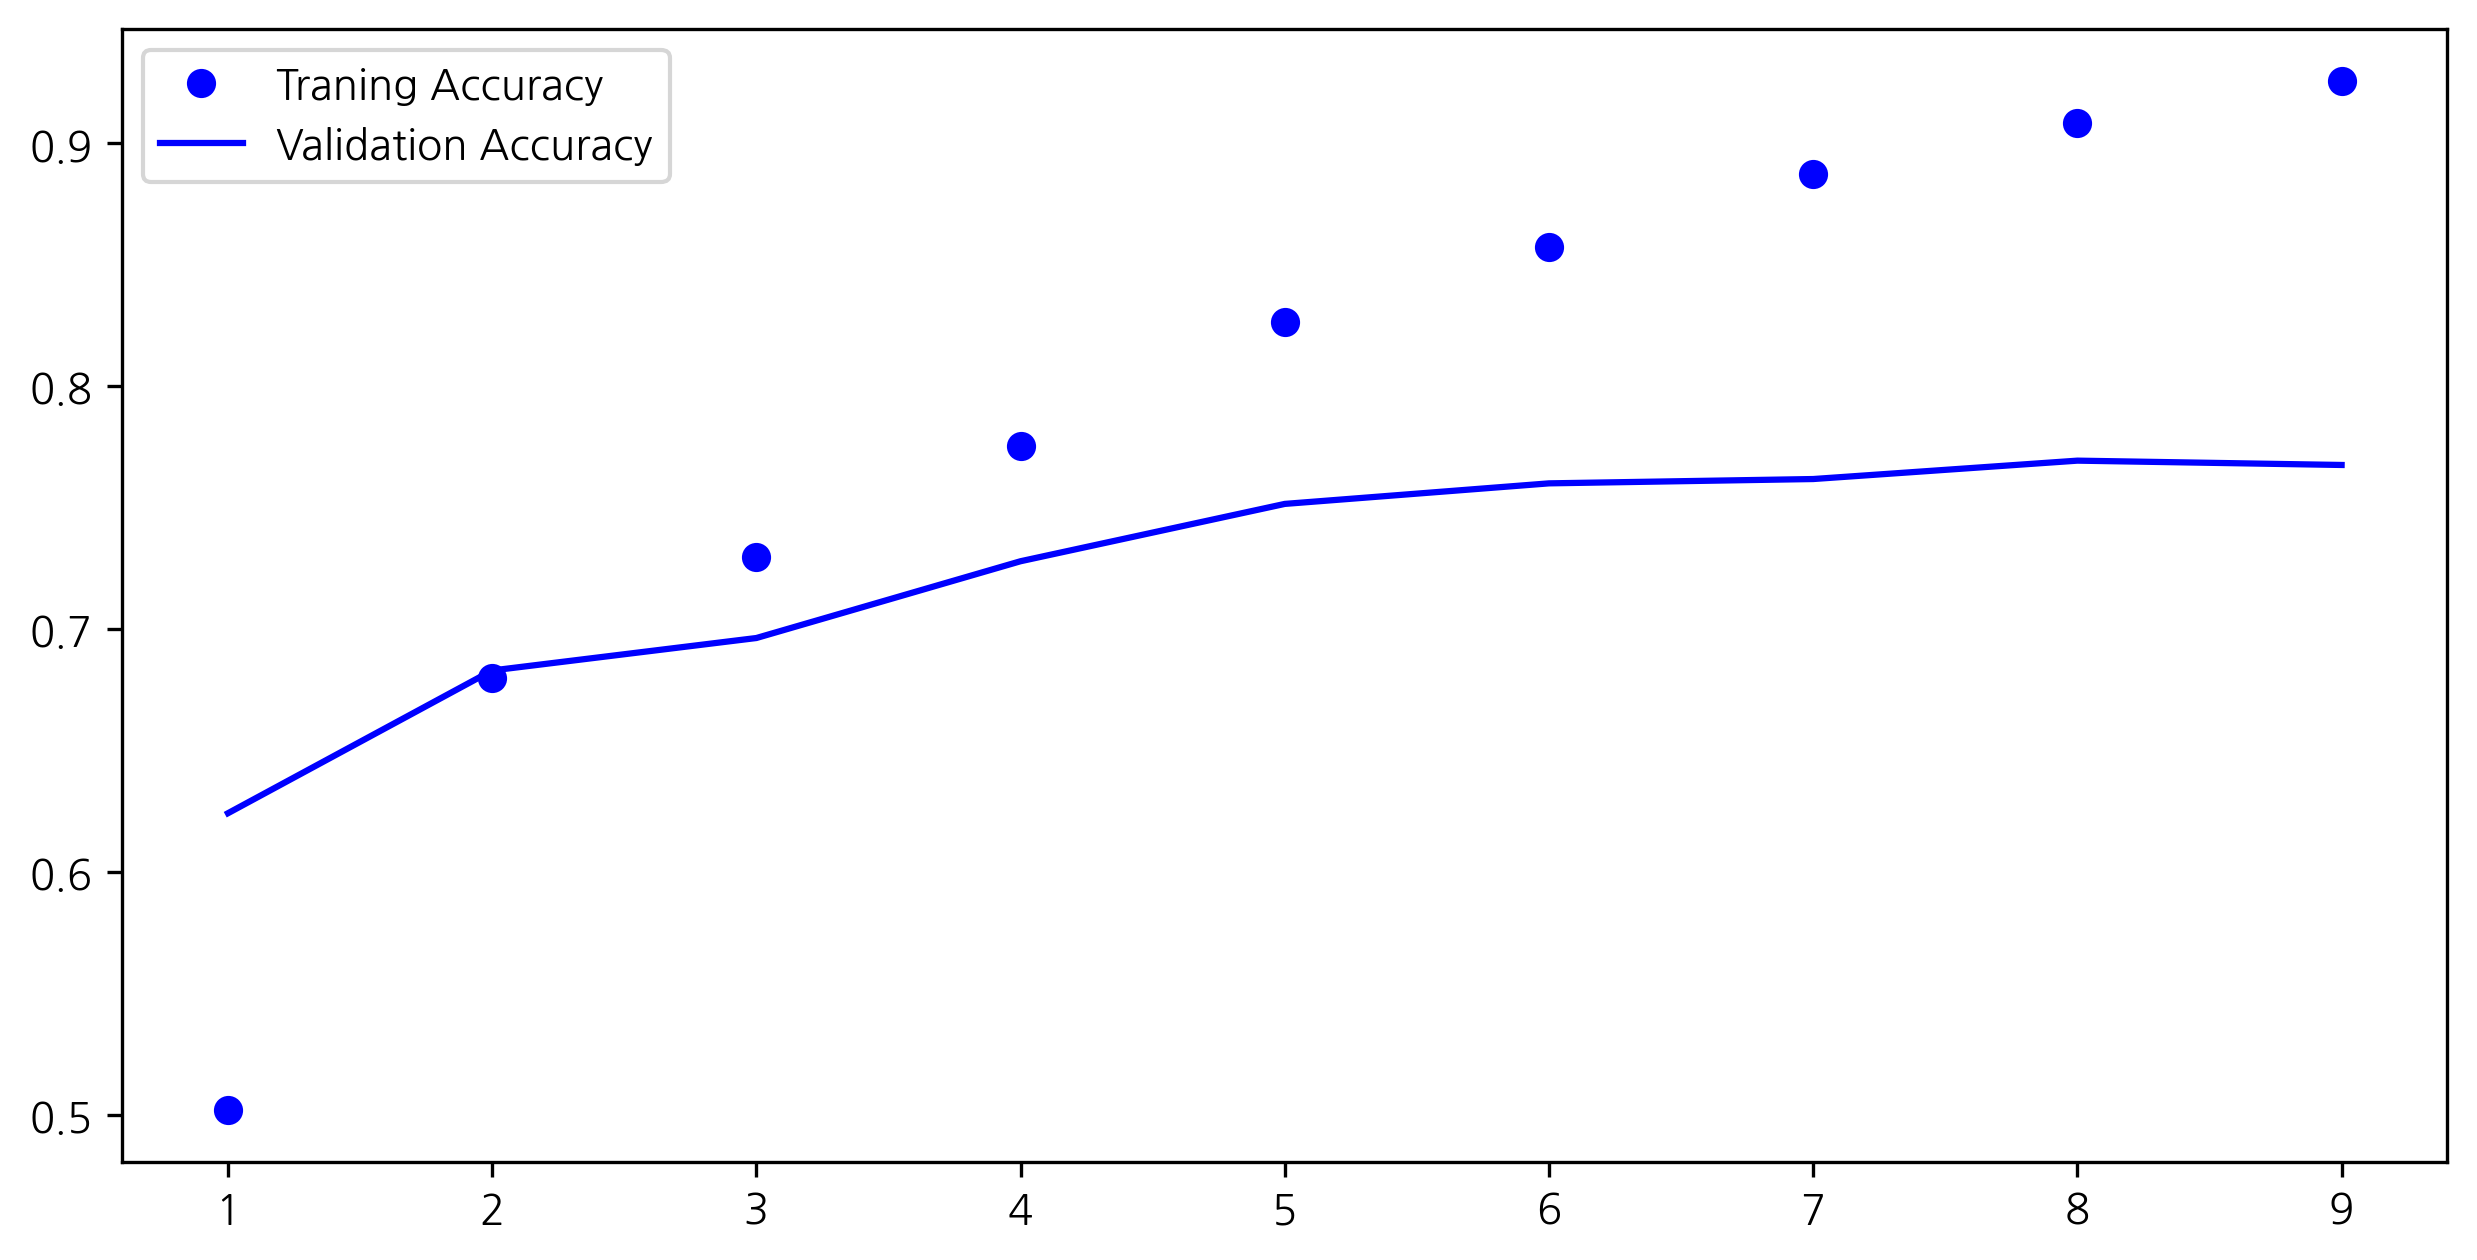

In [245]:
training_model(64, 3)

Epoch 1/9


2022-01-23 18:03:33.870738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 2s 43ms/step - loss: 2.4972 - accuracy: 0.4575 - val_loss: 1.6938 - val_accuracy: 0.6180


2022-01-23 18:03:35.174372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/9
18/18 [==============================] - 0s 21ms/step - loss: 1.4962 - accuracy: 0.6525 - val_loss: 1.4508 - val_accuracy: 0.6585
Epoch 3/9
18/18 [==============================] - 0s 19ms/step - loss: 1.2172 - accuracy: 0.6995 - val_loss: 1.3334 - val_accuracy: 0.6817
Epoch 4/9
18/18 [==============================] - 0s 19ms/step - loss: 1.0027 - accuracy: 0.7518 - val_loss: 1.3834 - val_accuracy: 0.6585
Epoch 5/9
18/18 [==============================] - 0s 19ms/step - loss: 0.8349 - accuracy: 0.7950 - val_loss: 1.2945 - val_accuracy: 0.6999
Epoch 6/9
18/18 [==============================] - 0s 17ms/step - loss: 0.7041 - accuracy: 0.8269 - val_loss: 1.2096 - val_accuracy: 0.7320
Epoch 7/9
18/18 [==============================] - 0s 18ms/step - loss: 0.5670 - accuracy: 0.8608 - val_loss: 1.2360 - val_accuracy: 0.7435
Epoch 8/9
18/18 [==============================] - 0s 18ms/step - loss: 0.4768 - accuracy: 0.8849 - val_loss: 1.3165 - val_accuracy: 0.7391
Epoch 9/9
18/18 [===

<Figure size 2400x1500 with 0 Axes>

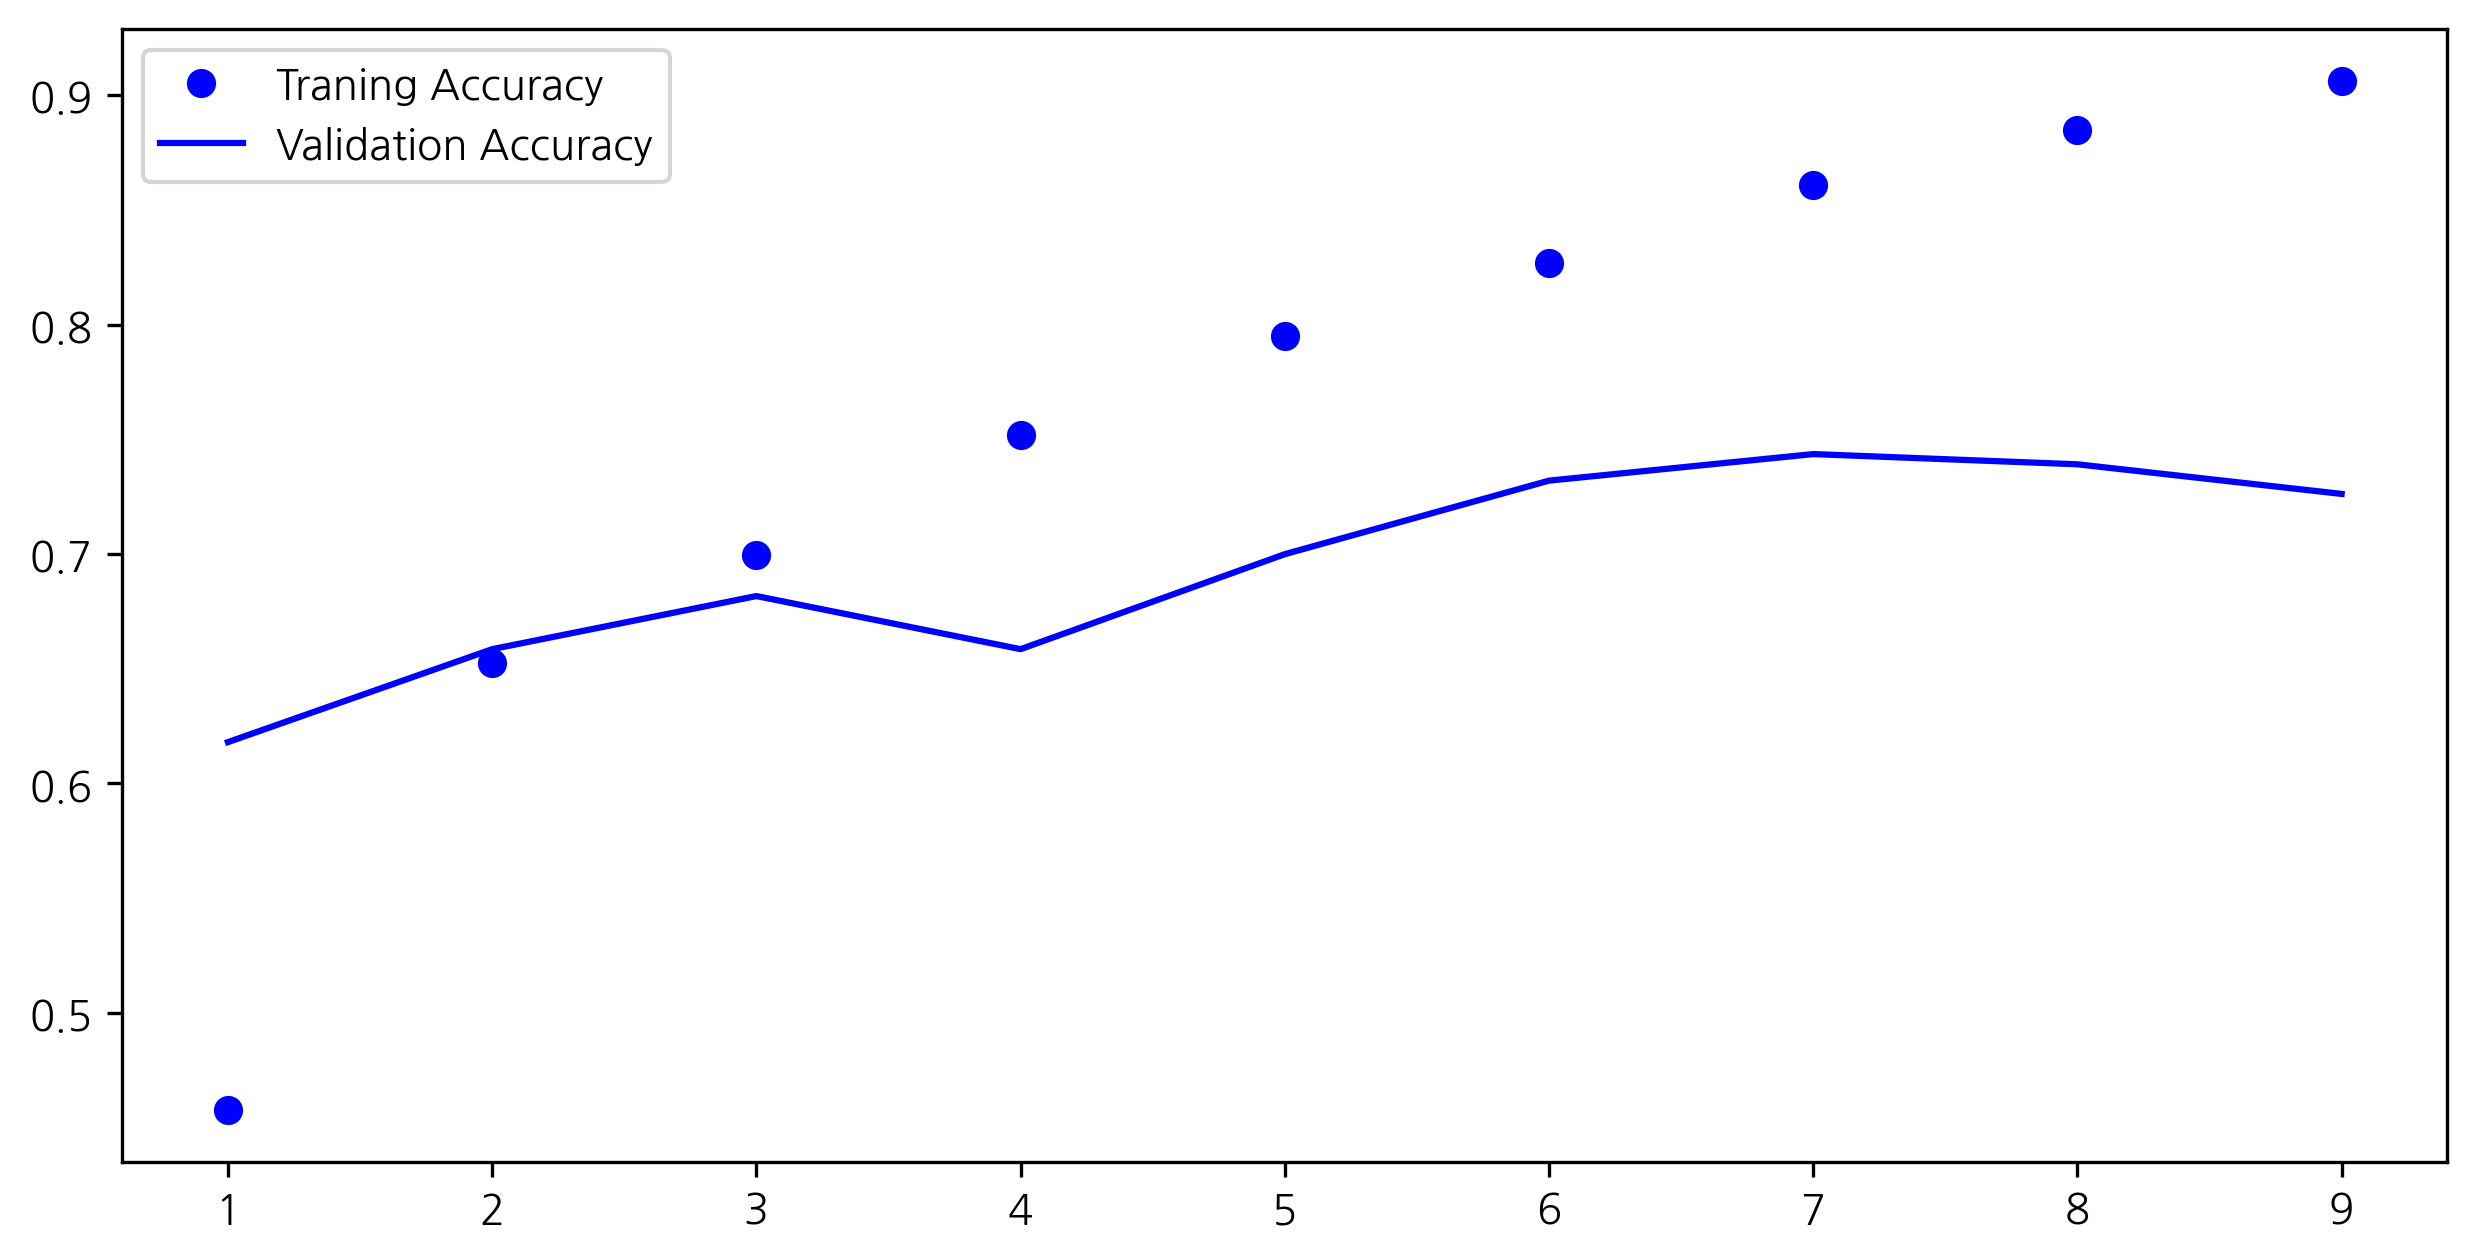

In [246]:
training_model(64, 4)

Epoch 1/9


2022-01-23 18:03:42.507577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 2s 44ms/step - loss: 2.5240 - accuracy: 0.4066 - val_loss: 1.7527 - val_accuracy: 0.5699


2022-01-23 18:03:43.873355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/9
18/18 [==============================] - 0s 19ms/step - loss: 1.5452 - accuracy: 0.6217 - val_loss: 1.4701 - val_accuracy: 0.6554
Epoch 3/9
18/18 [==============================] - 0s 19ms/step - loss: 1.2516 - accuracy: 0.6932 - val_loss: 1.4020 - val_accuracy: 0.6567
Epoch 4/9
18/18 [==============================] - 0s 19ms/step - loss: 1.0947 - accuracy: 0.7228 - val_loss: 1.3356 - val_accuracy: 0.6879
Epoch 5/9
18/18 [==============================] - 0s 17ms/step - loss: 0.9121 - accuracy: 0.7652 - val_loss: 1.4044 - val_accuracy: 0.6839
Epoch 6/9
18/18 [==============================] - 0s 18ms/step - loss: 0.8003 - accuracy: 0.7884 - val_loss: 1.2629 - val_accuracy: 0.7159
Epoch 7/9
18/18 [==============================] - 0s 19ms/step - loss: 0.7020 - accuracy: 0.8091 - val_loss: 1.2775 - val_accuracy: 0.7262
Epoch 8/9
18/18 [==============================] - 0s 18ms/step - loss: 0.5581 - accuracy: 0.8530 - val_loss: 1.4209 - val_accuracy: 0.7231
Epoch 9/9
18/18 [===

<Figure size 2400x1500 with 0 Axes>

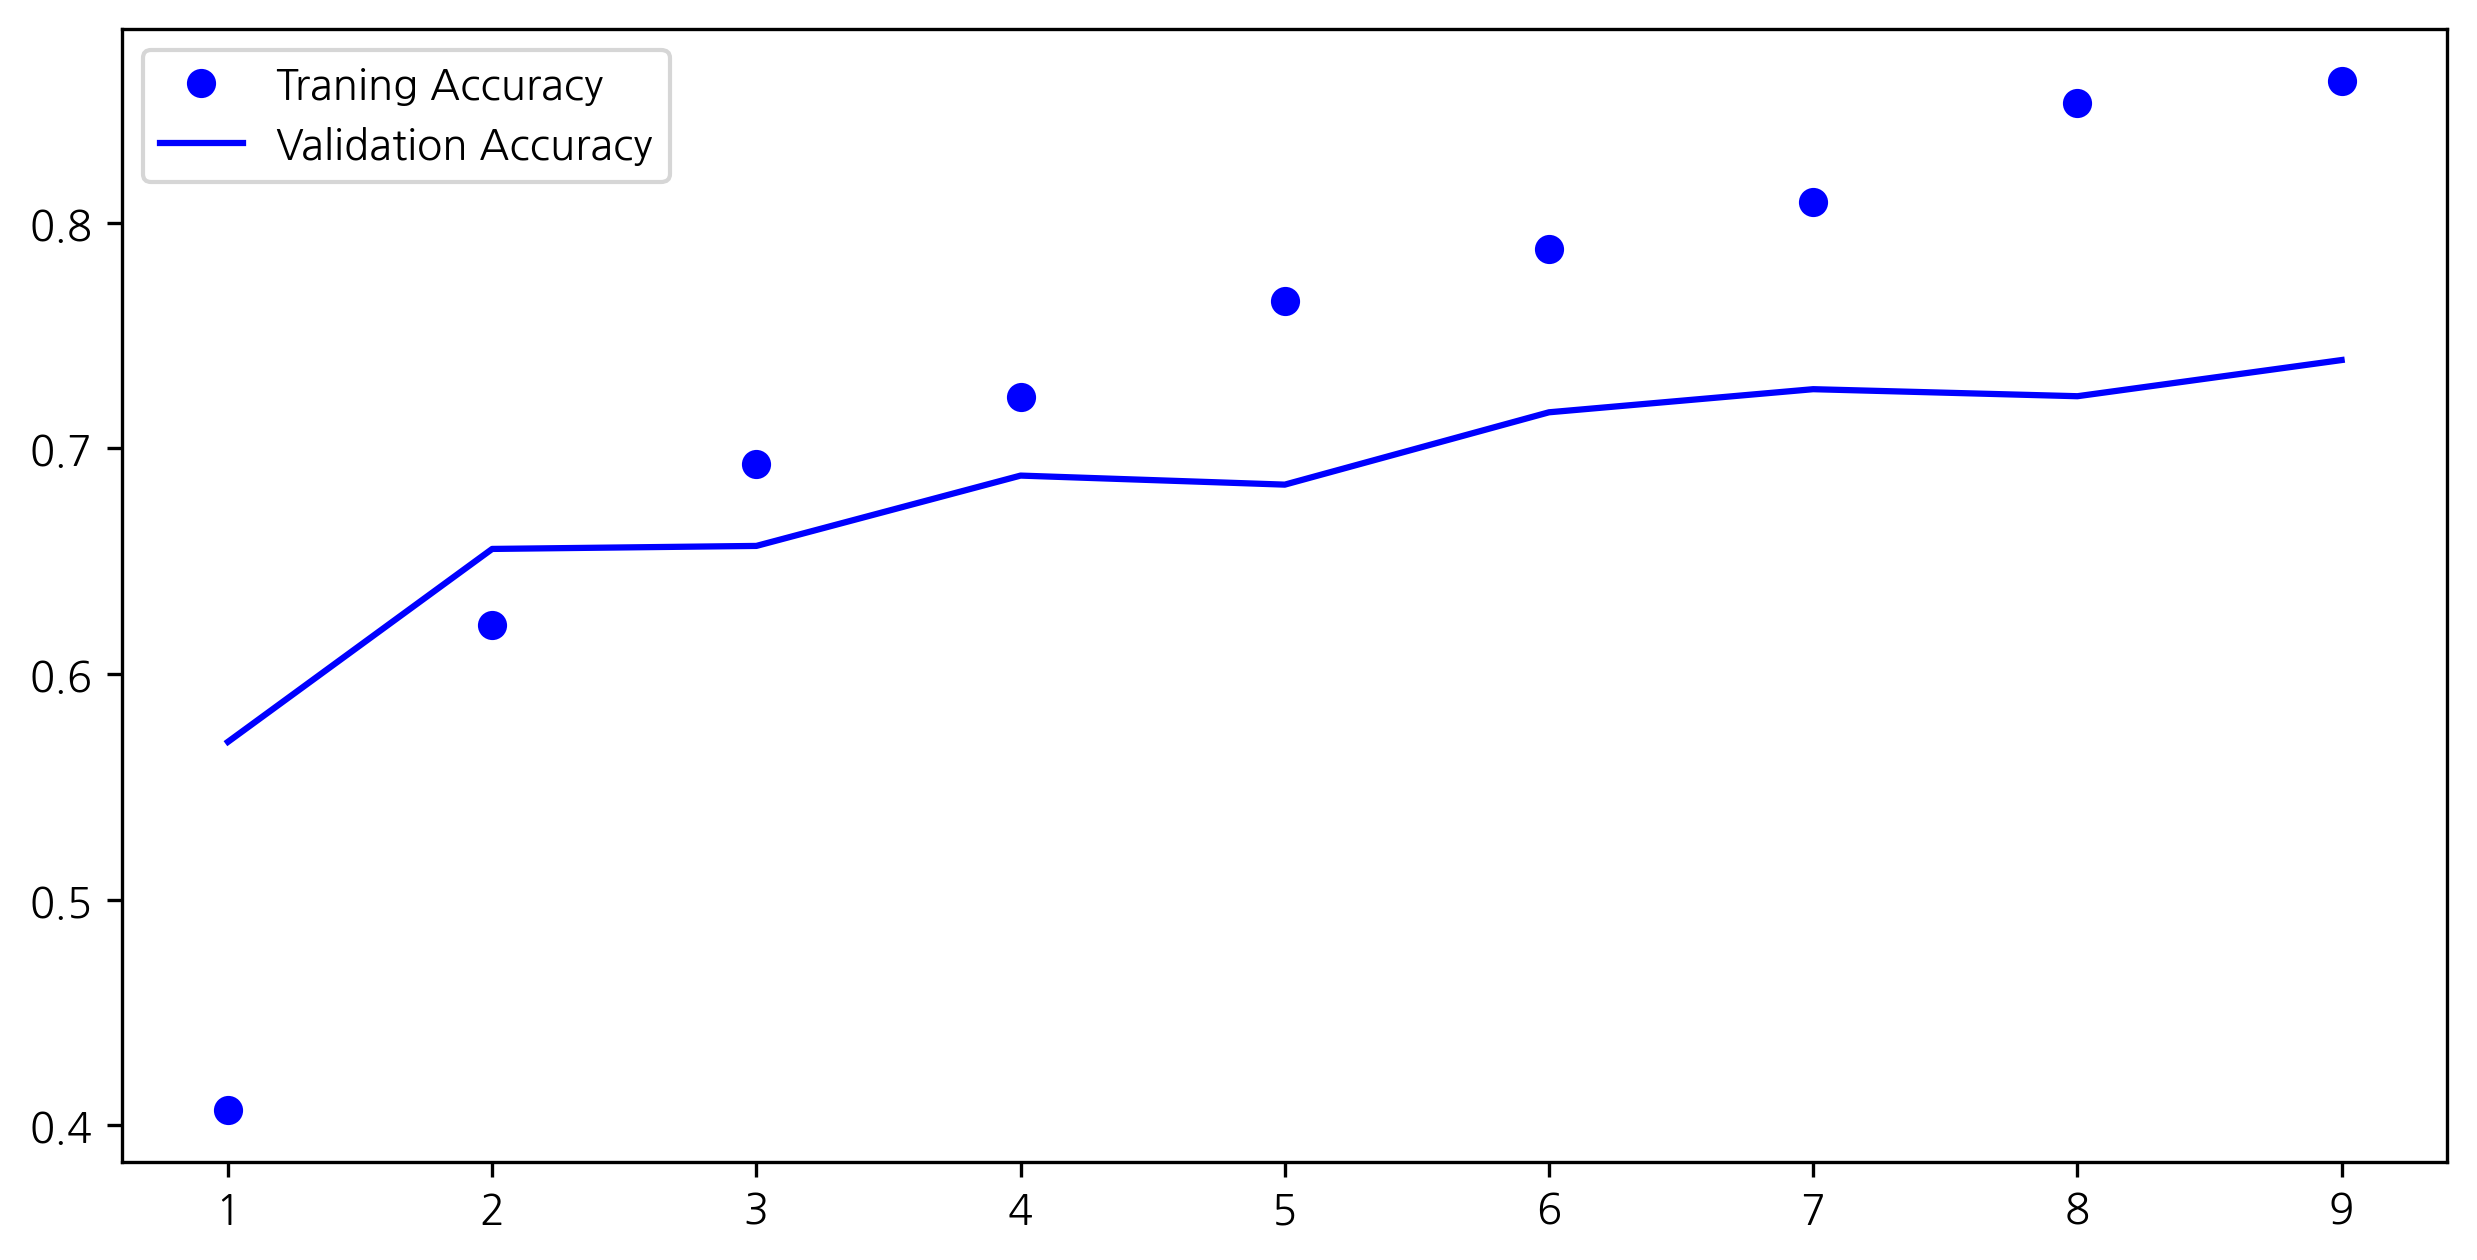

In [247]:
training_model(64, 5)

# 은닉 층 3개 이상 추가할 때 부터 대체로 검증 정확도가 
## 은닉 층 1개~2개일 때 보다 낮게 나왔다. 

Epoch 1/9


2022-01-23 18:10:47.434845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 36ms/step - loss: 2.4293 - accuracy: 0.5599 - val_loss: 1.6341 - val_accuracy: 0.6572
Epoch 2/9
 1/18 [>.............................] - ETA: 0s - loss: 1.4882 - accuracy: 0.7051

2022-01-23 18:10:48.303207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 19ms/step - loss: 1.3099 - accuracy: 0.7204 - val_loss: 1.2715 - val_accuracy: 0.7208
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 0.9638 - accuracy: 0.7954 - val_loss: 1.1286 - val_accuracy: 0.7538
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7555 - accuracy: 0.8369 - val_loss: 1.0442 - val_accuracy: 0.7694
Epoch 5/9
18/18 [==============================] - 0s 17ms/step - loss: 0.5916 - accuracy: 0.8761 - val_loss: 1.0261 - val_accuracy: 0.7640
Epoch 6/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4775 - accuracy: 0.8974 - val_loss: 0.9649 - val_accuracy: 0.7827
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.3845 - accuracy: 0.9183 - val_loss: 0.9430 - val_accuracy: 0.7988
Epoch 8/9
18/18 [==============================] - 0s 15ms/step - loss: 0.3146 - accuracy: 0.9322 - val_loss: 1.0240 - val_accuracy: 0.7792
Epoch 9/9
18/18 [=============

<Figure size 2400x1500 with 0 Axes>

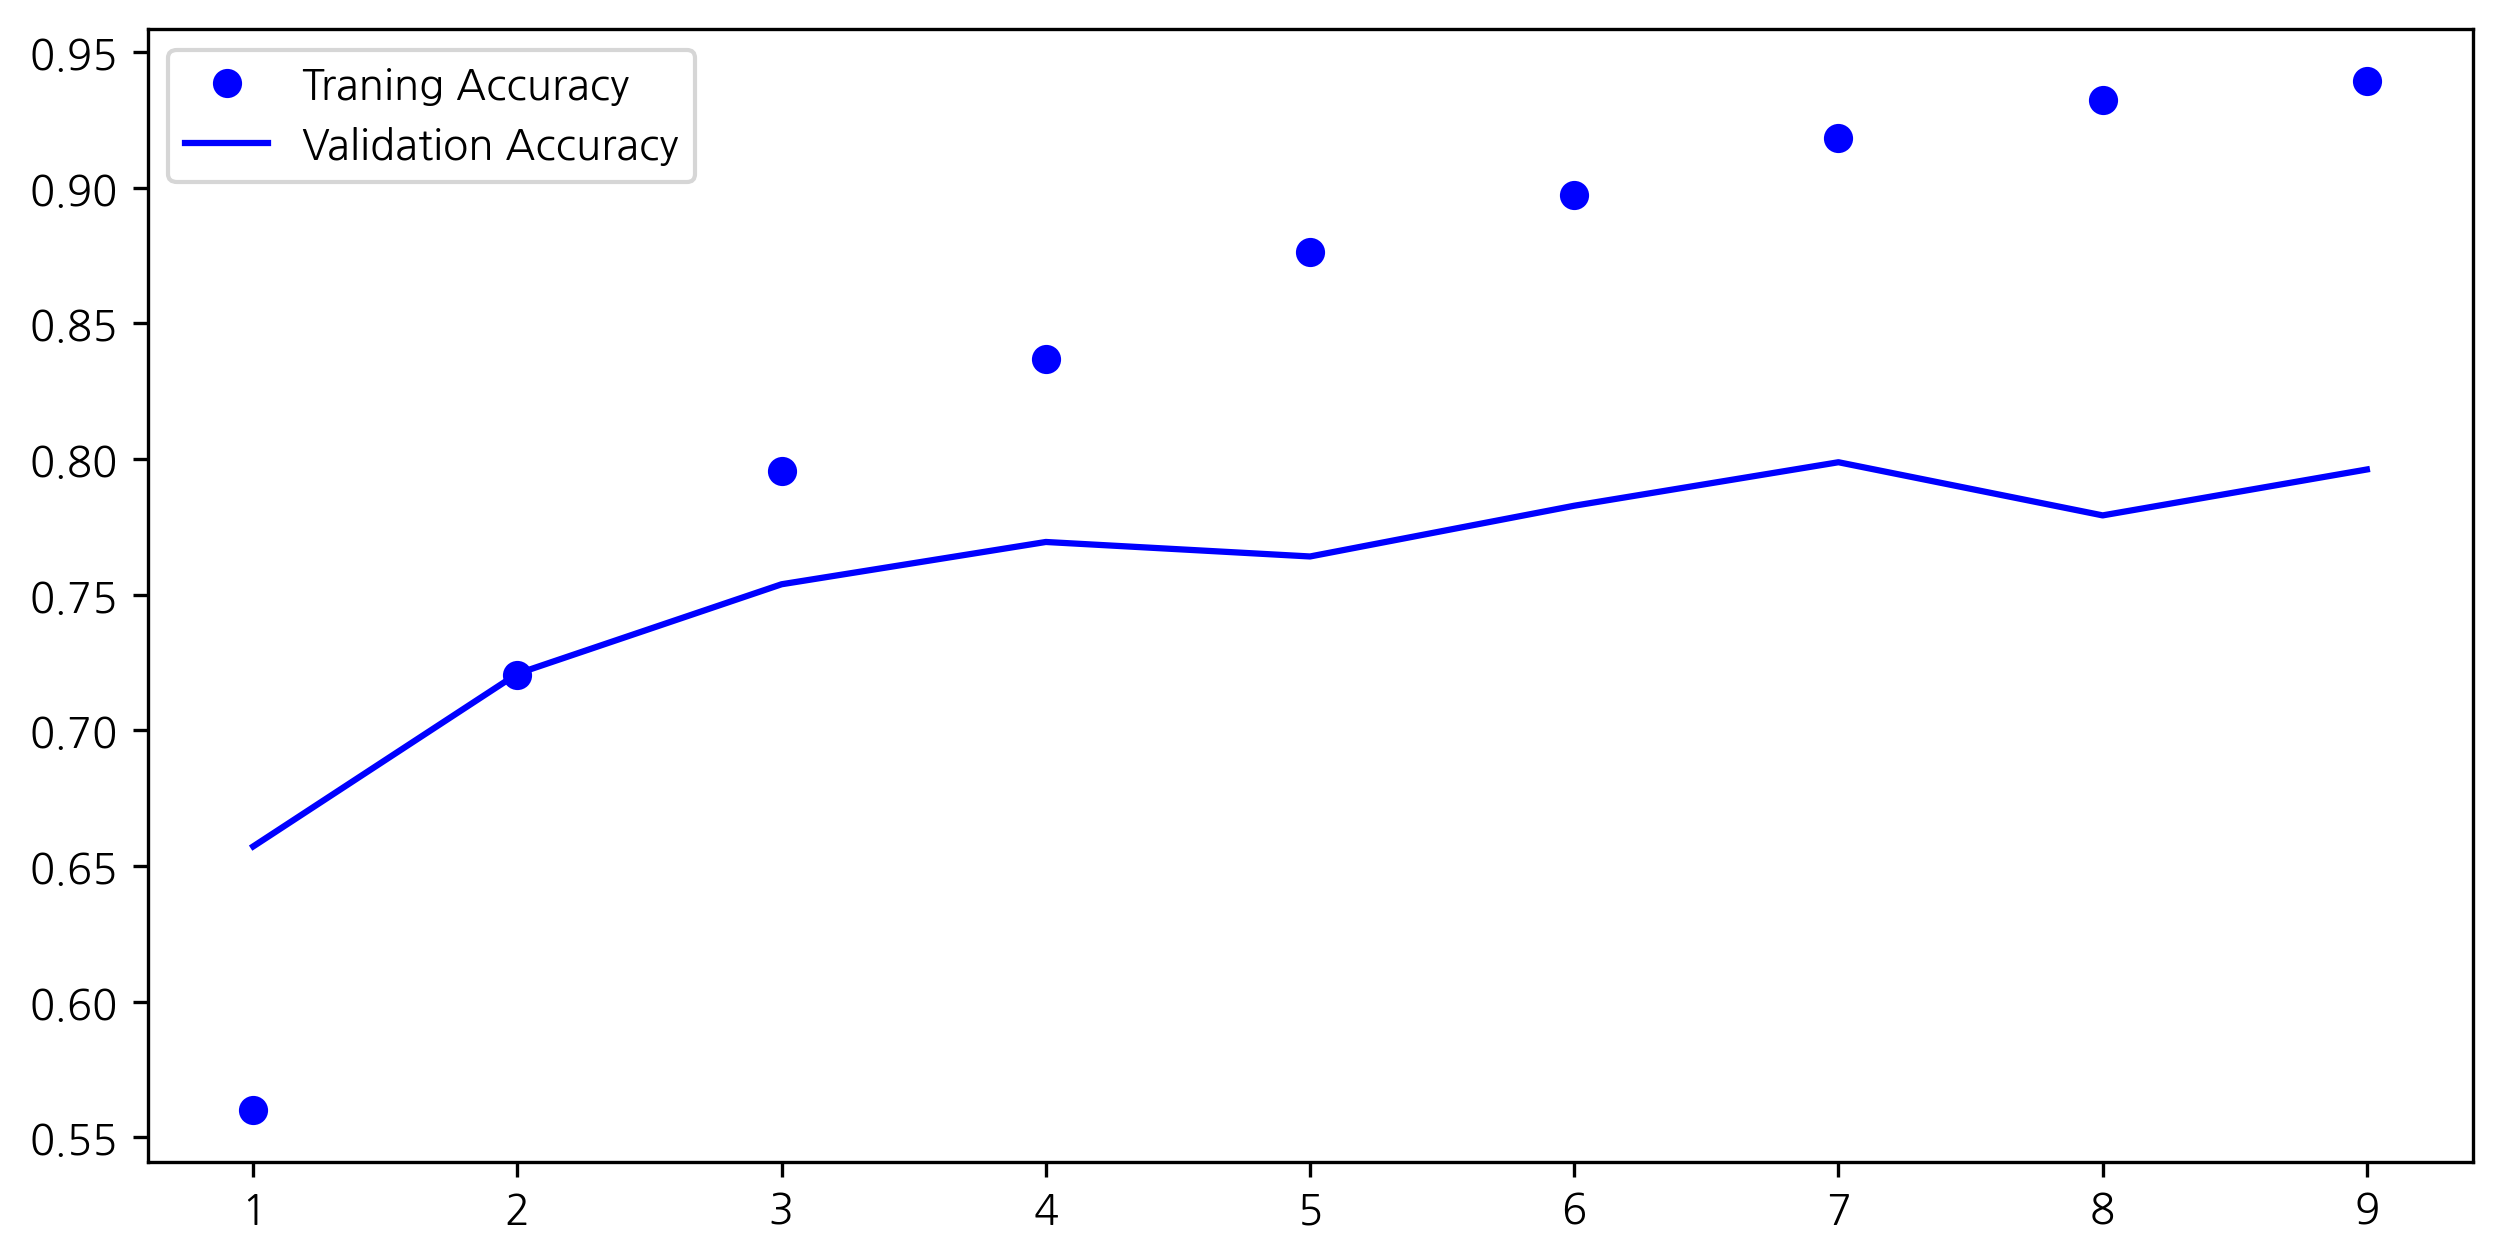

In [262]:
training_model(64, 1)

Epoch 1/9


2022-01-23 18:11:06.794464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 38ms/step - loss: 2.1513 - accuracy: 0.5202 - val_loss: 1.4764 - val_accuracy: 0.6701
Epoch 2/9
 1/18 [>.............................] - ETA: 0s - loss: 1.4126 - accuracy: 0.6953

2022-01-23 18:11:07.731725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 19ms/step - loss: 1.2115 - accuracy: 0.7239 - val_loss: 1.2362 - val_accuracy: 0.7253
Epoch 3/9
18/18 [==============================] - 0s 16ms/step - loss: 0.9131 - accuracy: 0.7967 - val_loss: 1.1805 - val_accuracy: 0.7142
Epoch 4/9
18/18 [==============================] - 0s 17ms/step - loss: 0.6899 - accuracy: 0.8422 - val_loss: 0.9986 - val_accuracy: 0.7725
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.5185 - accuracy: 0.8813 - val_loss: 0.9479 - val_accuracy: 0.7823
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.3905 - accuracy: 0.9114 - val_loss: 0.9825 - val_accuracy: 0.7809
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.2989 - accuracy: 0.9308 - val_loss: 1.0007 - val_accuracy: 0.7934
Epoch 8/9
18/18 [==============================] - 0s 19ms/step - loss: 0.2398 - accuracy: 0.9419 - val_loss: 1.0325 - val_accuracy: 0.7841
Epoch 9/9
18/18 [=============

<Figure size 2400x1500 with 0 Axes>

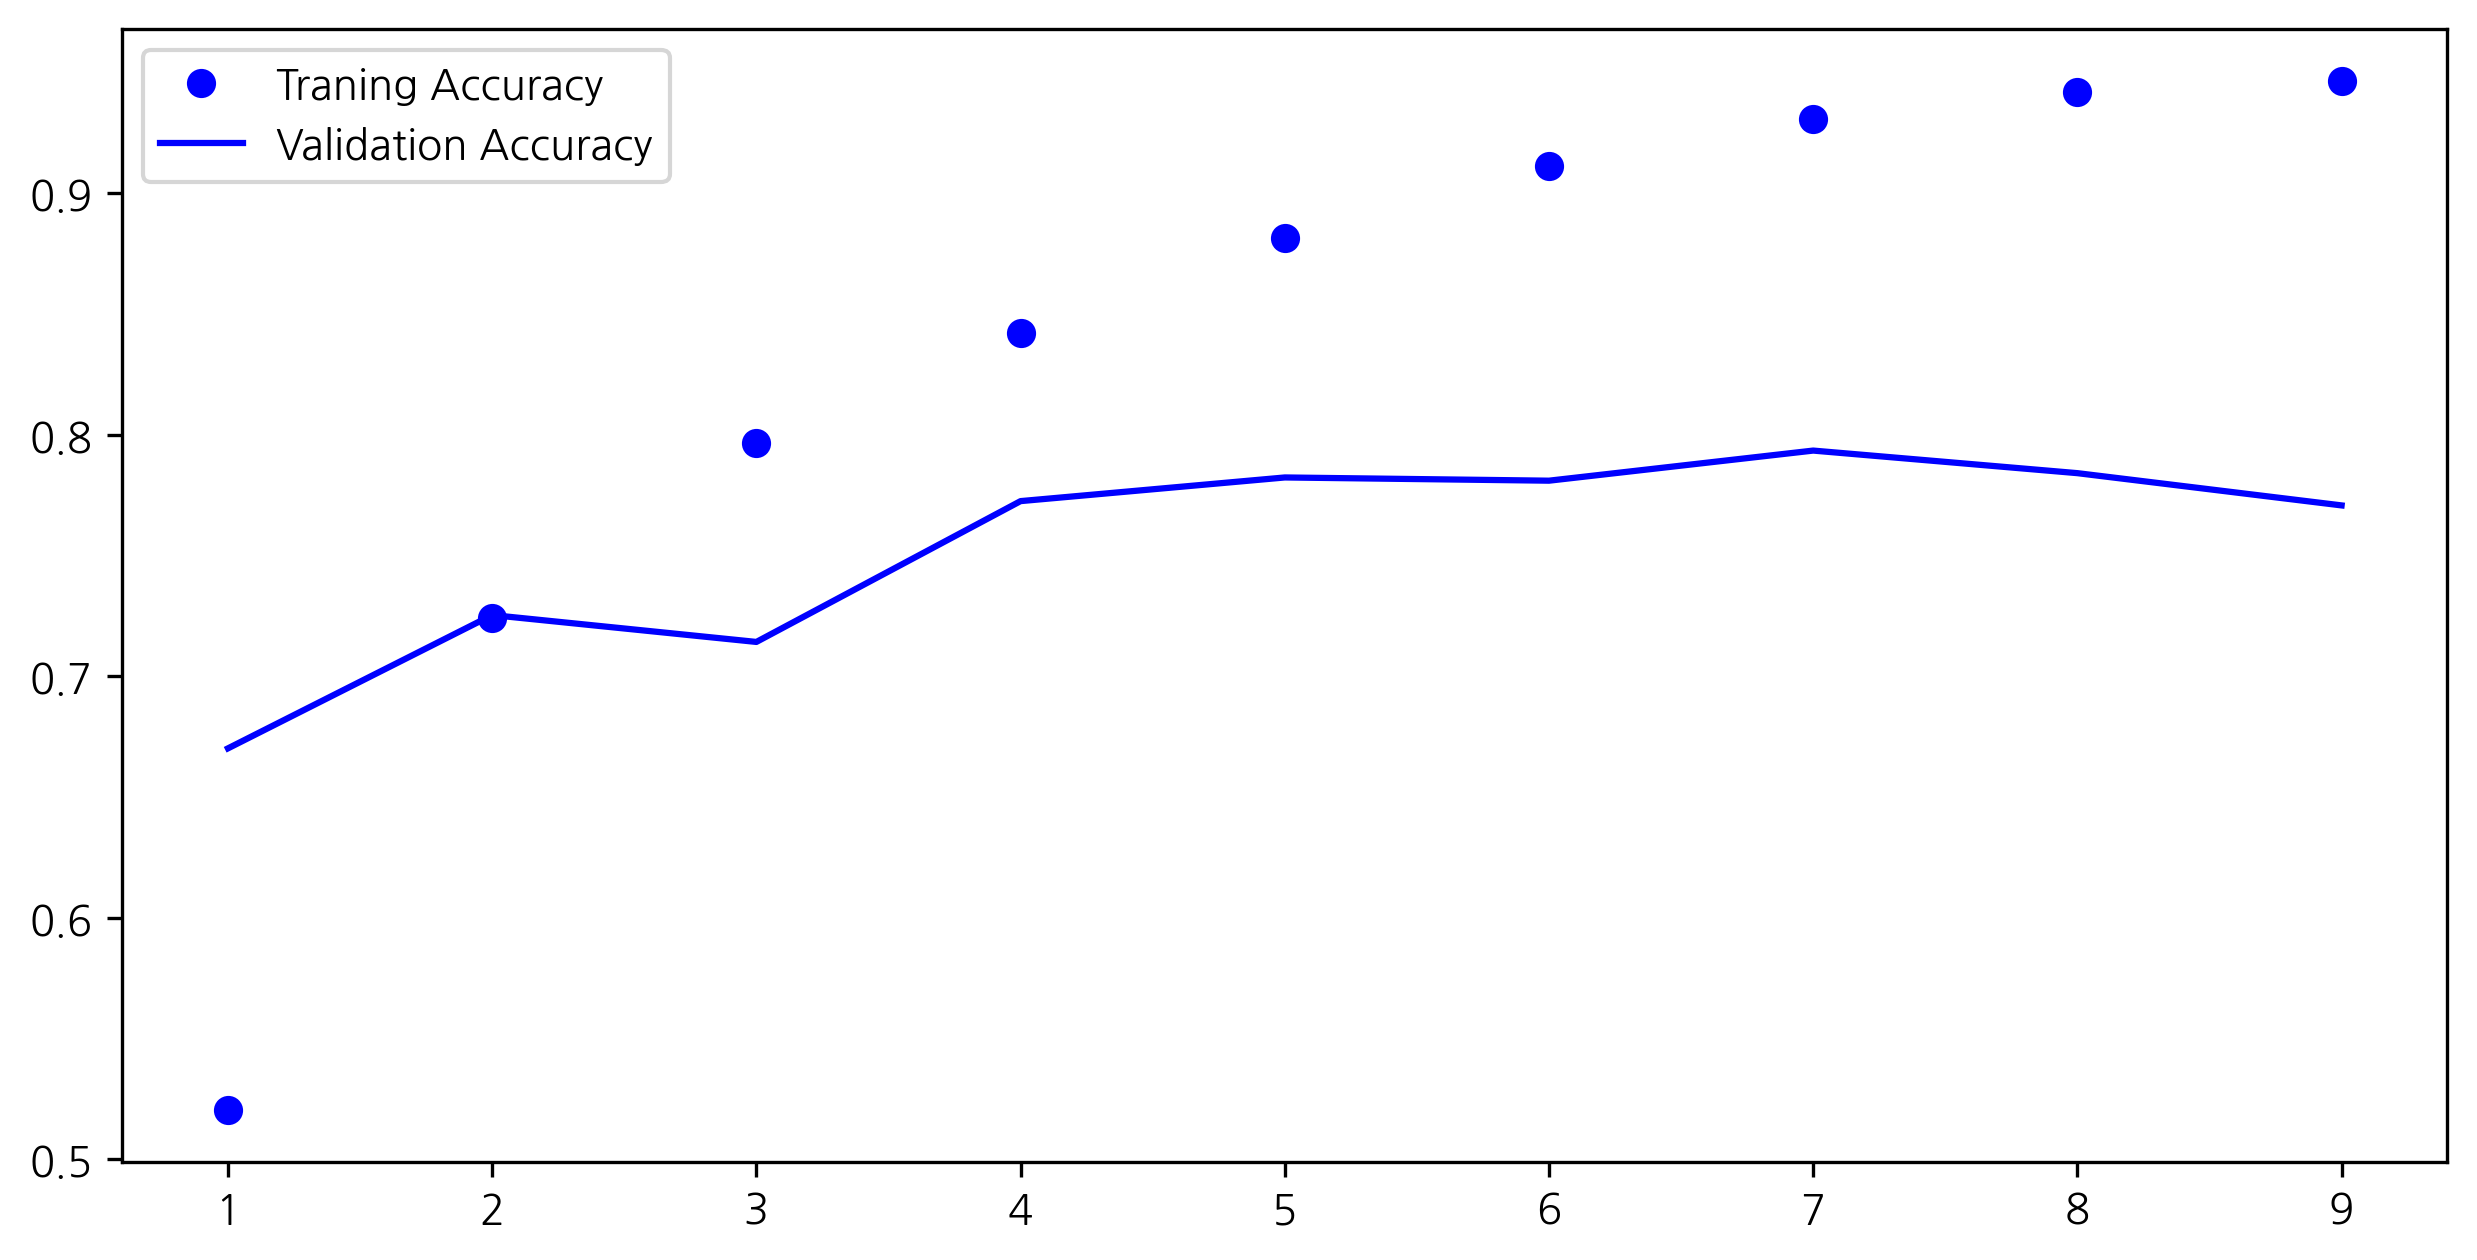

In [264]:
training_model(512,1)

Epoch 1/9


2022-01-23 18:10:56.670027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 38ms/step - loss: 2.3470 - accuracy: 0.5335 - val_loss: 1.5475 - val_accuracy: 0.6683
Epoch 2/9
 1/18 [>.............................] - ETA: 0s - loss: 1.3407 - accuracy: 0.7129

2022-01-23 18:10:57.593559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 17ms/step - loss: 1.2695 - accuracy: 0.7210 - val_loss: 1.2579 - val_accuracy: 0.7088
Epoch 3/9
18/18 [==============================] - 0s 17ms/step - loss: 0.9523 - accuracy: 0.7902 - val_loss: 1.1096 - val_accuracy: 0.7569
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7272 - accuracy: 0.8389 - val_loss: 1.0141 - val_accuracy: 0.7747
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5672 - accuracy: 0.8819 - val_loss: 0.9477 - val_accuracy: 0.7832
Epoch 6/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4340 - accuracy: 0.9090 - val_loss: 0.9242 - val_accuracy: 0.7930
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.3465 - accuracy: 0.9270 - val_loss: 0.9394 - val_accuracy: 0.7947
Epoch 8/9
18/18 [==============================] - 0s 16ms/step - loss: 0.2795 - accuracy: 0.9398 - val_loss: 0.9280 - val_accuracy: 0.8032
Epoch 9/9
18/18 [=============

<Figure size 2400x1500 with 0 Axes>

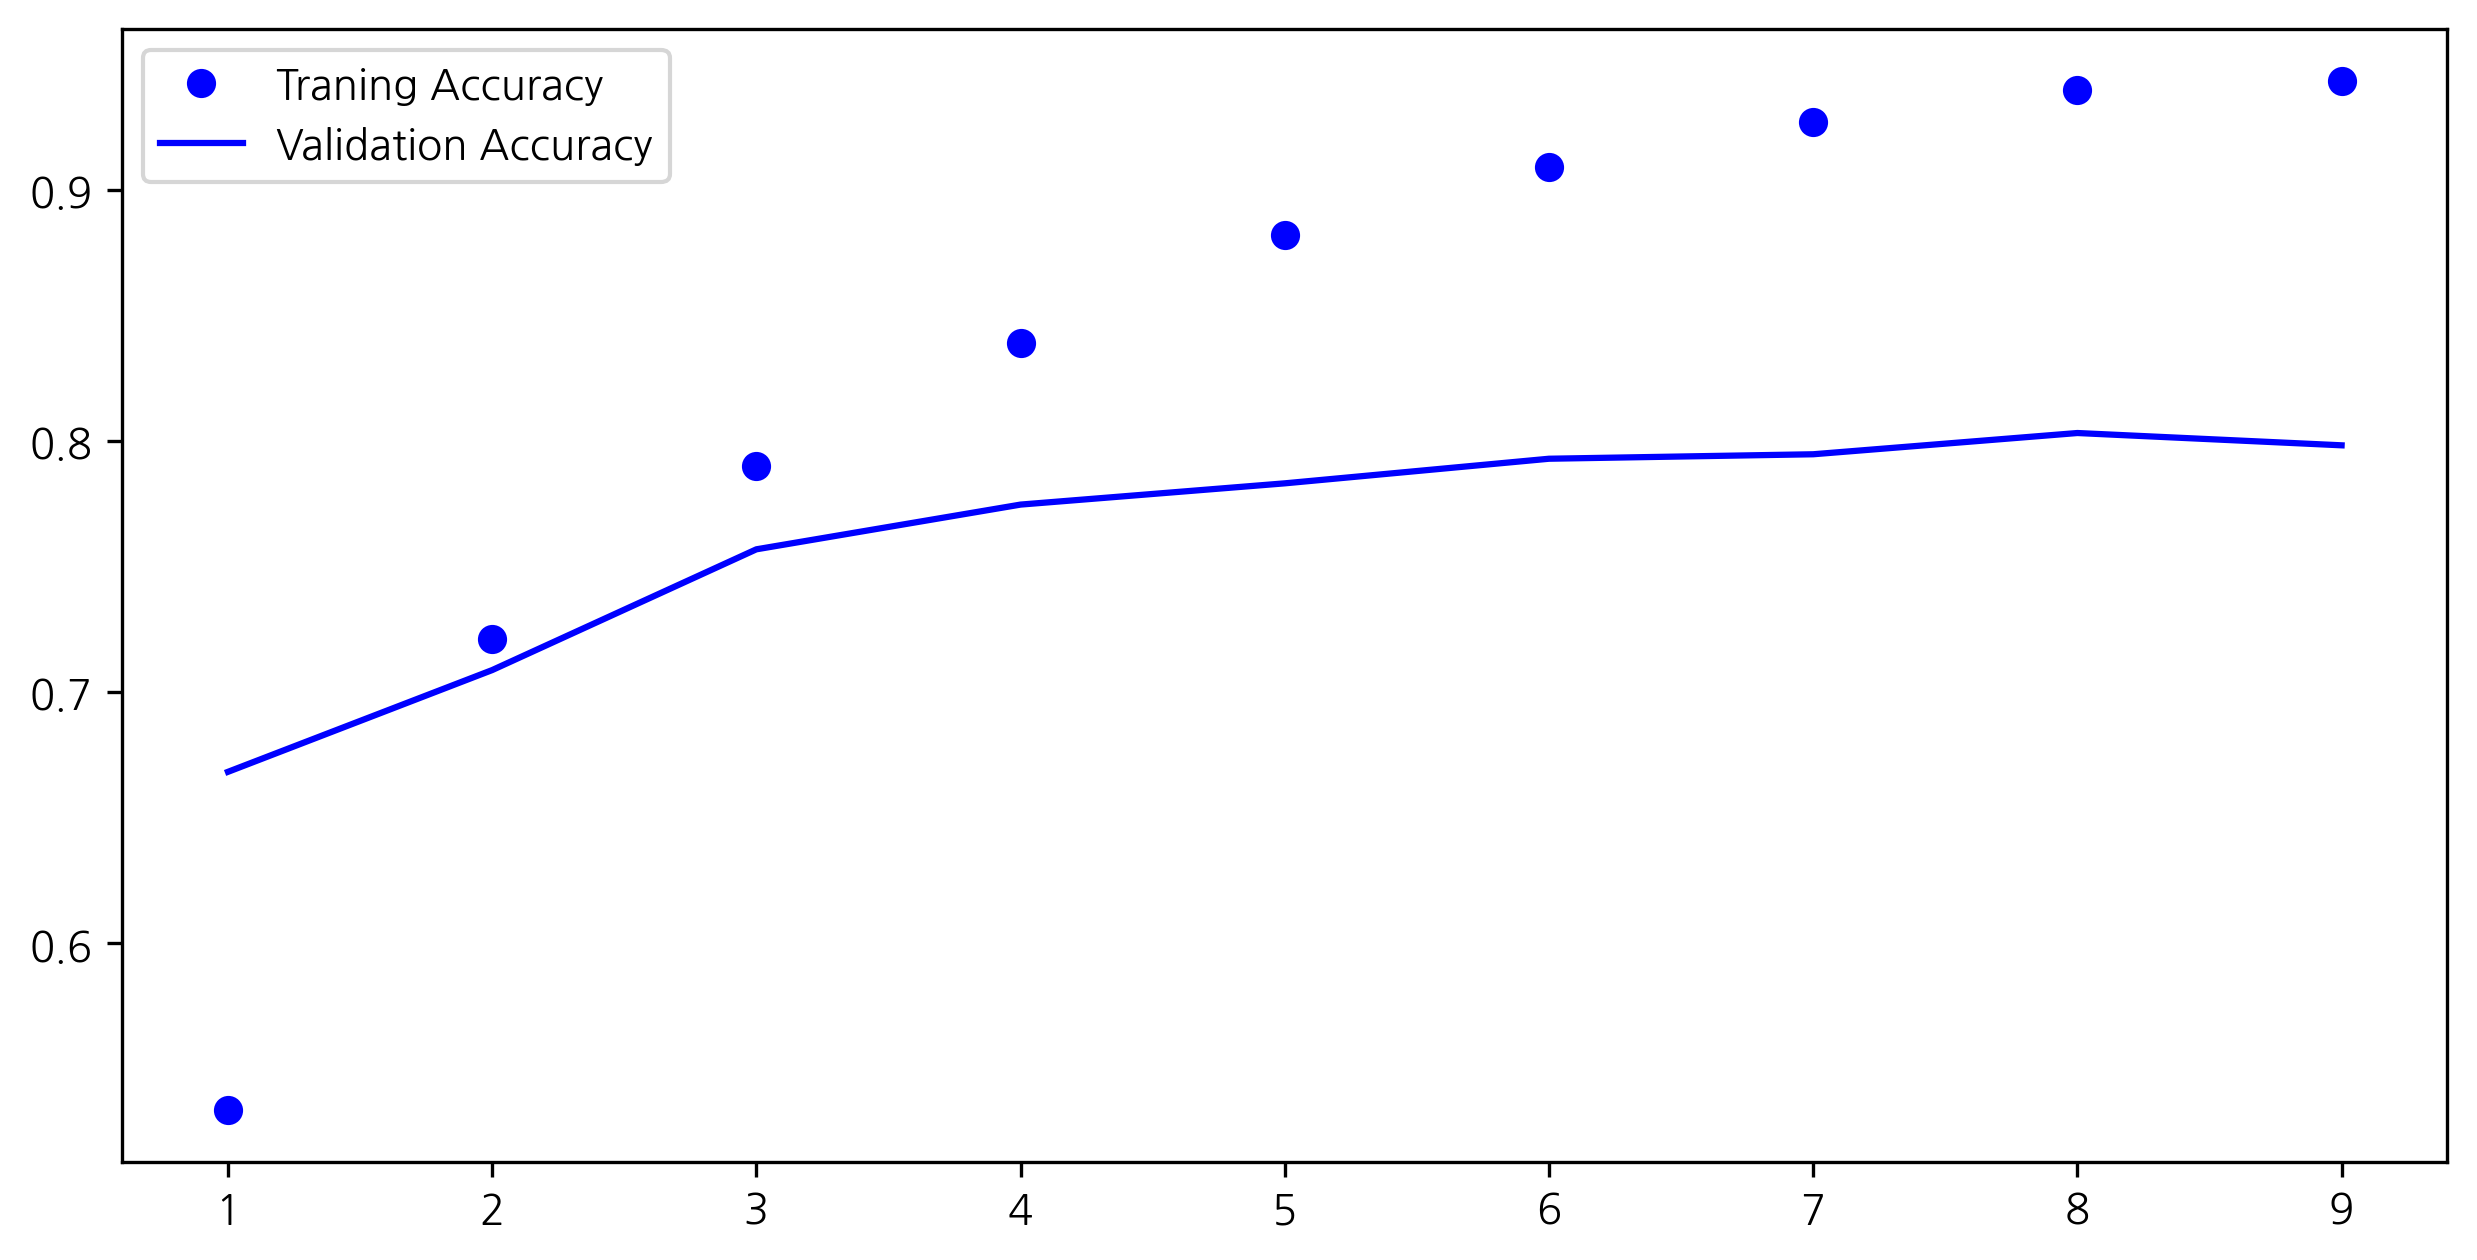

In [263]:
training_model(128,1)

## 처음예상: 은닉유닛 수를 46차원보다 너무 크게 올리면(128, 512) 처음 (10000,1) 벡터가 차원축소하면서 너무 많은 노이즈가 벡터에 남게 될 것이다. 
## 노이즈가 많이 남아도 제대로 분류하기 어려울 것이다. 
## --> 은닉유닛 수를 너무 크게 올려도 제대로 분류가 안 될 것이다. 
### 결과: 은닉유닛 수 128, 512 일 때 대체로 정확도가 64일때 보다 낮게 나왔지만, 항상 그렇지는 않았다. 

## 회귀문제에 신경망 적용하기 

In [267]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


# feature 값들 스케일이 모두 다를 때 
- 표준화 시켜서 스케일 맞춰줘야 한다. 

In [273]:
mean = train_data.mean(axis=0) # axis=0: 행 방향 
train_data -= mean

In [274]:
std = train_data.std(axis=0)
train_data /= std

In [281]:
test_data -= mean 
test_data /=std

In [286]:
# 모델 구성 
def build_model() : 
    # 모델 정의
    model = models.Sequential() 
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # 선형 층  # 기댓값 에측치만 모든 범위에서 내놓을 것이다. 

    # 모델 컴파일
    model.compile(
        optimizer='rmsprop',
        loss = 'mse',
        metrics=['mae']
    )
    return model 

In [295]:
# k겹 교차검증 
import numpy as np 

k = 4
num_val_samples = len(train_data)//k
num_epochs = 100 
all_scores = [] 

for i in range(k) : 
    print(f'처리 중인 폴드: {i}')
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]
    ], axis=0)

    model = build_model() 
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose='0')
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose='0')
    all_scores.append(val_mae)

처리 중인 폴드: 0
Epoch 1/100


2022-01-23 22:27:37.299306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

2022-01-23 22:29:38.811757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


처리 중인 폴드: 1
Epoch 1/100


2022-01-23 22:29:39.330268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

2022-01-23 22:31:34.536548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


처리 중인 폴드: 2
Epoch 1/100


2022-01-23 22:31:34.815897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

2022-01-23 22:33:31.247756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


처리 중인 폴드: 3
Epoch 1/100


2022-01-23 22:33:31.591788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

2022-01-23 22:35:25.226673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [298]:
np.mean(all_scores) # 최종 검증점수 

2.3305585384368896

처리 중인 폴드:0
Epoch 1/500


2022-01-23 23:57:02.850367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-23 23:57:05.558262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78/500
Epoch 7

2022-01-24 00:07:56.778892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-24 00:07:58.299848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78/500
Epoch 7

2022-01-24 00:19:04.207755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-24 00:19:05.821874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78/500
Epoch 7

2022-01-24 09:26:55.985527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-24 09:26:57.811430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78/500
Epoch 7

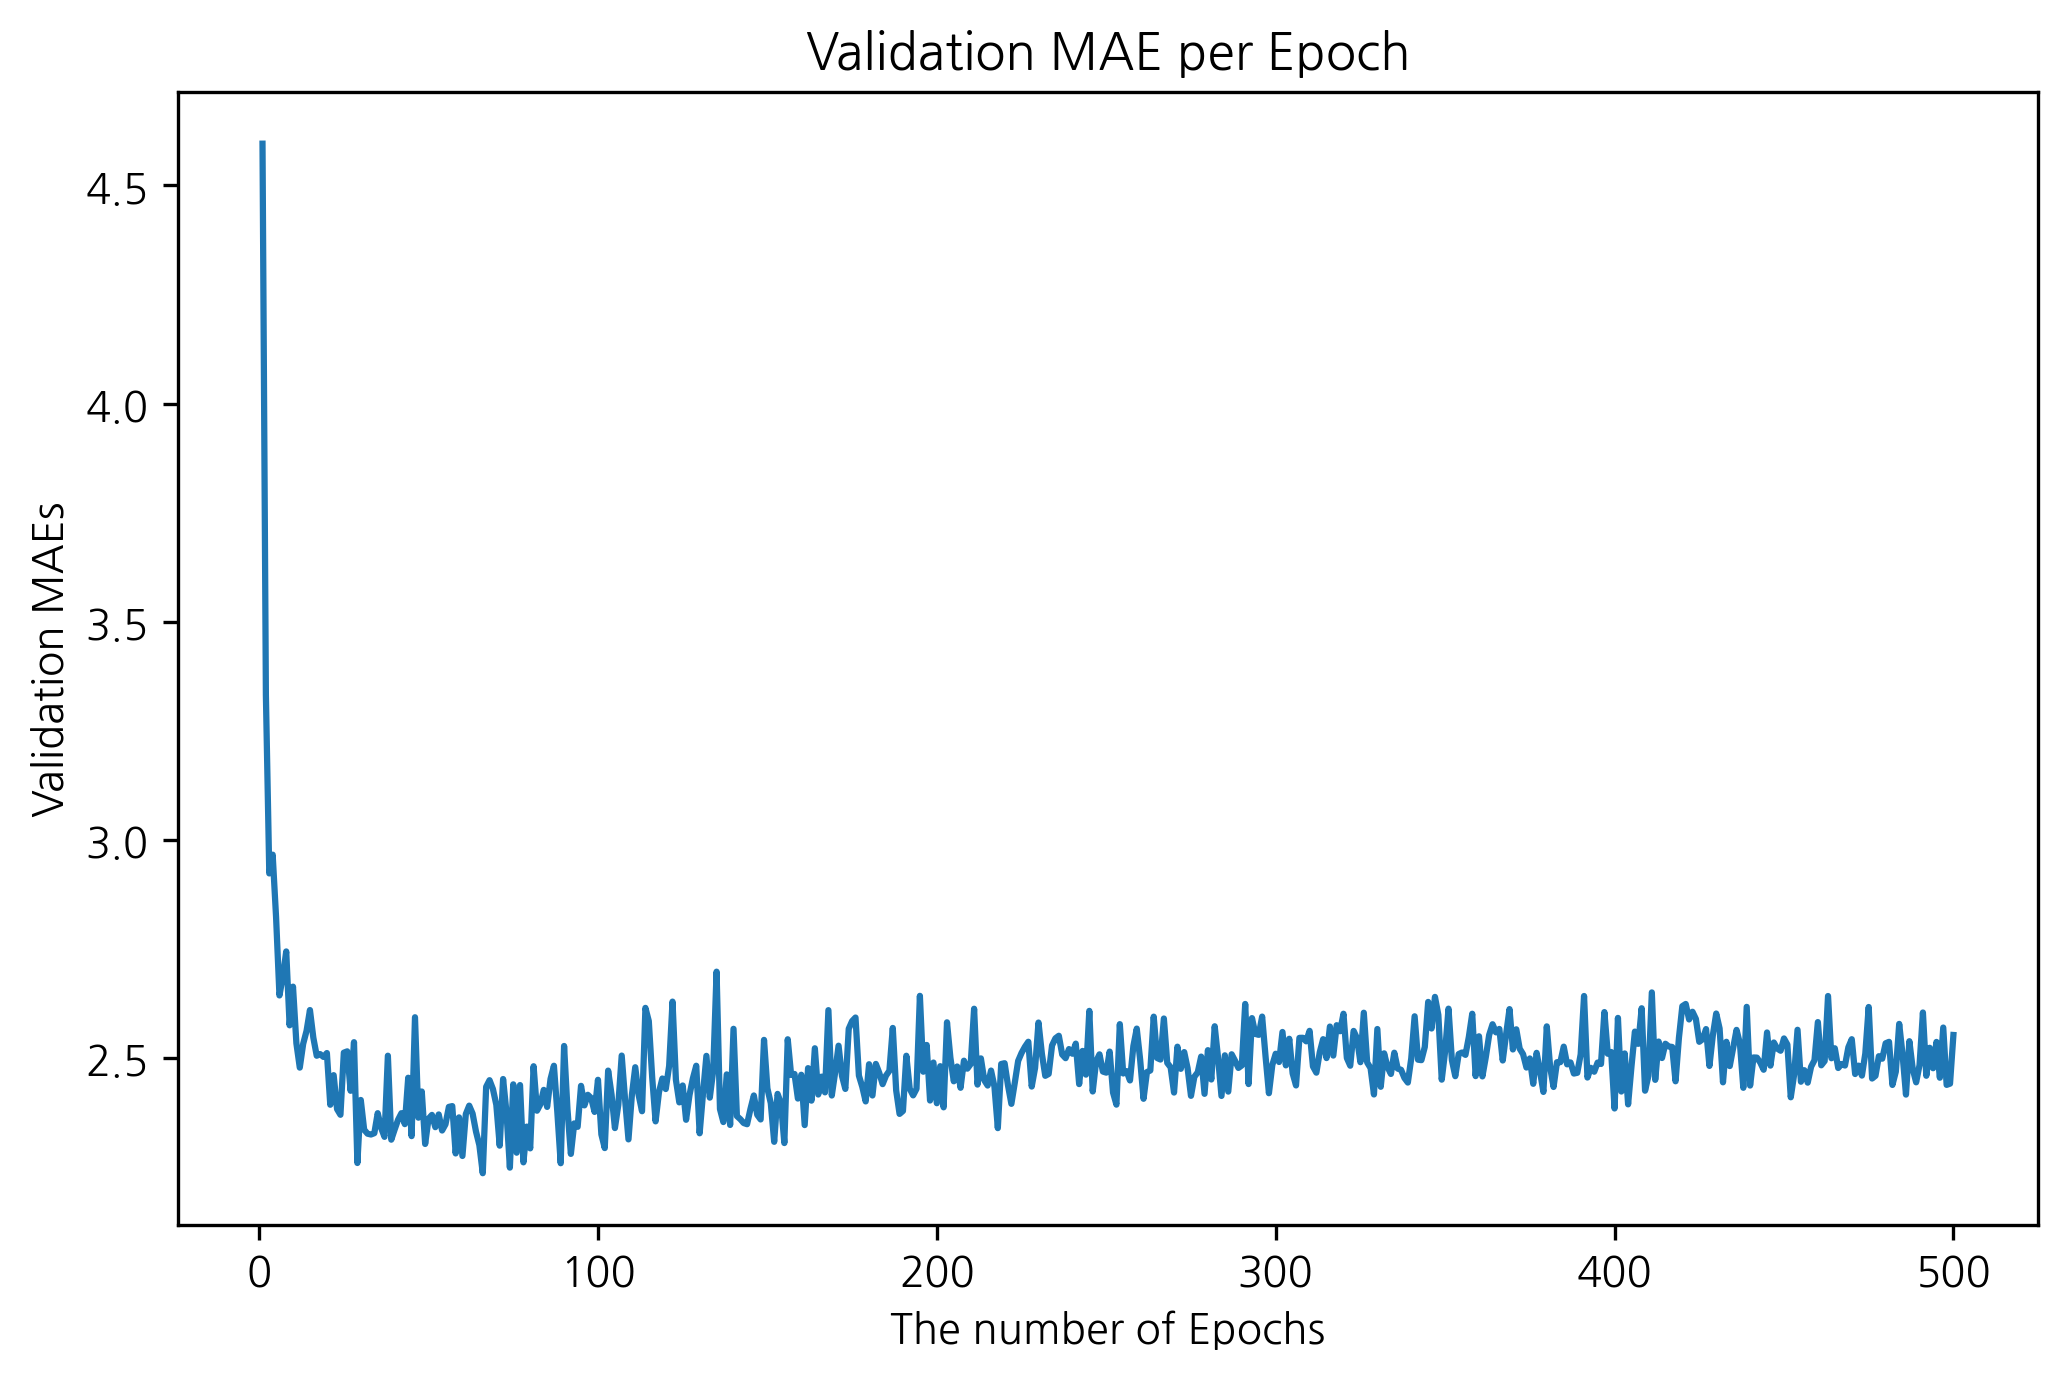

In [306]:
num_epochs = 500 
all_mae_histories = []
num_val_samples = len(train_data) // k

for i in range(k) : 
    print(f'처리 중인 폴드:{i}')
    # 데이터 
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_label = train_targets[i*num_val_samples:(i+1)*num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]
    ], axis=0)
    partial_train_label = np.concatenate([
        train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]
    ], axis=0)
    # 모델
    model = build_model() 
    history = model.fit(partial_train_data, partial_train_label, epochs=num_epochs, batch_size=1, validation_data=(val_data, val_label), verbose='0')
    all_mae_histories.append(history.history['val_mae'])

k_fold_score_per_epoch = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# mae plot
plt.plot(range(1, num_epochs+1), k_fold_score_per_epoch)
plt.xlabel('The number of Epochs')
plt.ylabel('Validation MAEs')
plt.title('Validation MAE per Epoch')
plt.show()

In [305]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [311]:
# mae 값들 지수이동평균으로 크기 변환 
def smooth_curve(points, factor=0.9) : 
    smooth_points = [] 
    for i in points : 
        if smooth_points : 
            previous = smooth_points[-1]
            smooth_points.append(previous*factor + i*(1-factor))
        else : 
            smooth_points.append(i)
    return smooth_points 

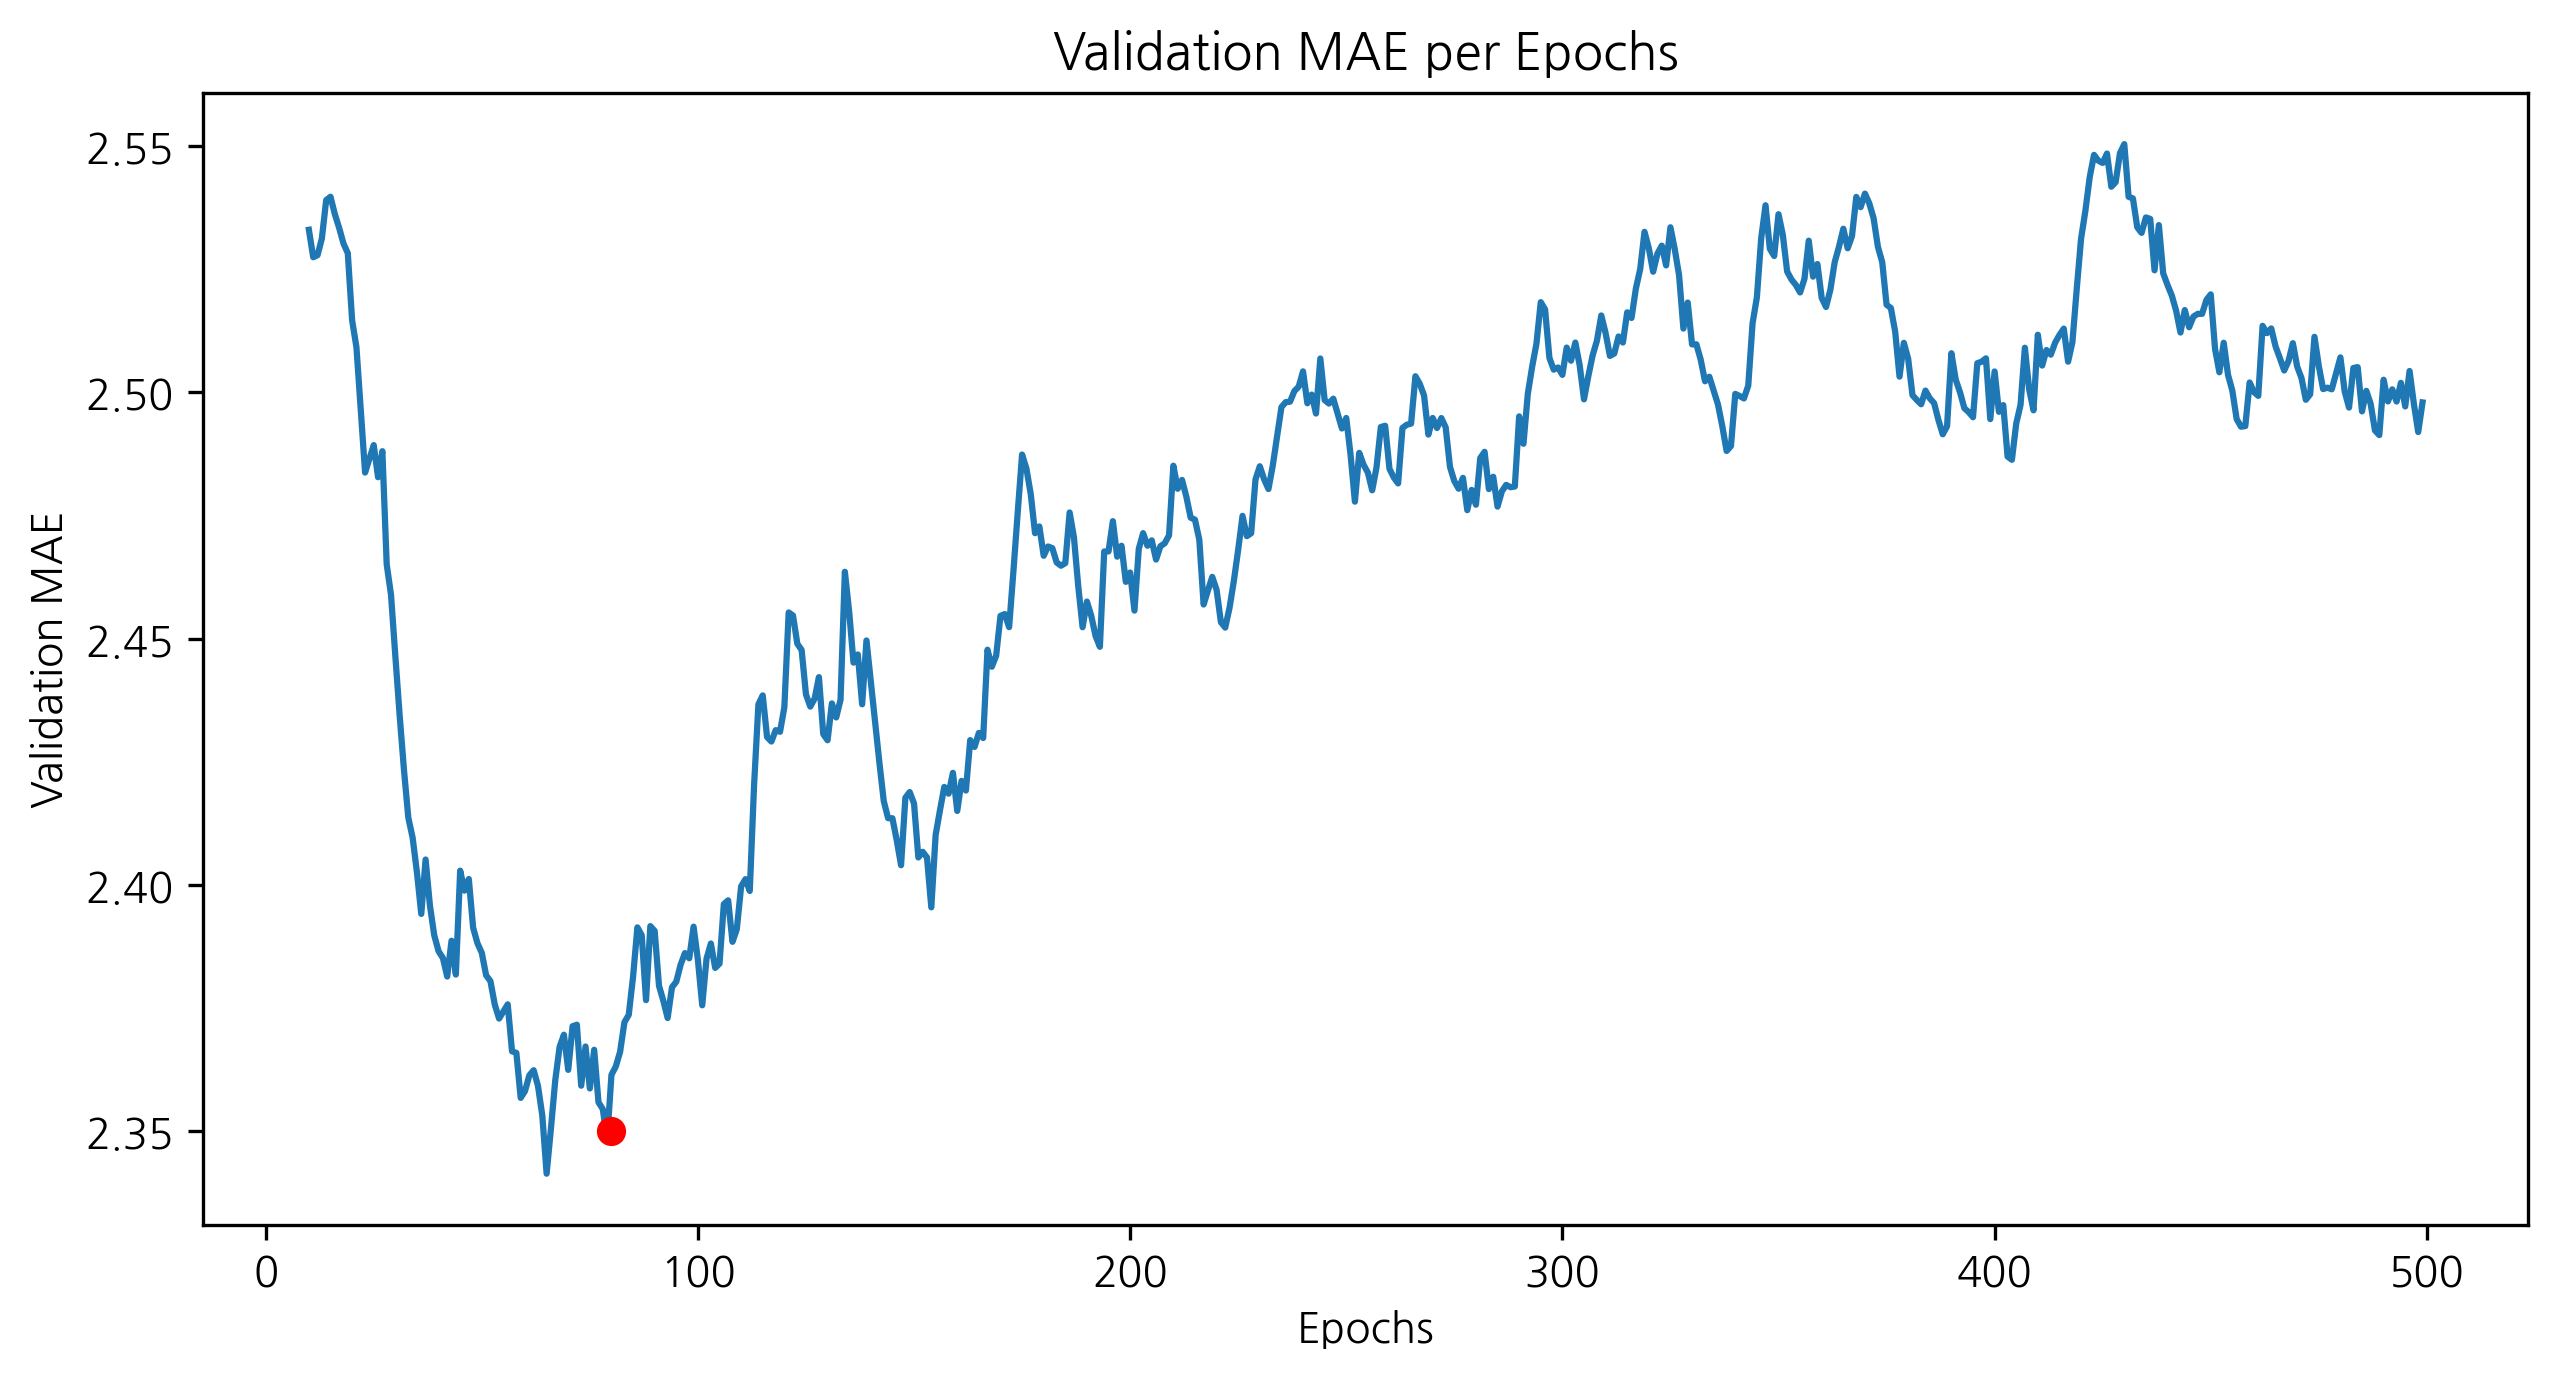

In [333]:
smooth_mae_history = smooth_curve(k_fold_score_per_epoch[10:]) # mae 값 모두 크기 변환

plt.figure(figsize=(10,5))
plt.plot(range(10, num_epochs), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Validation MAE per Epochs')
plt.plot(80, 2.35, 'ro')
plt.show()

## 약 80번째 에포크 이후부터 모델에 과적합이 나타났다. 
### 따라서 에포크 횟수를 80번까지만 반복한다. 

In [335]:
model = build_model() 
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose='0')

Epoch 1/80


2022-01-24 11:42:43.382765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/80
Epoch 3/80
Epoch 4/80
Epoch 5/80
Epoch 6/80
Epoch 7/80
Epoch 8/80
Epoch 9/80
Epoch 10/80
Epoch 11/80
Epoch 12/80
Epoch 13/80
Epoch 14/80
Epoch 15/80
Epoch 16/80
Epoch 17/80
Epoch 18/80
Epoch 19/80
Epoch 20/80
Epoch 21/80
Epoch 22/80
Epoch 23/80
Epoch 24/80
Epoch 25/80
Epoch 26/80
Epoch 27/80
Epoch 28/80
Epoch 29/80
Epoch 30/80
Epoch 31/80
Epoch 32/80
Epoch 33/80
Epoch 34/80
Epoch 35/80
Epoch 36/80
Epoch 37/80
Epoch 38/80
Epoch 39/80
Epoch 40/80
Epoch 41/80
Epoch 42/80
Epoch 43/80
Epoch 44/80
Epoch 45/80
Epoch 46/80
Epoch 47/80
Epoch 48/80
Epoch 49/80
Epoch 50/80
Epoch 51/80
Epoch 52/80
Epoch 53/80
Epoch 54/80
Epoch 55/80
Epoch 56/80
Epoch 57/80
Epoch 58/80
Epoch 59/80
Epoch 60/80
Epoch 61/80
Epoch 62/80
Epoch 63/80
Epoch 64/80
Epoch 65/80
Epoch 66/80
Epoch 67/80
Epoch 68/80
Epoch 69/80
Epoch 70/80
Epoch 71/80
Epoch 72/80
Epoch 73/80
Epoch 74/80
Epoch 75/80
Epoch 76/80
Epoch 77/80
Epoch 78/80
Epoch 79/80
Epoch 80/80


In [336]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

1/4 [======>.......................] - ETA: 0s - loss: 7.0893 - mae: 2.1405

2022-01-24 11:44:32.098598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 36ms/step - loss: 16.5897 - mae: 2.5504


In [337]:
test_mae_score # MAE 약 2.55 기록했다. 

2.550393581390381